# Data Collection & Pre-processing

## Objectives of Notebook

This notebook aims to:

* Perform data collection.
* Perform exploratory data analysis (EDA).
* Perform data preprocessing.

## Dataset Description

There are 13 datasets used in this notebook:

* Six electronic transactions data (Debit, Credit, UE Bank, UE Non-bank, QRIS, Digital Banking).
* One household consumption data.
* One google trends data.
* Five electronic transactions breakdown data (Debit, Credit, UE Bank, UE Non-bank, Digital Banking).

## Import Libraries

In [3]:
%autosave 60
%load_ext autoreload
%autoreload 2

Autosaving every 60 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Import Libraries
import pandas as pd
import warnings

# Libraries Settings
warnings.filterwarnings('ignore')

## Import Customised Functions from Source Code

In [5]:
# Import Functions for Data Preprocessing
from src.preprocess import dataset_info, skewness_checking, outlier_handling, interpolate_quart_to_month, pearson_corr_features_name

# Import Functions for Plotting
from src.plot import plot_missing_values, plot_distribution

# Import Functions for Utilities
from src.utils import pearson_corr_test

## Import Dataset

After the libraries have been successfully imported, next we will import all the datasets to the notebook.

### Electronic Transactions Data

In [6]:
# Define data source folder path
folder_path = r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\CSV Source\Electronic Transaction"

# Define data source file names
debit_filename = r"\debit.csv"
credit_filename = r"\credit.csv"
ue_bank_filename = r"\ueBank.csv"
ue_nonbank_filename = r"\ueNonBank.csv"
qris_filename = r"\qris.csv"
digital_banking_filename = r"\digitalBanking.csv"

In [7]:
# Import 'debit' transaction data
debit = pd.read_csv(folder_path + debit_filename)

# Import 'credit' transaction data
credit = pd.read_csv(folder_path + credit_filename)

# Import 'ue_bank' transaction data
ue_bank = pd.read_csv(folder_path + ue_bank_filename)

# Import 'ue_nonbank' transaction data
ue_nonbank = pd.read_csv(folder_path + ue_nonbank_filename)

# Import 'QRIS' transaction data
qris = pd.read_csv(folder_path + qris_filename)

# Import 'digital_banking' transaction data
digital_banking = pd.read_csv(folder_path + digital_banking_filename)

In [8]:
# Print 'debit' dataset info
dataset_info(debit)

.: Dataset Info :.
********************
Total Rows: 57
Total Columns: 4
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 57 non-null     object 
 1   type                 57 non-null     object 
 2   transaction_volume   57 non-null     float64
 3   transaction_nominal  57 non-null     float64
dtypes: float64(2), object(2)

In [9]:
# Print 'credit' dataset info
dataset_info(credit)

.: Dataset Info :.
********************
Total Rows: 57
Total Columns: 4
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 57 non-null     object 
 1   type                 57 non-null     object 
 2   transaction_volume   57 non-null     int64  
 3   transaction_nominal  57 non-null     float64
dtypes: float64(1), int64(1), object(2)

In [10]:
# Print 'ue_bank' dataset info
dataset_info(ue_bank)

.: Dataset Info :.
********************
Total Rows: 57
Total Columns: 4
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 57 non-null     object 
 1   type                 57 non-null     object 
 2   transaction_volume   57 non-null     float64
 3   transaction_nominal  57 non-null     float64
dtypes: float64(2), object(2)

In [11]:
# Print 'ue_nonbank' dataset info
dataset_info(ue_nonbank)

.: Dataset Info :.
********************
Total Rows: 57
Total Columns: 4
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 57 non-null     object 
 1   type                 57 non-null     object 
 2   transaction_volume   57 non-null     float64
 3   transaction_nominal  57 non-null     float64
dtypes: float64(2), object(2)

### Household Consumption Data

In [12]:
# Define data source folder path
folder_path = r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\CSV Source\Household Consumption"

# Define data source file names
household_consumption_filename = r"\household_consumption.csv"

In [13]:
# Import household consumption data
household_consumption = pd.read_csv(folder_path+household_consumption_filename)

In [14]:
# Print household consumption data info
dataset_info(household_consumption)

.: Dataset Info :.
********************
Total Rows: 18
Total Columns: 2
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   18 non-null     object 
 1   household_consumption  18 non-null     float64
dtypes: float64(1), object(1)

### Google Trends Data

In [15]:
# Define data source folder path
folder_path = r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\CSV Source\Google Trends"

# Define data source file names
google_trends_filename = r"\google_trend.csv"

In [16]:
# Import google trend data
google_trends = pd.read_csv(folder_path+google_trends_filename)

In [17]:
# Print google trend data info
dataset_info(google_trends)

.: Dataset Info :.
********************
Total Rows: 57
Total Columns: 51
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   date                                      57 non-null     object
 1   motorcycle                                57 non-null     int64 
 2   auto insurance                            57 non-null     int64 
 3   vehicle wheels & tires                    57 non-null     int64 
 4   vehicle maintanance                       57 non-null     int64 
 5   microcars & city cars                     57 non-null     int64 
 6   motor vehicle & parts                     57 non-null     int64 
 7   home insurance                            57 non-null     int64 
 8   home furnishing                           57 non-nu

### Electronic Transaction Breakdown Data

In [18]:
# Define data source folder path
folder_path = r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\CSV Source\Electronic Transaction Breakdown"

# Define data source file names
debit_breakdown_filename = r"\debit_breakdown.csv"
credit_breakdown_filename = r"\credit_breakdown.csv"
ue_bank_breakdown_filename = r"\ueBank_breakdown.csv"
ue_nonbank_breakdown_filename = r"\ueNonBank_breakdown.csv"
digital_banking_breakdown_filename = r"\digitalBanking_breakdown.csv"

In [19]:
# Import debit_breakdown data
debit_breakdown = pd.read_csv(folder_path+debit_breakdown_filename)

# Import credit_breakdown data
credit_breakdown = pd.read_csv(folder_path+credit_breakdown_filename)

# Import ue_bank_breakdown data
ue_bank_breakdown = pd.read_csv(folder_path+ue_bank_breakdown_filename)

# Import ue_nonbank_breakdown data
ue_nonbank_breakdown = pd.read_csv(folder_path+ue_nonbank_breakdown_filename)

# Import digital_banking_breakdown data
digital_banking_breakdown = pd.read_csv(folder_path+digital_banking_breakdown_filename)

In [20]:
# Print debit_breakdown data info
dataset_info(debit_breakdown)

.: Dataset Info :.
********************
Total Rows: 501
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 501 non-null    object 
 1   type                 501 non-null    object 
 2   breakdown            501 non-null    object 
 3   transaction_volume   333 non-null    float64
 4   transaction_nominal  333 non-null    float64
dtypes: float64(2), object(3)

In [21]:
# Print credit_breakdown data info
dataset_info(credit_breakdown)

.: Dataset Info :.
********************
Total Rows: 171
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 171 non-null    object 
 1   type                 171 non-null    object 
 2   breakdown            171 non-null    object 
 3   transaction_volume   135 non-null    float64
 4   transaction_nominal  135 non-null    float64
dtypes: float64(2), object(3)

In [22]:
# Print ue_bank_breakdown data info
dataset_info(ue_bank_breakdown)

.: Dataset Info :.
********************
Total Rows: 513
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 513 non-null    object 
 1   type                 513 non-null    object 
 2   breakdown            513 non-null    object 
 3   transaction_volume   396 non-null    float64
 4   transaction_nominal  396 non-null    float64
dtypes: float64(2), object(3)

In [23]:
# Print ue_nonbank_breakdown data info
dataset_info(ue_nonbank_breakdown)

.: Dataset Info :.
********************
Total Rows: 513
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 513 non-null    object 
 1   type                 513 non-null    object 
 2   breakdown            513 non-null    object 
 3   transaction_volume   342 non-null    float64
 4   transaction_nominal  342 non-null    float64
dtypes: float64(2), object(3)

In [24]:
# Print digital_banking_breakdown data info
dataset_info(digital_banking_breakdown)

.: Dataset Info :.
********************
Total Rows: 114
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 114 non-null    object 
 1   type                 114 non-null    object 
 2   breakdown            114 non-null    object 
 3   transaction_volume   114 non-null    int64  
 4   transaction_nominal  114 non-null    float64
dtypes: float64(1), int64(1), object(3)

### Convert 'date' Column as DateTime and Set it as Index

In [25]:
imported_dataset = [debit, credit, ue_bank, ue_nonbank, qris, digital_banking, google_trends, household_consumption,
                    debit_breakdown, credit_breakdown, ue_bank_breakdown, ue_nonbank_breakdown, digital_banking_breakdown]

# convert date column to DateTime and set as Datetimeindex
for df in imported_dataset:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

## Exploratory Data Analysis

* This section will focused on initial data exploration before data will be preprocessed.
* 'plot_distribution' function will iterates through each numerical column in the dataframe and creates two types of plots for each:
    1. A histogram with a Kernel Density Estimate (KDE) to visualize the distribution of the data.
    2. A box plot to visualize the quartiles and outliers of the data.
    These plots provide a comprehensive view of the data distribution, helping in identifying patterns, skewness, and outliers.
    This analysis is crucial in data preprocessing to decide on potential transformations for normalizing data.

    

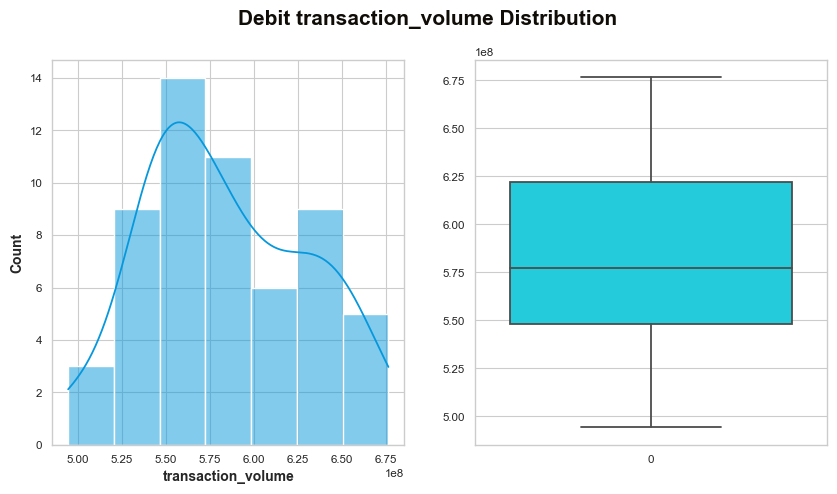

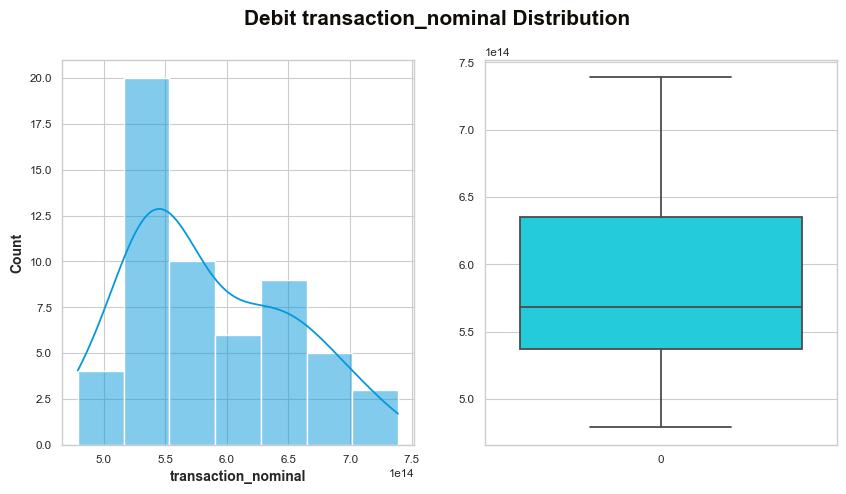

In [26]:
# Check for Debit Transaction Volume & Nominal Distribution
plot_distribution(debit, 'Debit')

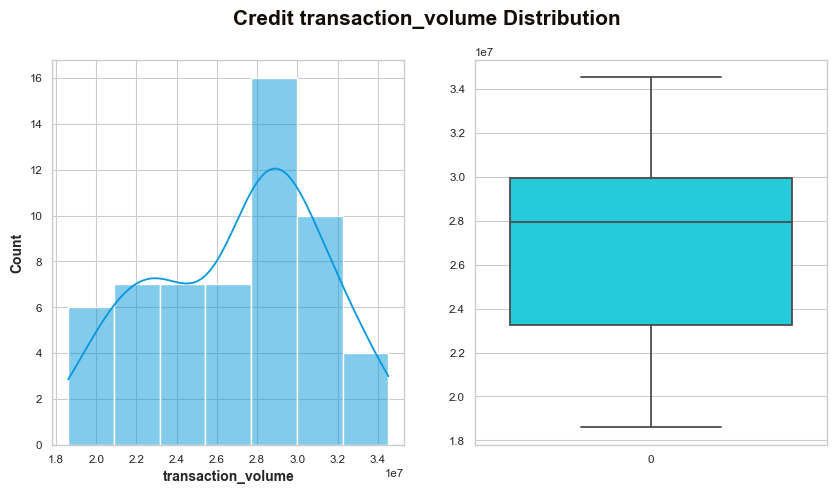

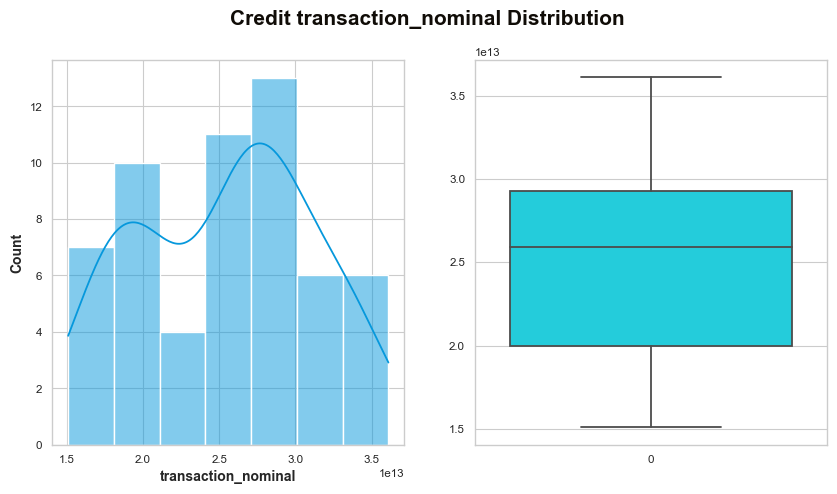

In [27]:
# Check for Credit Transaction Volume & Nominal Distribution
plot_distribution(credit, 'Credit')

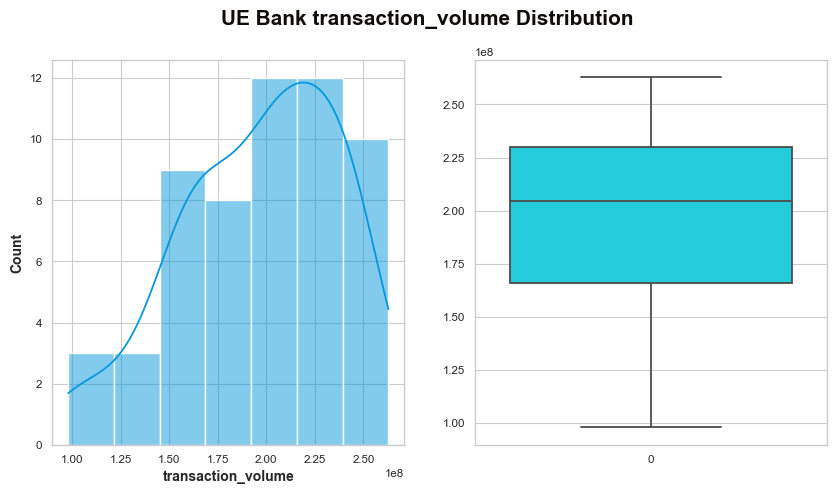

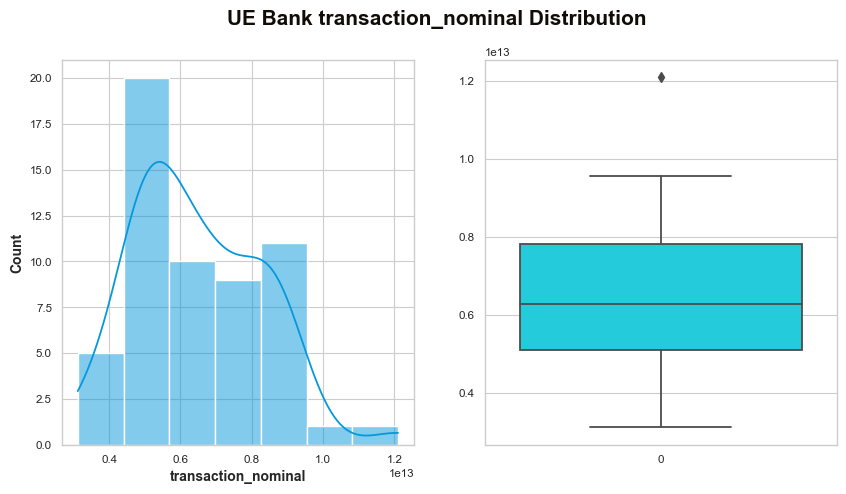

In [28]:
# Check for UE Bank Transaction Volume & Nominal Distribution
plot_distribution(ue_bank, 'UE Bank')

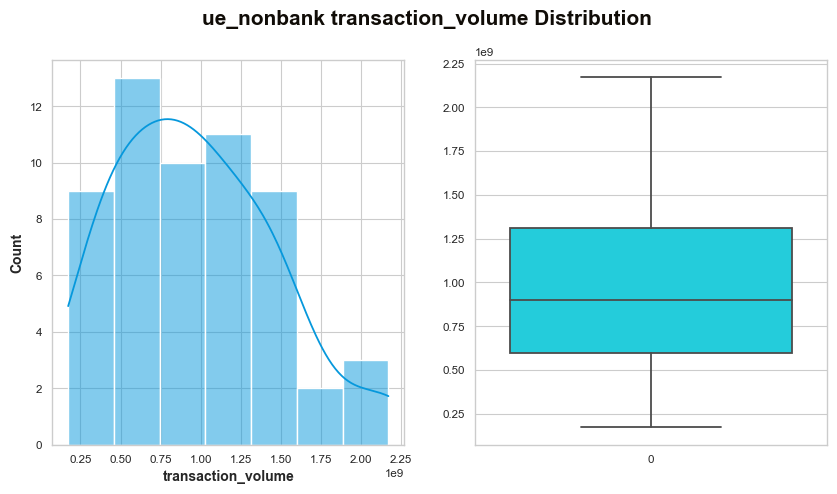

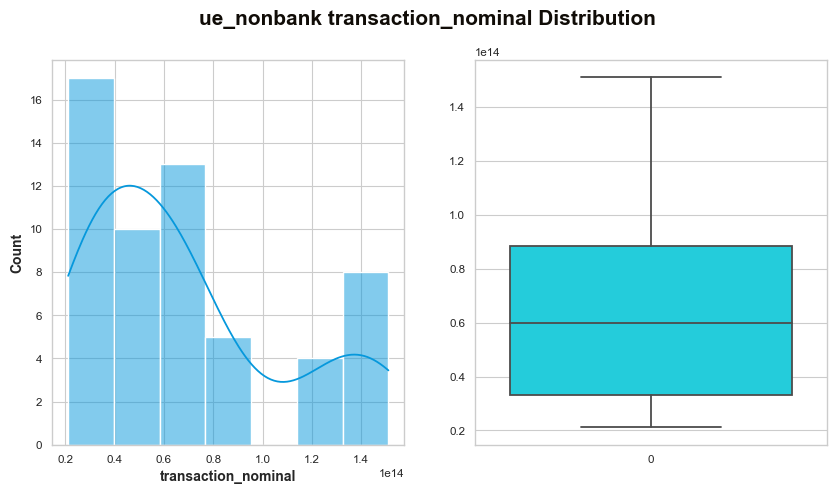

In [29]:
# Check for UE Non-bank Transaction Volume & Nominal Distribution
plot_distribution(ue_nonbank, 'ue_nonbank')

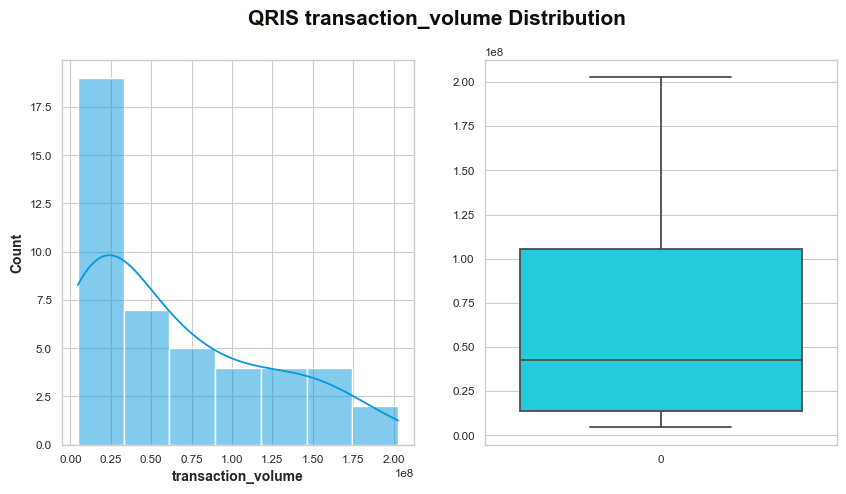

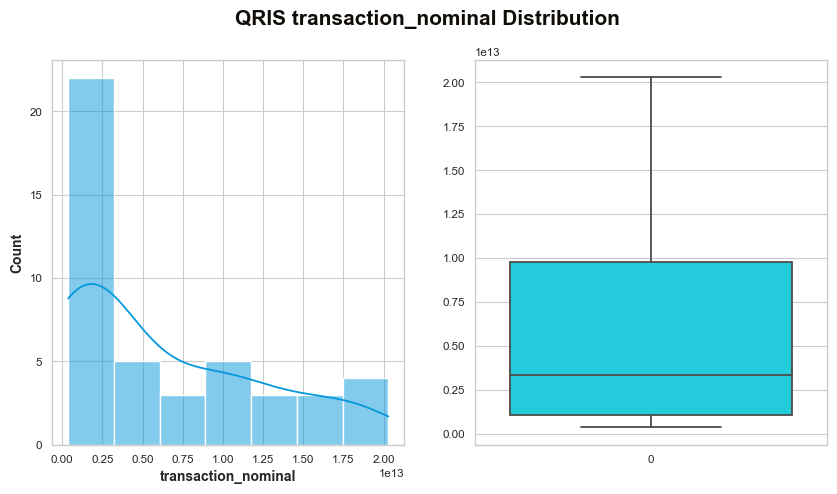

In [30]:
# Check for qris Transaction Volume & Nominal Distribution
plot_distribution(qris, 'QRIS')

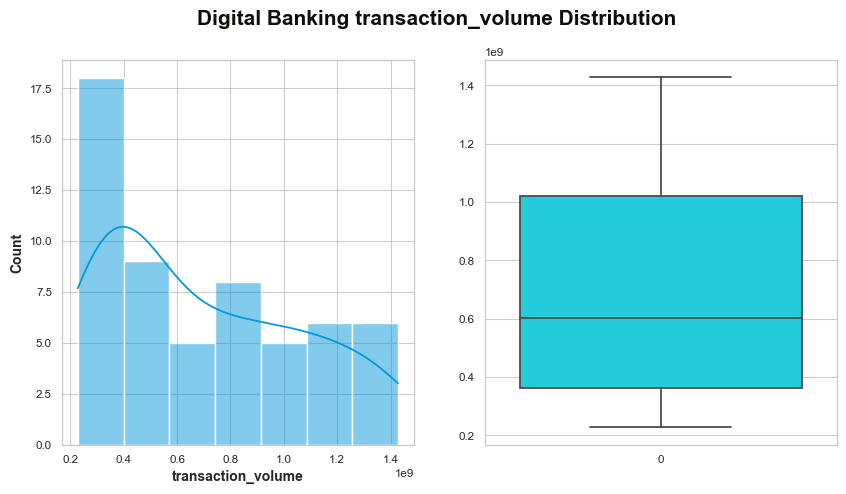

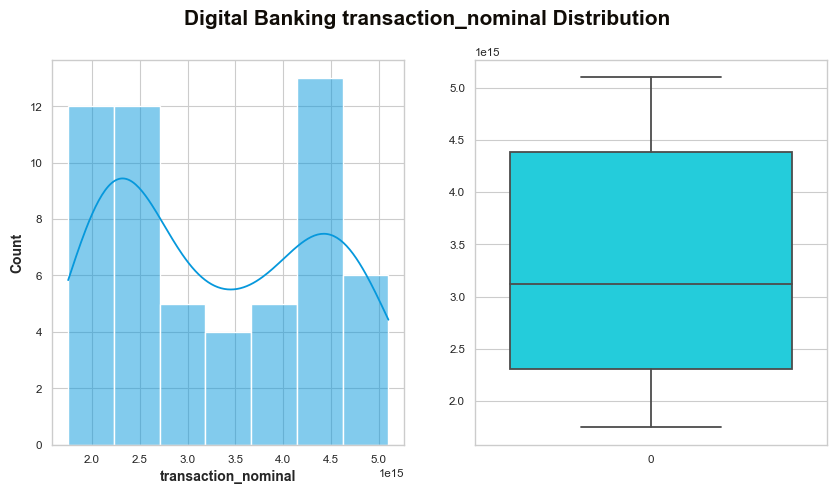

In [31]:
# Check for Digital Banking Transaction Volume & Nominal Distribution
plot_distribution(digital_banking, 'Digital Banking')

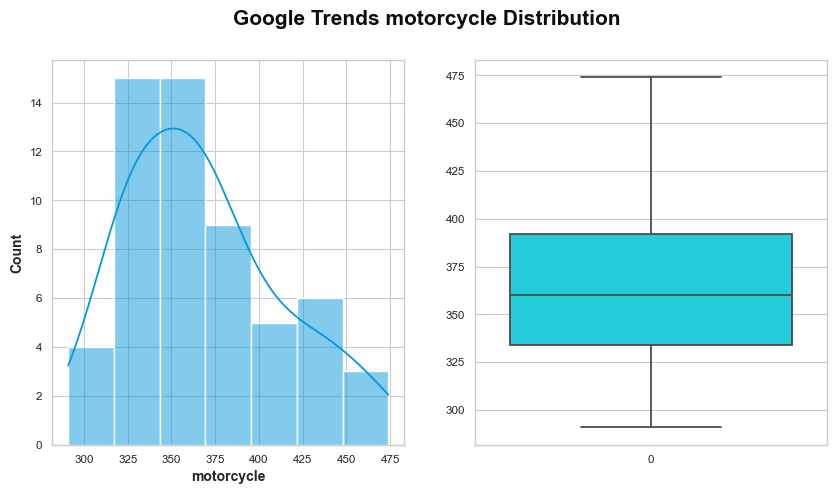

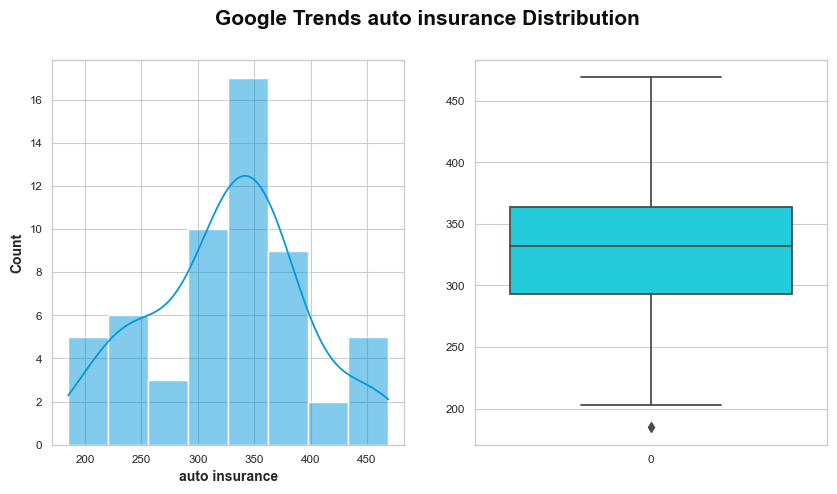

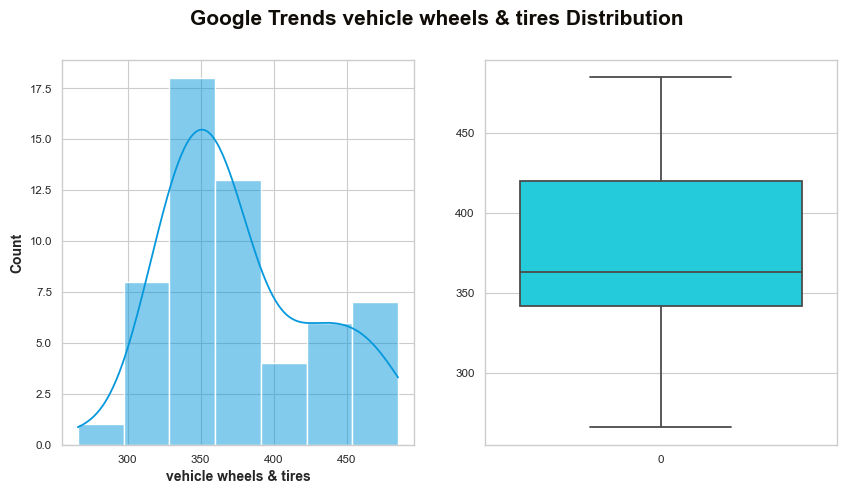

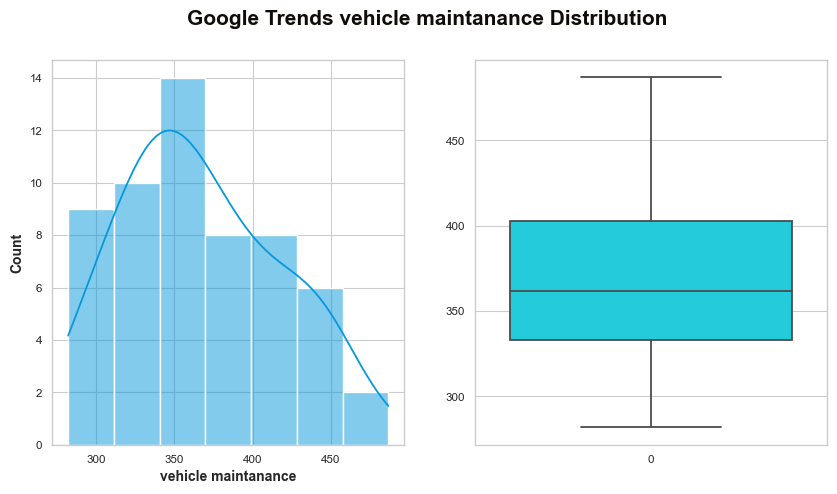

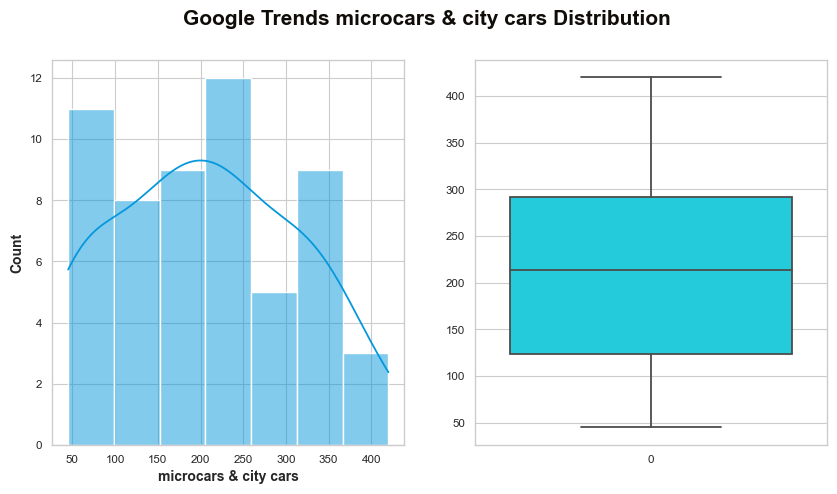

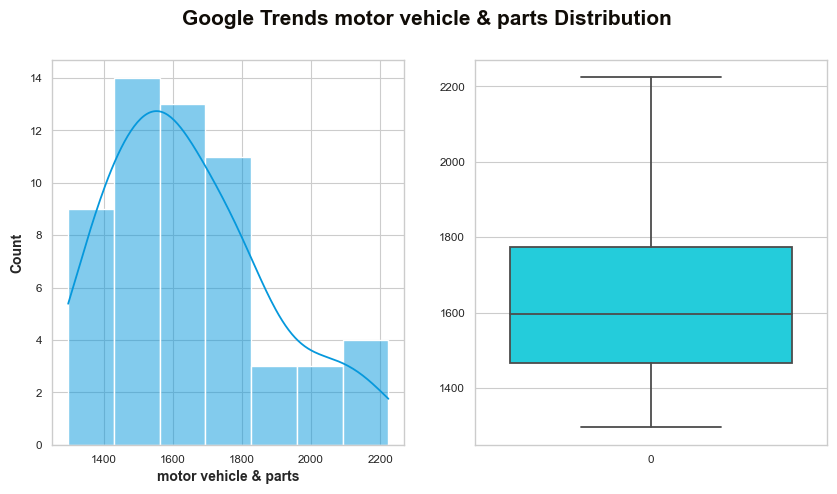

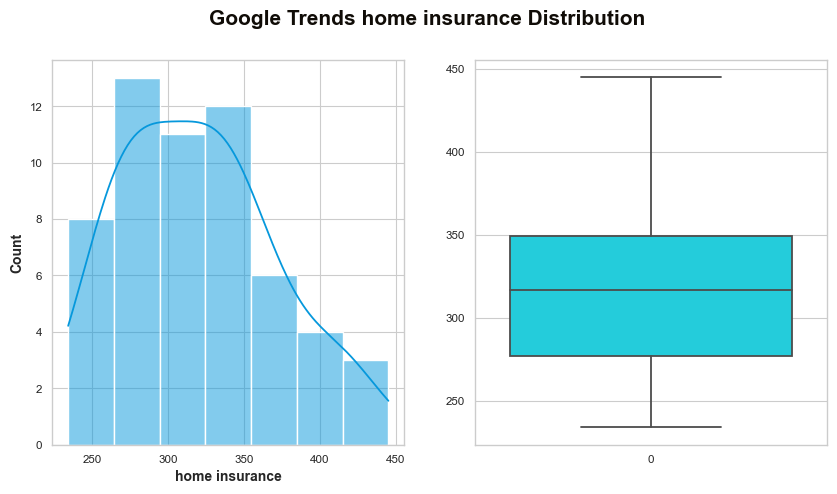

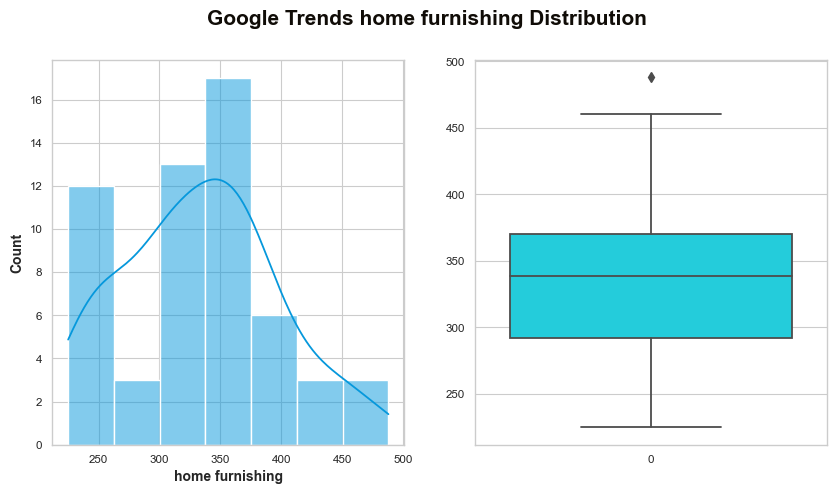

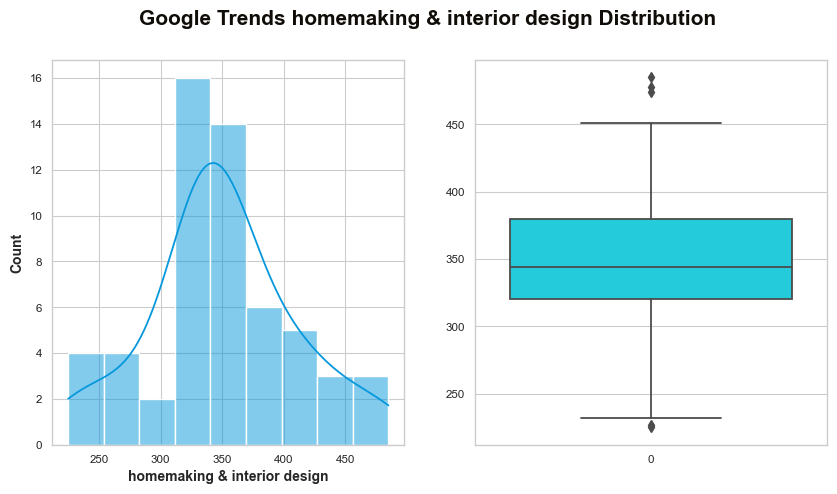

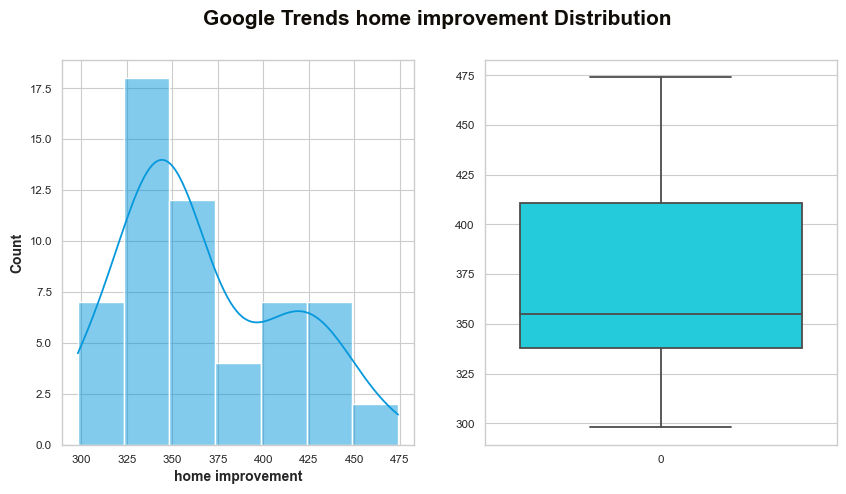

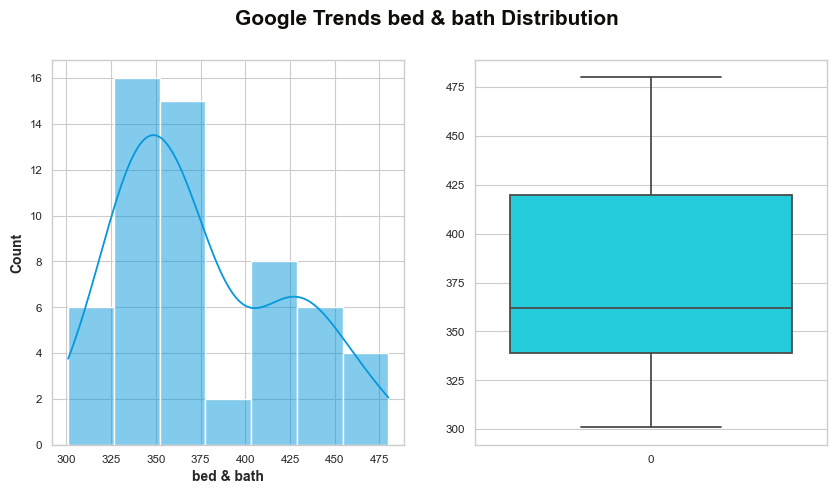

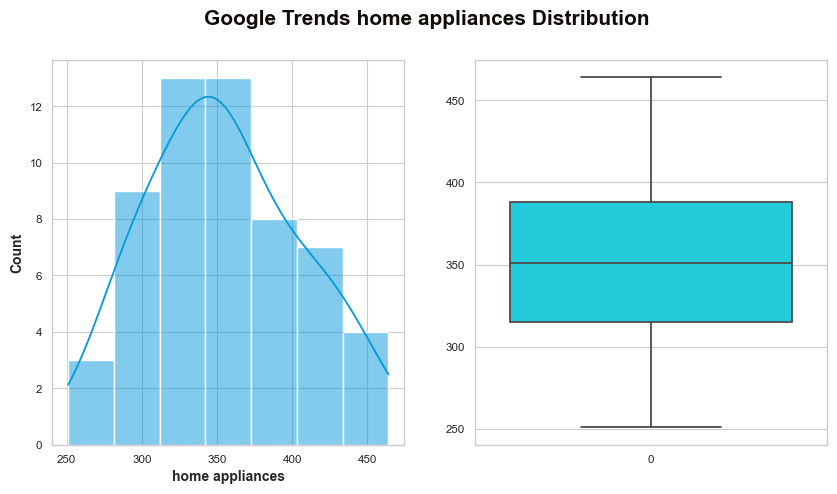

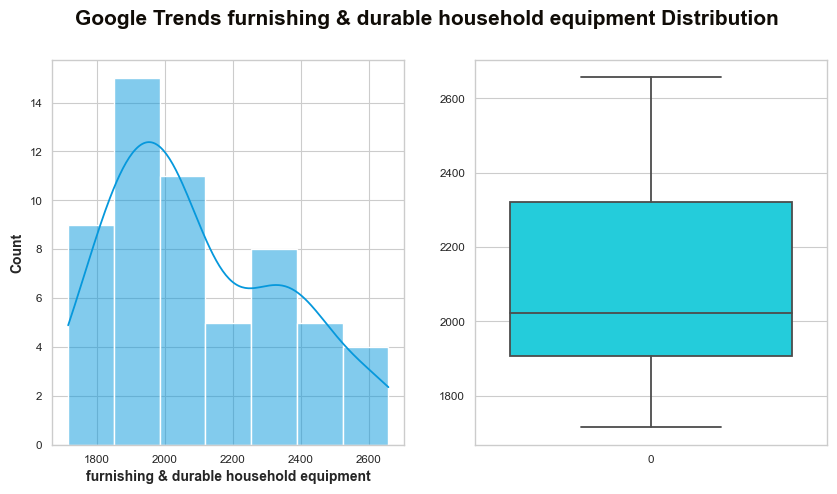

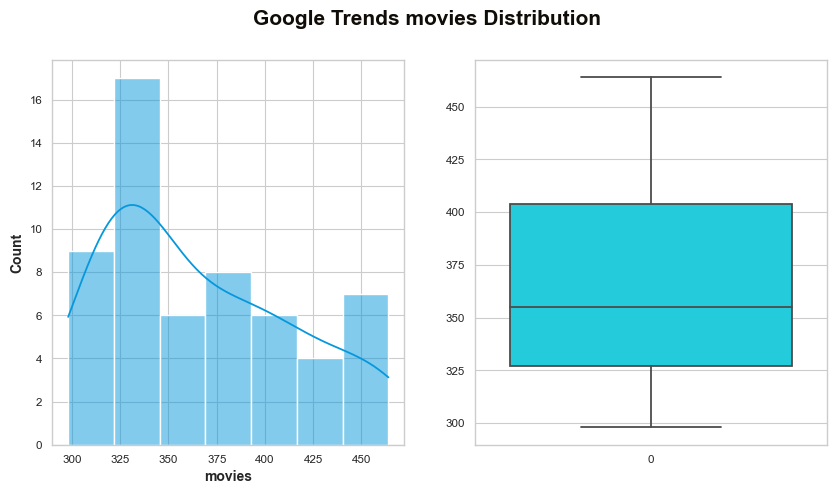

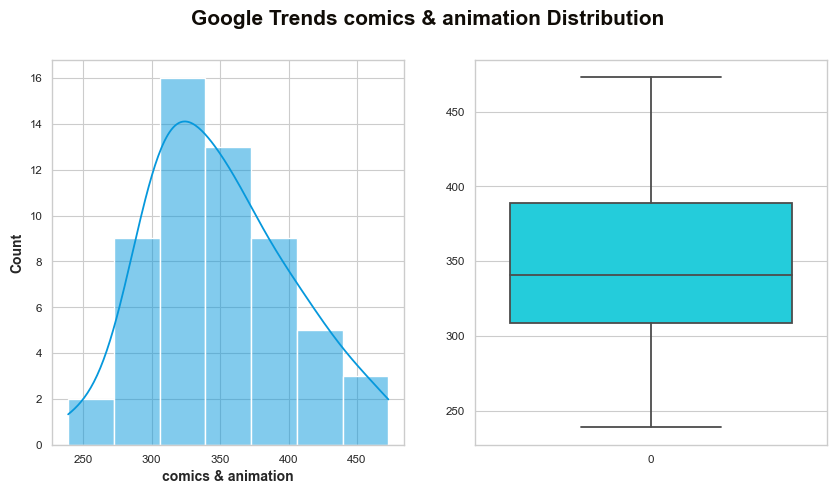

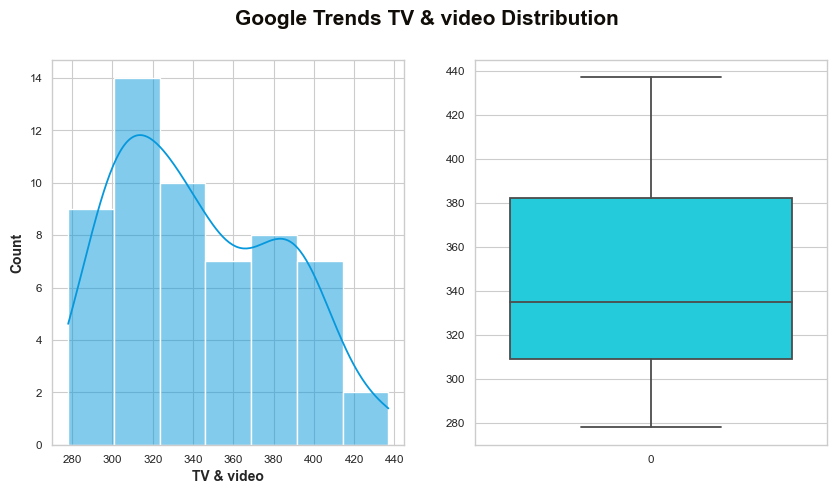

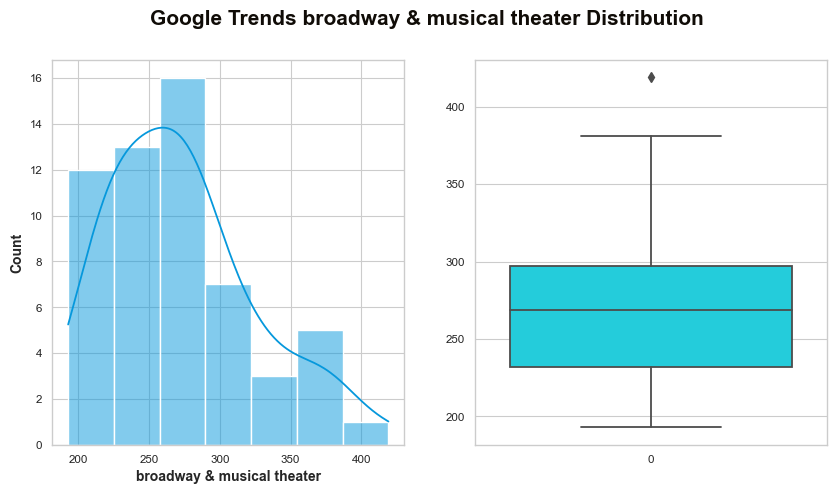

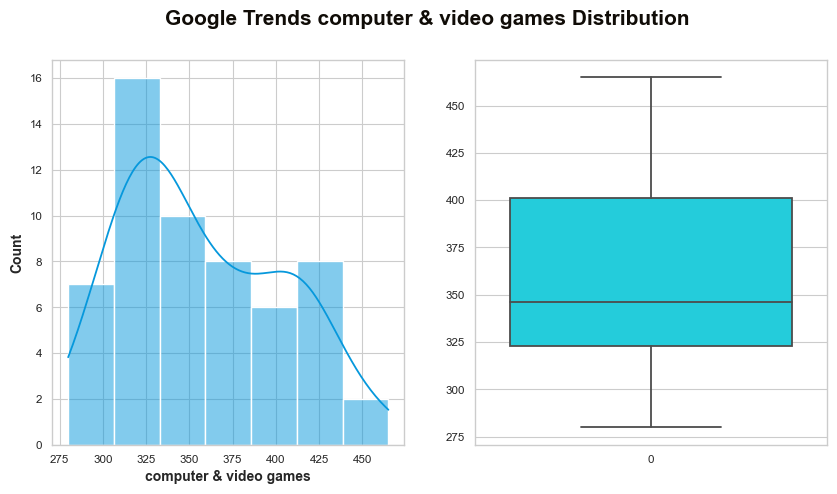

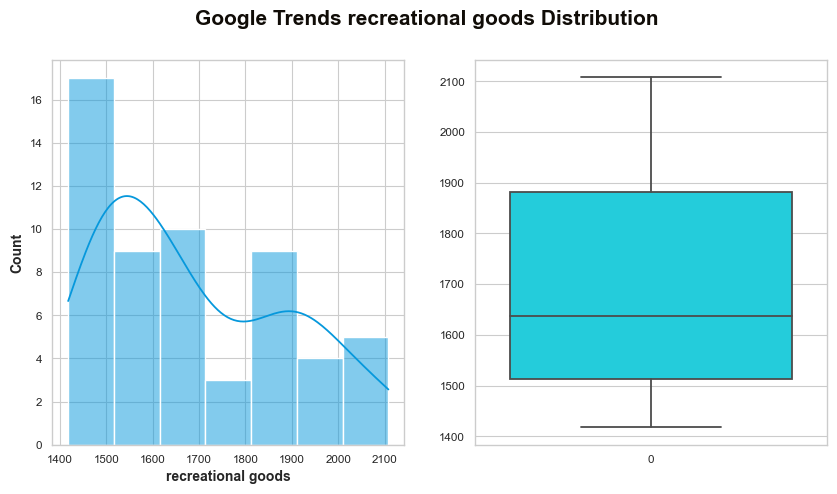

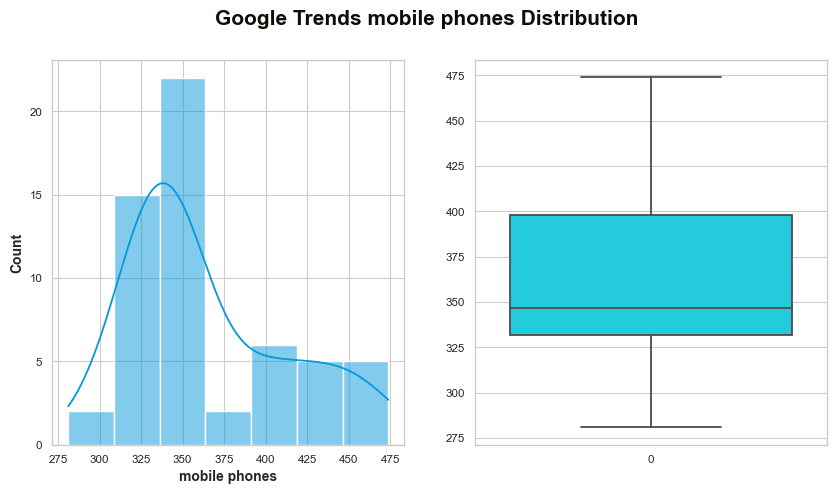

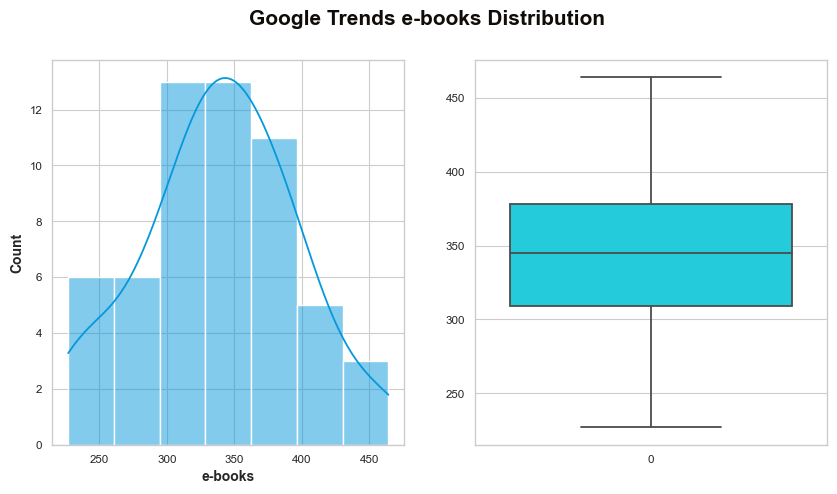

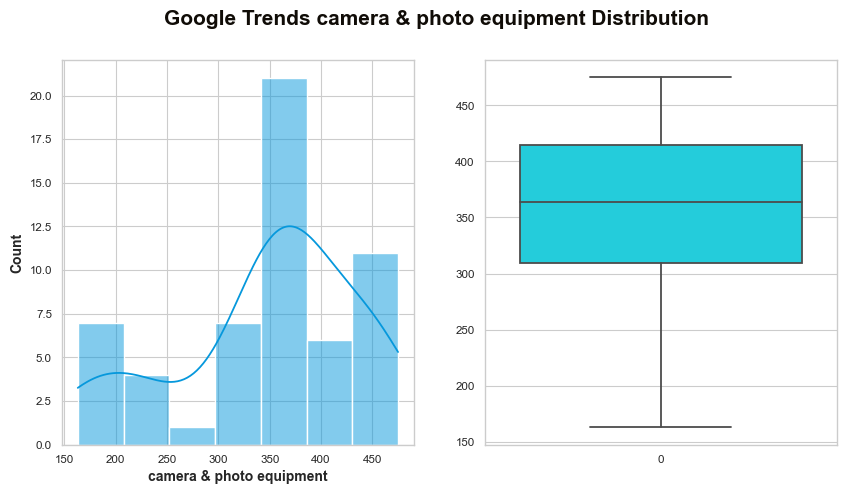

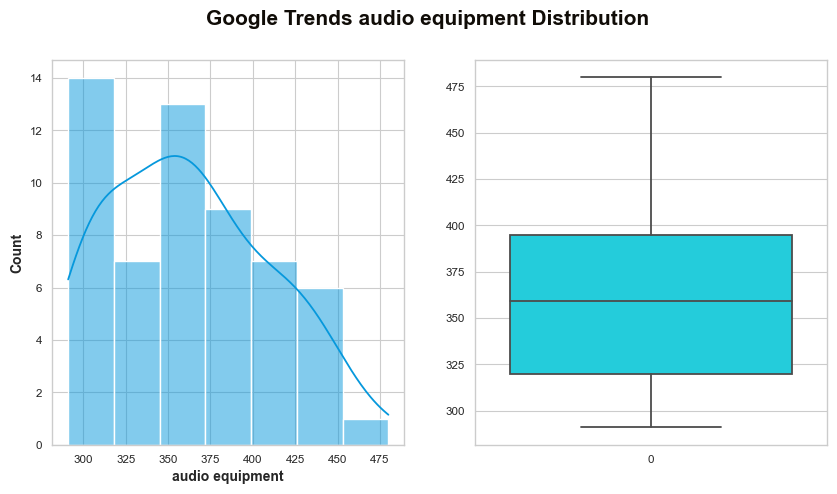

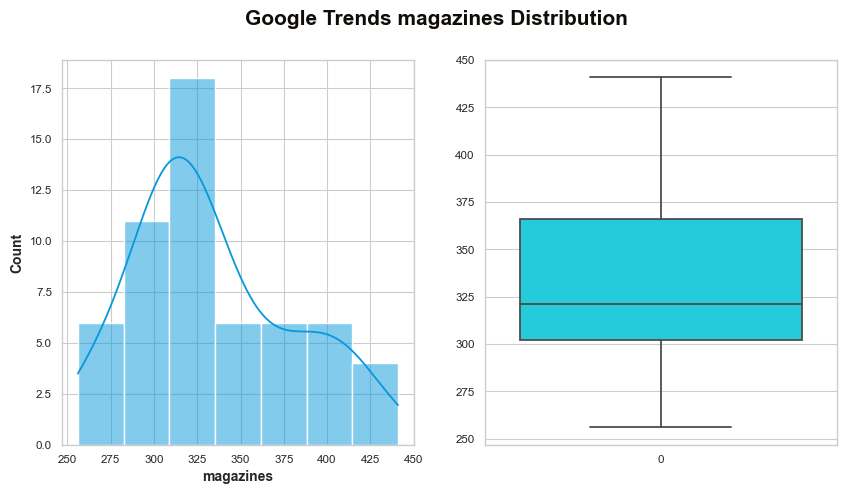

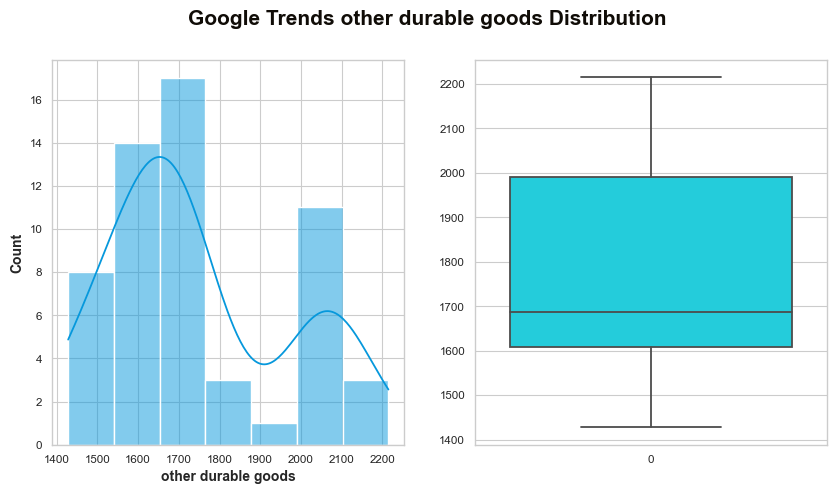

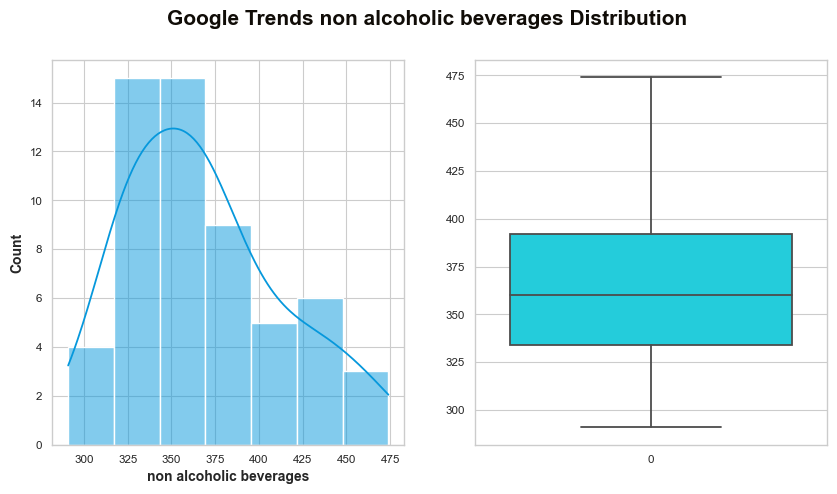

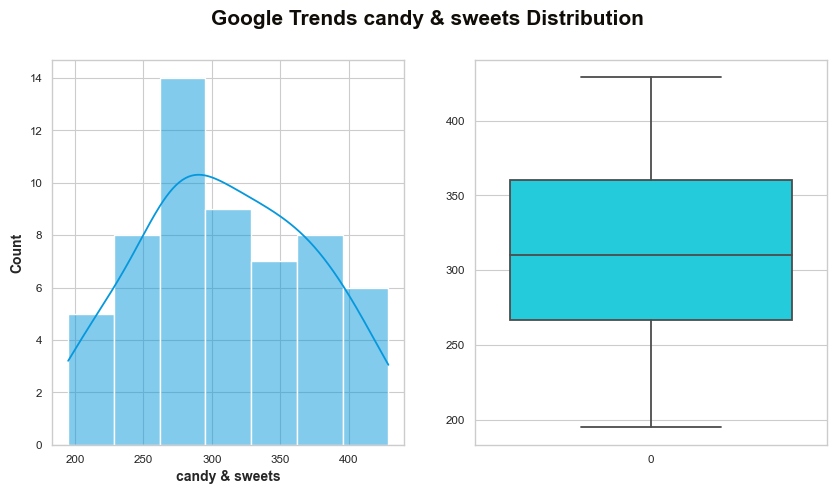

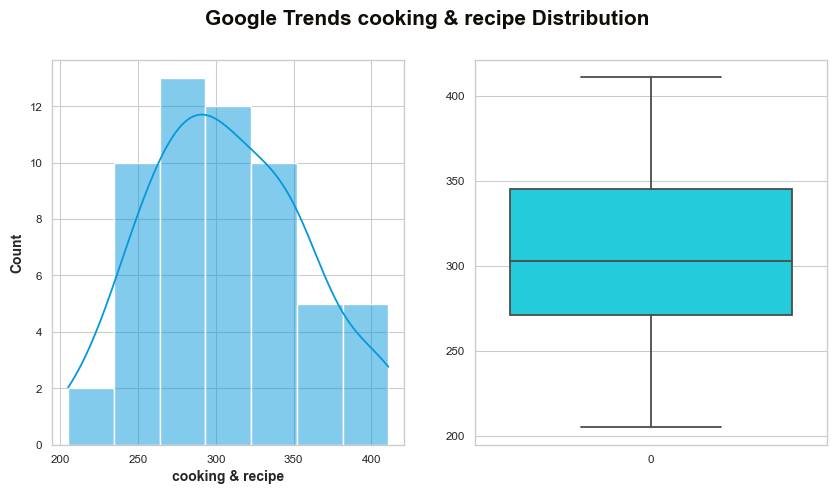

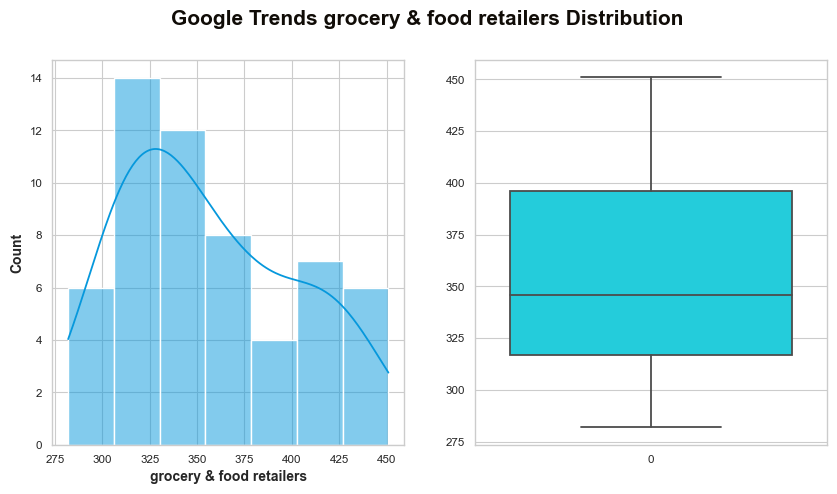

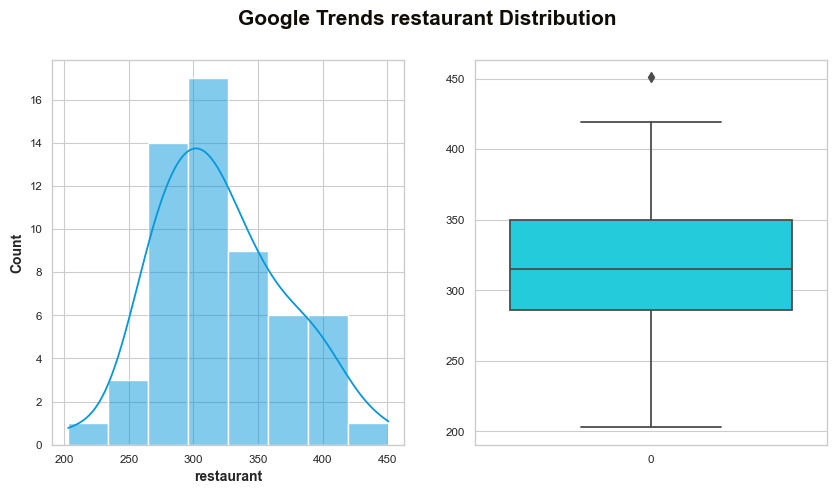

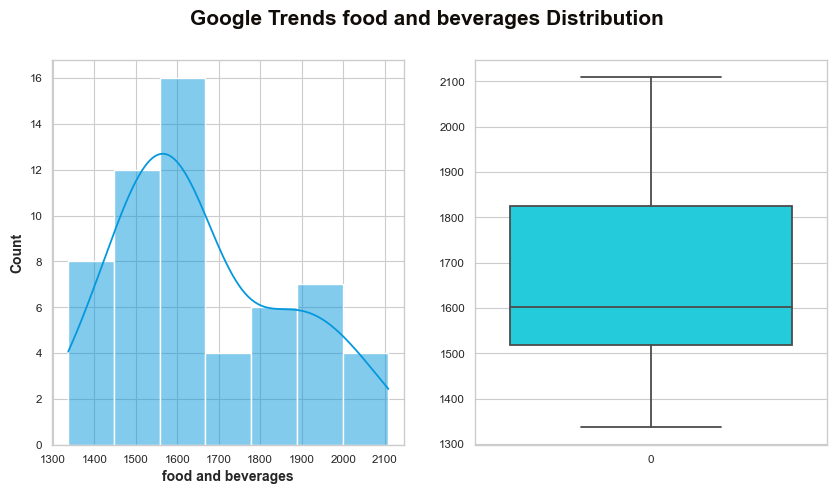

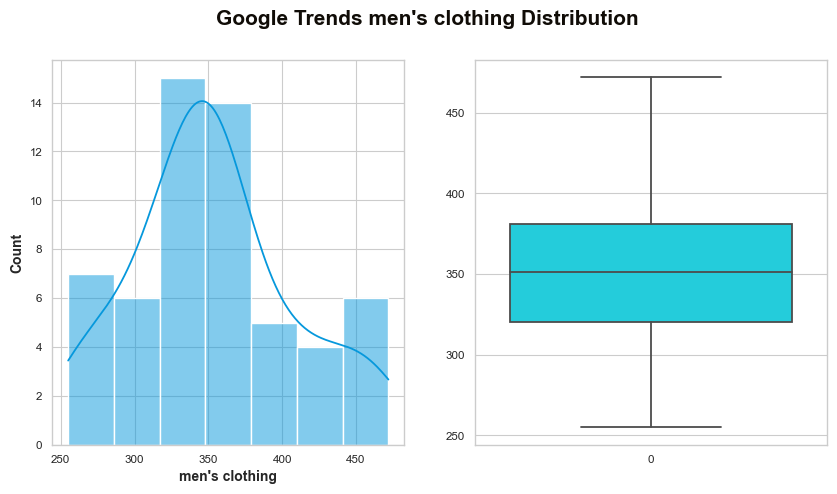

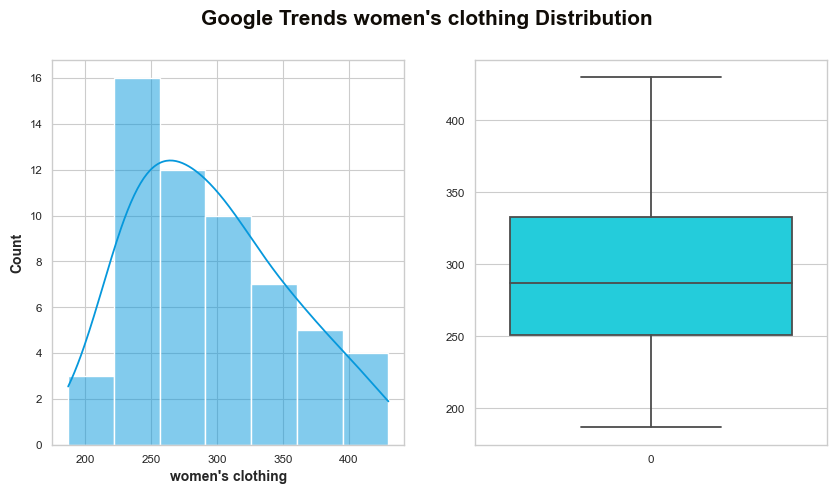

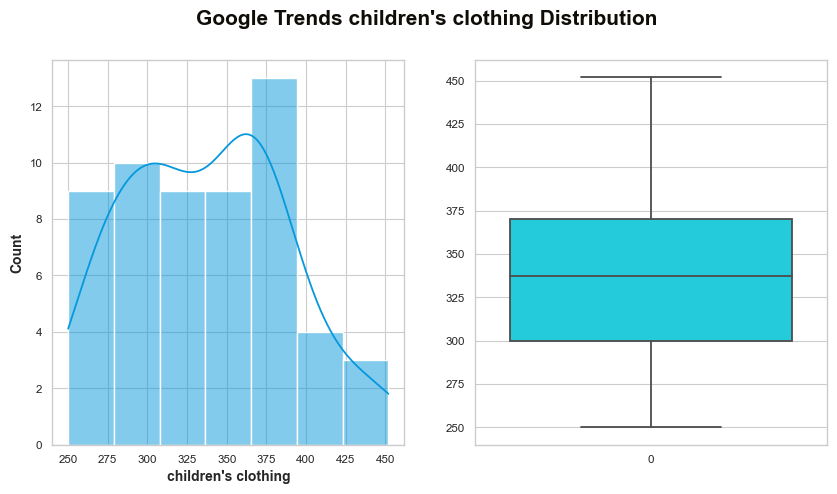

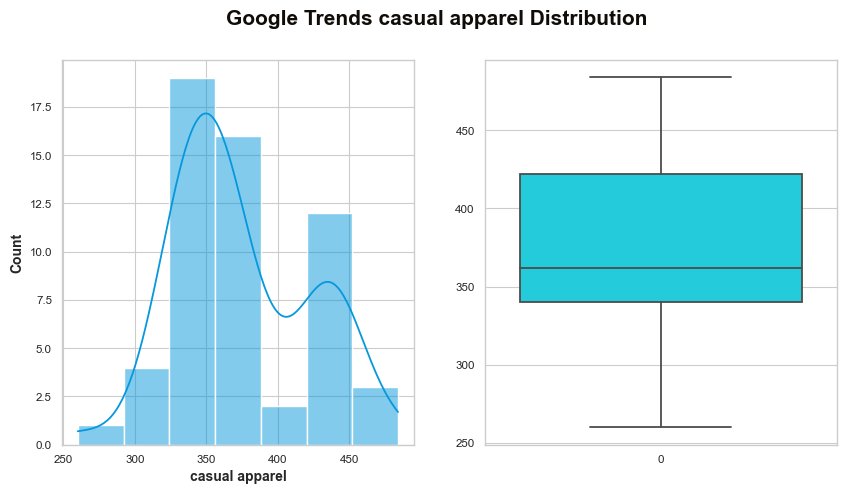

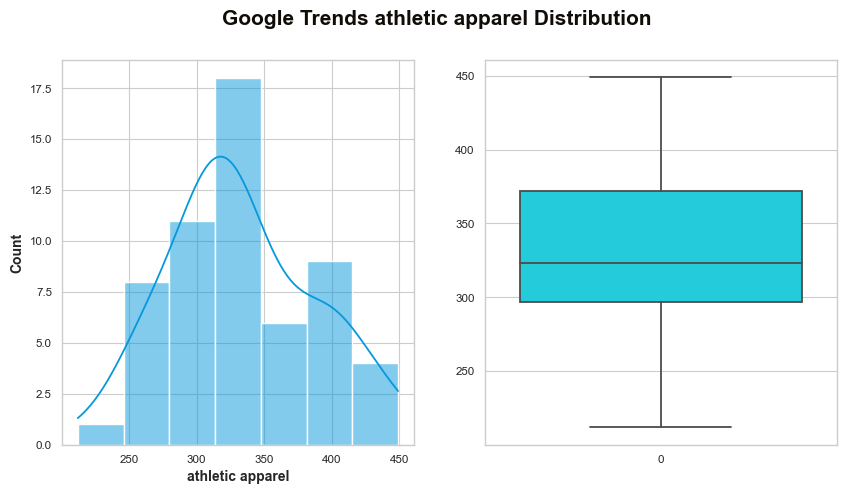

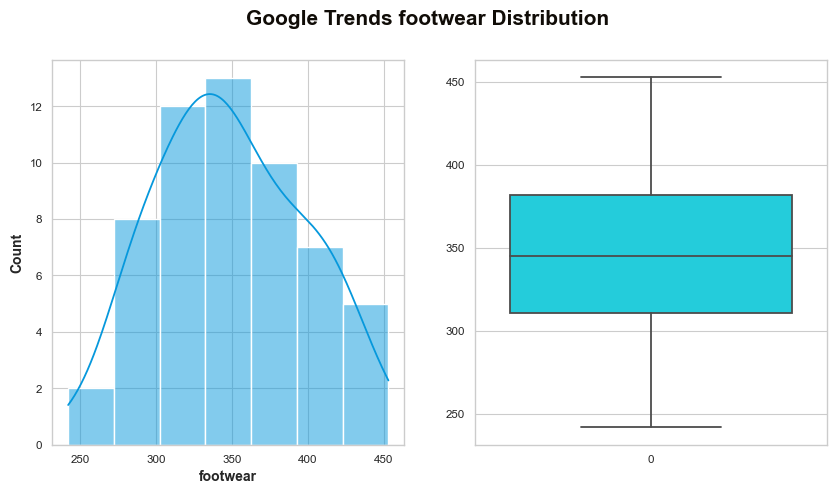

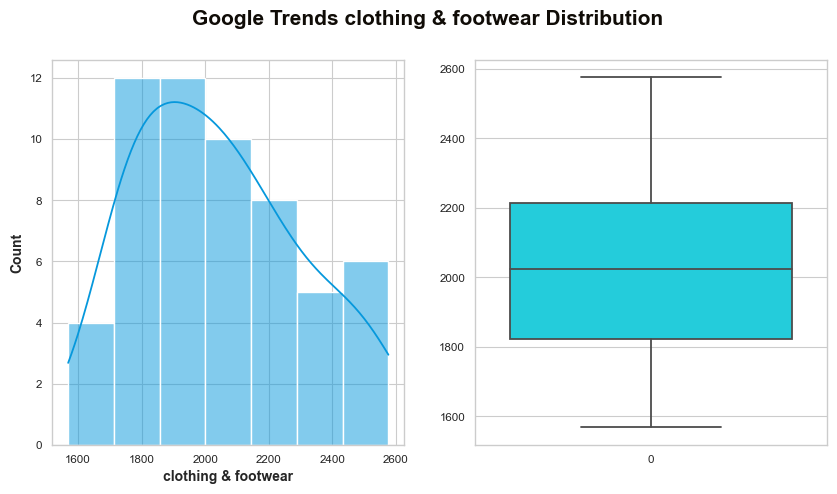

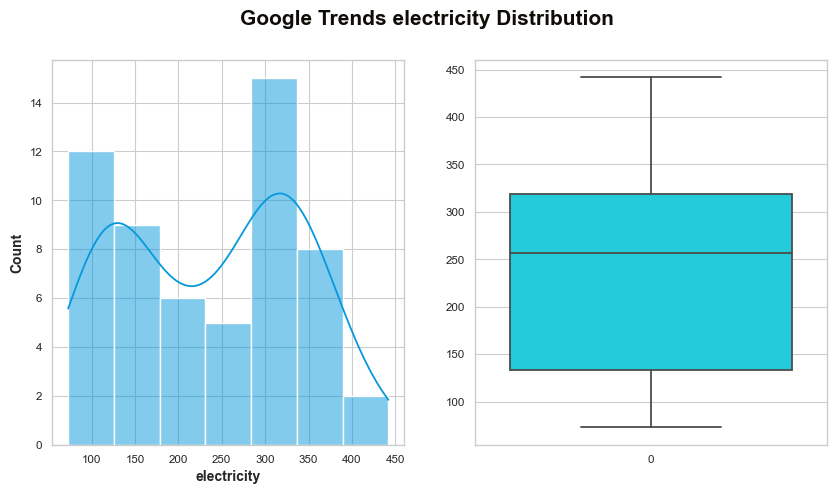

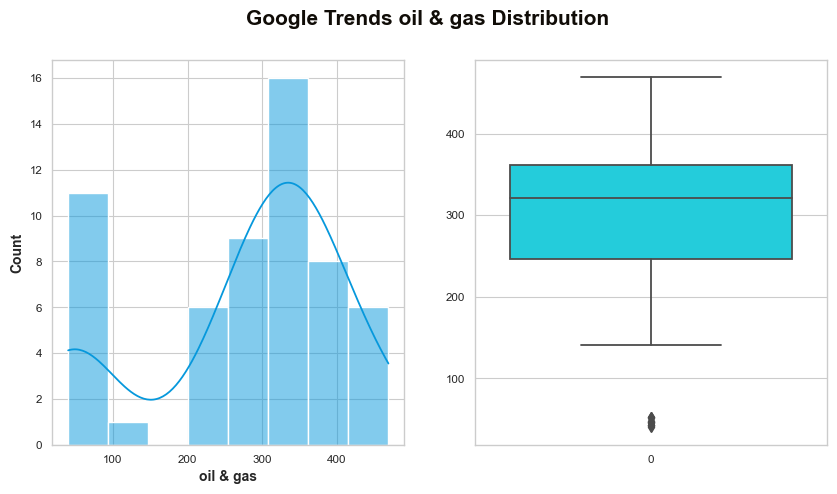

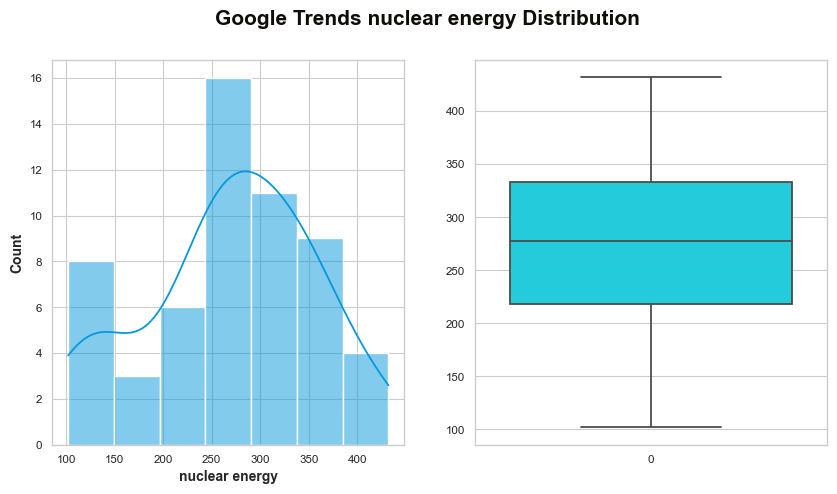

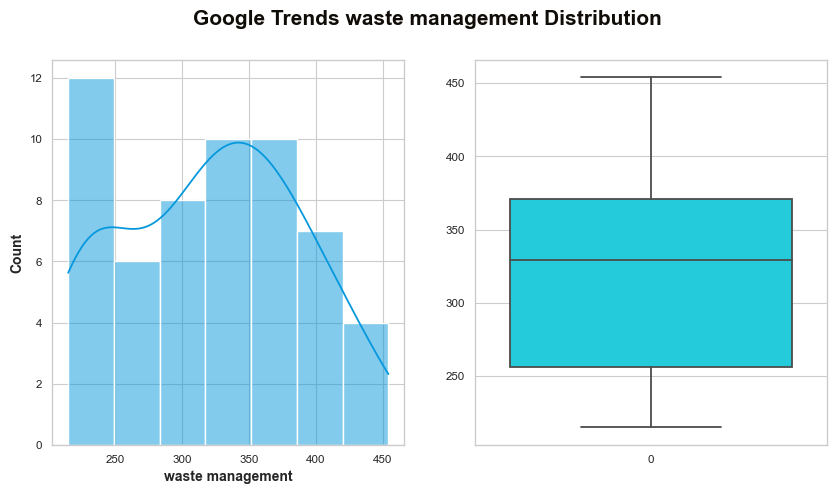

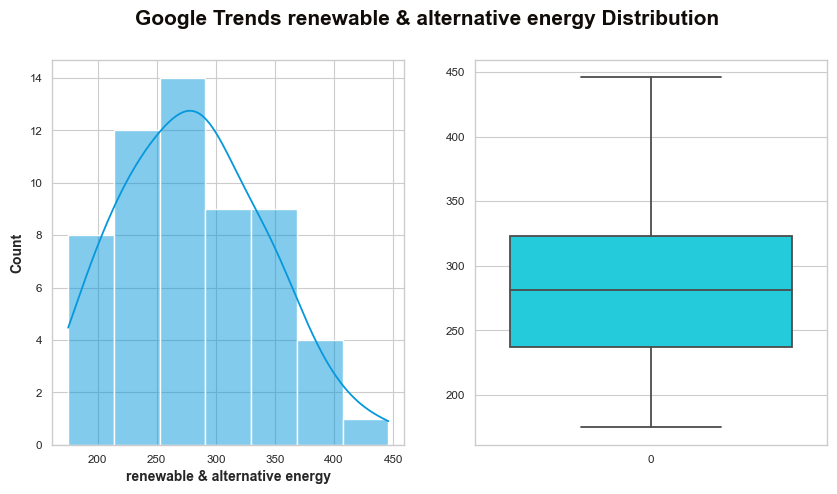

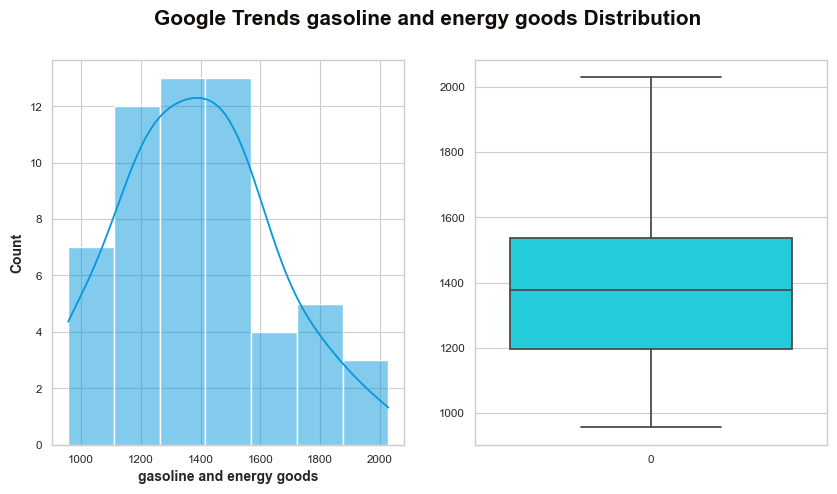

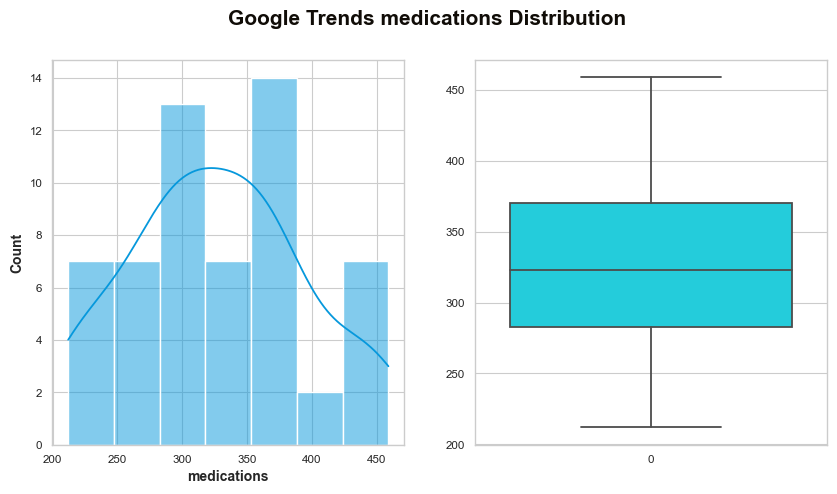

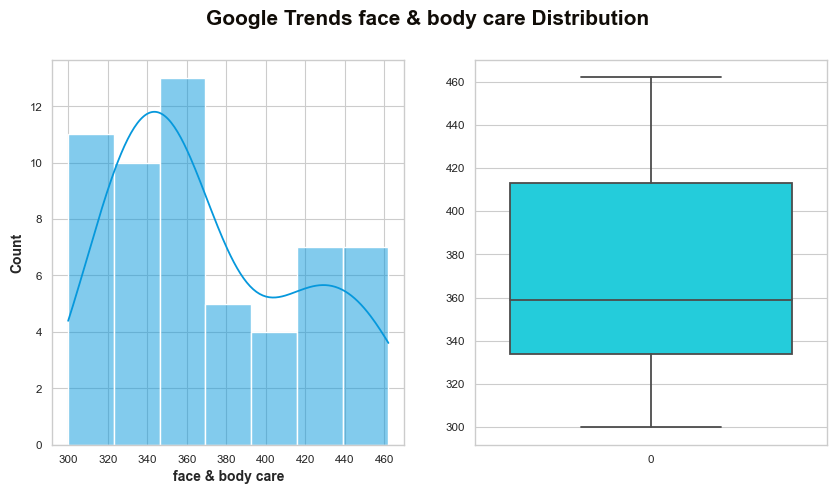

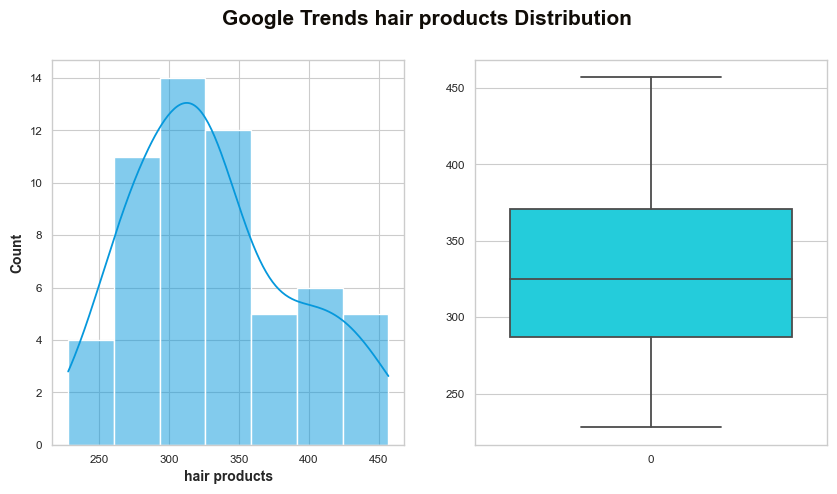

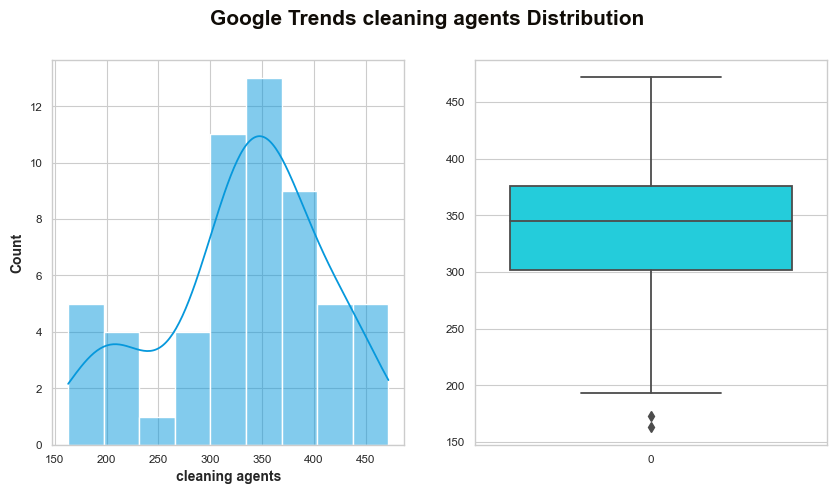

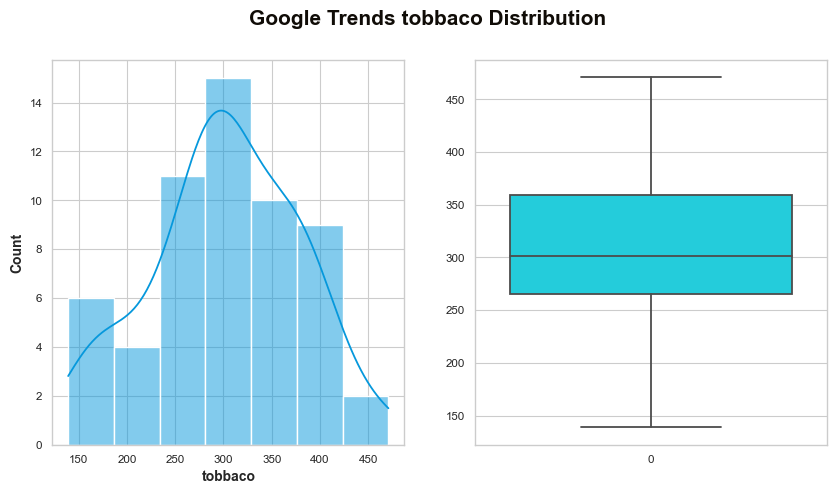

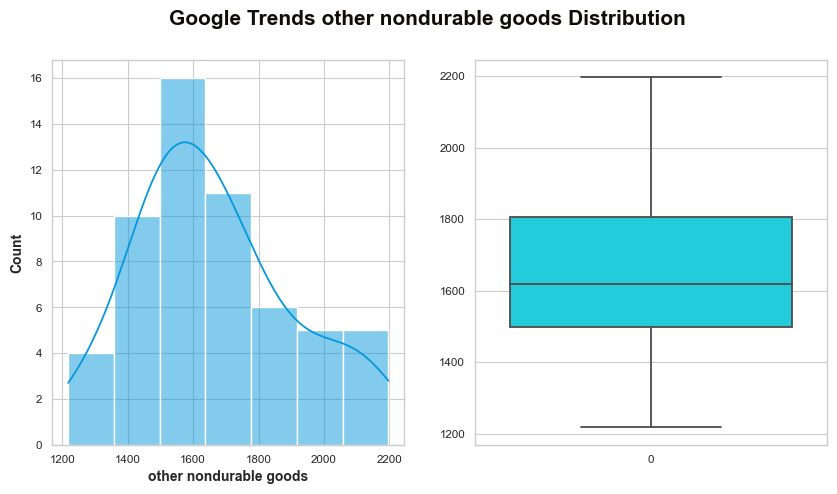

In [32]:
# Check for google trend Transaction Volume & Nominal Distribution
plot_distribution(google_trends, 'Google Trends')

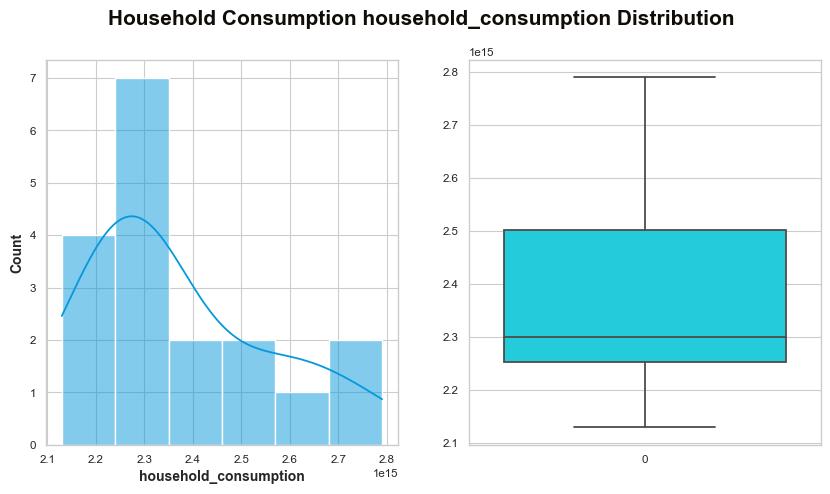

In [33]:
# Check for household consumption Transaction Volume & Nominal Distribution
plot_distribution(household_consumption, 'Household Consumption')

### Skewness Assesment
* This section will show the numerical variables skewness value.
* The 'skewness_checing' function prints the skewness values of the DataFrame's numerical columns. * If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


In [34]:
skewness_checking(debit,'Debit')

 .: Debit Credit Continuous Columns Skewness :.
transaction_volume     0.225331
transaction_nominal    0.473852
dtype: float64


In [35]:
skewness_checking(credit,'Credit')

 .: Credit Credit Continuous Columns Skewness :.
transaction_volume    -0.268328
transaction_nominal   -0.079695
dtype: float64


In [36]:
skewness_checking(ue_bank,'UE Bank')

 .: UE Bank Credit Continuous Columns Skewness :.
transaction_volume    -0.553082
transaction_nominal    0.557254
dtype: float64


In [37]:
skewness_checking(ue_nonbank,'UE Non-Bank')

 .: UE Non-Bank Credit Continuous Columns Skewness :.
transaction_volume     0.564213
transaction_nominal    0.894405
dtype: float64


In [38]:
skewness_checking(qris,'QRIS')

 .: QRIS Credit Continuous Columns Skewness :.
transaction_volume     0.825465
transaction_nominal    0.850018
dtype: float64


In [39]:
skewness_checking(digital_banking,'Digital Banking')

 .: Digital Banking Credit Continuous Columns Skewness :.
transaction_volume     0.526516
transaction_nominal    0.188427
dtype: float64


In [40]:
skewness_checking(google_trends,'Google Trend')

 .: Google Trend Credit Continuous Columns Skewness :.
motorcycle                                  0.615798
auto insurance                             -0.052731
vehicle wheels & tires                      0.568645
vehicle maintanance                         0.353873
microcars & city cars                       0.117322
motor vehicle & parts                       0.709081
home insurance                              0.459601
home furnishing                             0.249410
homemaking & interior design                0.124207
home improvement                            0.571159
bed & bath                                  0.590701
home appliances                             0.239539
furnishing & durable household equipment    0.592004
movies                                      0.573939
comics & animation                          0.427660
TV & video                                  0.426794
broadway & musical theater                  0.797281
computer & video games                      

In [41]:
skewness_checking(household_consumption,'Household Consumption')

 .: Household Consumption Credit Continuous Columns Skewness :.
household_consumption    0.894959
dtype: float64


### Missing Values Exploration

* This section will show missing values exploration for listed columns.
* 'plot_missing_values' function calculates the number of missing values in each column of the DataFrame and 
    visualizes this count using a bar plot. It helps in identifying columns with significant numbers 
    of missing values, which is important for data cleaning and preprocessing.

Missing values in each "debit" dataset columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


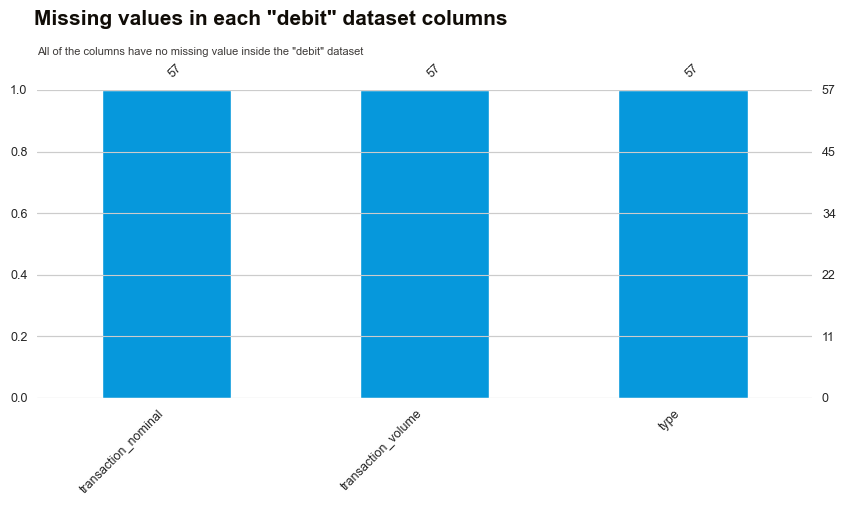

In [42]:
# Plot missing values for the Debit Dataset
plot_missing_values(debit, suptitle='Missing values in each "debit" dataset columns', title='All of the columns have no missing value inside the "debit" dataset')

Missing values in each "credit" DataFrame columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


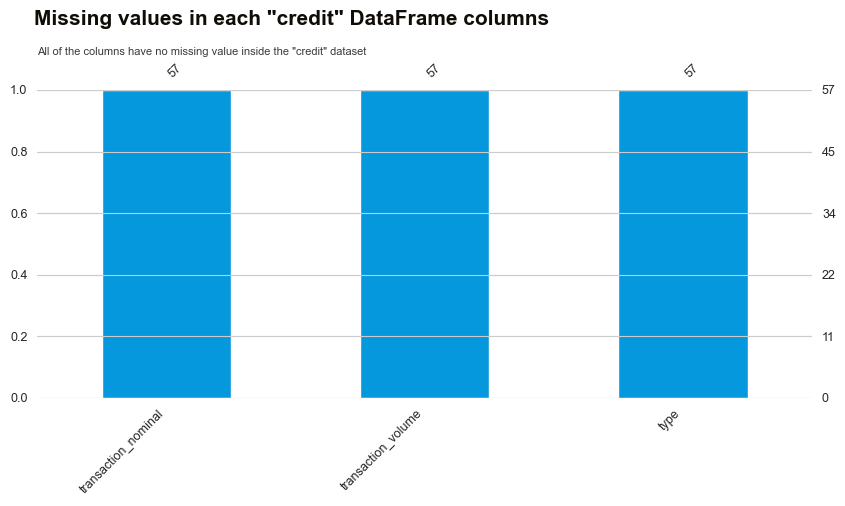

In [43]:
# Plot missing values for the Credit Dataset
plot_missing_values(credit, suptitle='Missing values in each "credit" DataFrame columns', title='All of the columns have no missing value inside the "credit" dataset')

Missing values in each "ue_bank" DataFrame columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


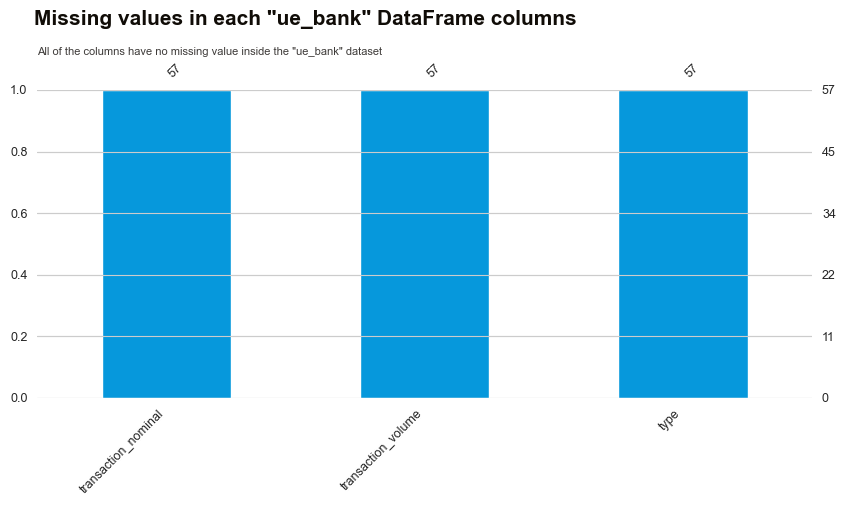

In [44]:
# Plot missing values for the UE Bank Dataset
plot_missing_values(ue_bank, suptitle='Missing values in each "ue_bank" DataFrame columns', title='All of the columns have no missing value inside the "ue_bank" dataset')

Missing values in each "ue_nonbank" DataFrame columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


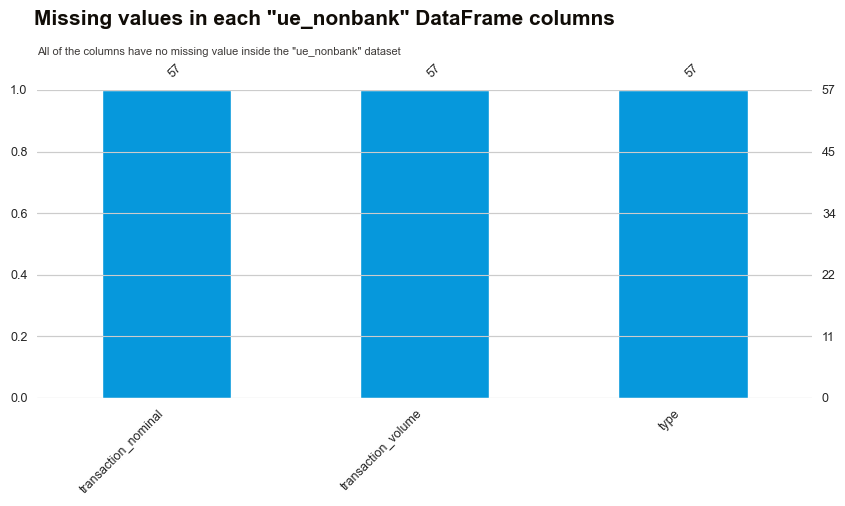

In [45]:
# Plot missing values for the UE Non-Bank Dataset
plot_missing_values(ue_nonbank, suptitle='Missing values in each "ue_nonbank" DataFrame columns', title='All of the columns have no missing value inside the "ue_nonbank" dataset')

Missing values in each "QRIS" DataFrame columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


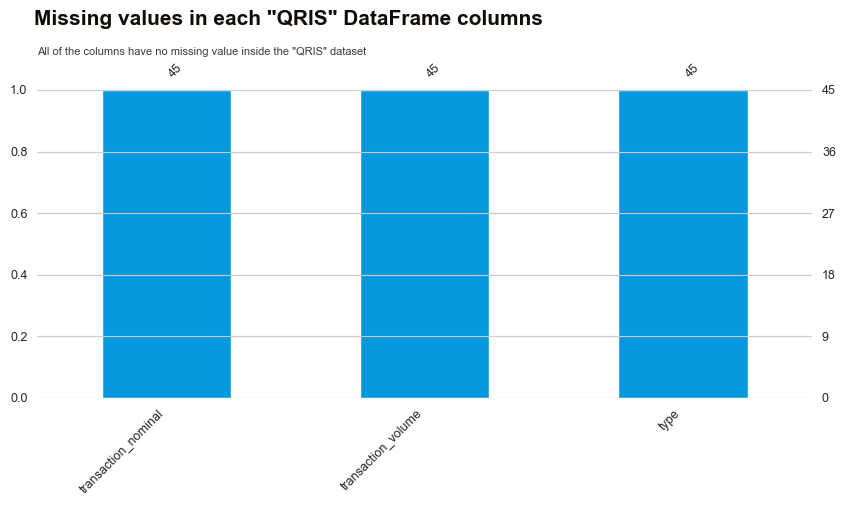

In [46]:
# Plot missing values for the QRIS Dataset
plot_missing_values(qris, suptitle='Missing values in each "QRIS" DataFrame columns', title='All of the columns have no missing value inside the "QRIS" dataset')

Missing values in each "digital_banking" DataFrame columns
type                   0
transaction_volume     0
transaction_nominal    0
dtype: int64


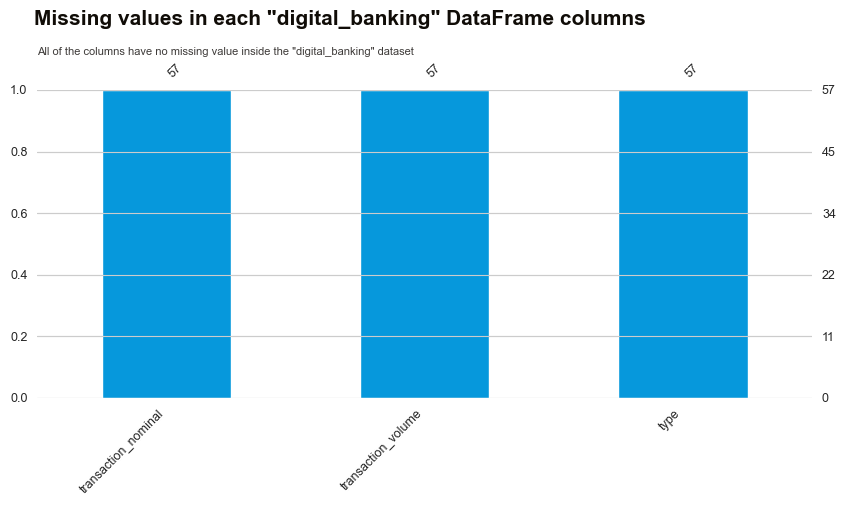

In [47]:
# Plot missing values for the Digital Banking Dataset
plot_missing_values(digital_banking, suptitle='Missing values in each "digital_banking" DataFrame columns', title='All of the columns have no missing value inside the "digital_banking" dataset')

Missing values in each "google_trends" DataFrame columns
motorcycle                                  0
auto insurance                              0
vehicle wheels & tires                      0
vehicle maintanance                         0
microcars & city cars                       0
motor vehicle & parts                       0
home insurance                              0
home furnishing                             0
homemaking & interior design                0
home improvement                            0
bed & bath                                  0
home appliances                             0
furnishing & durable household equipment    0
movies                                      0
comics & animation                          0
TV & video                                  0
broadway & musical theater                  0
computer & video games                      0
recreational goods                          0
mobile phones                               0
e-books                

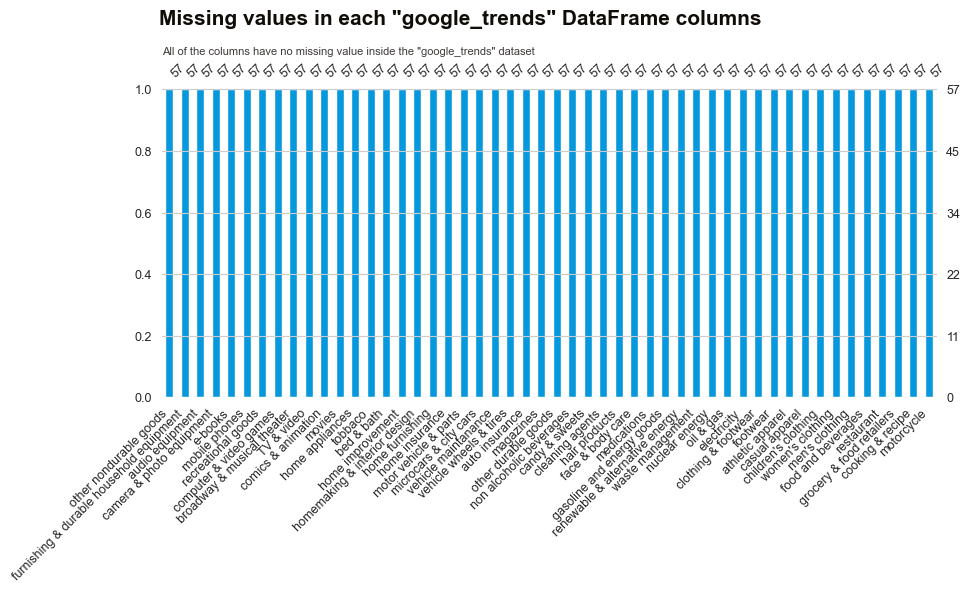

In [48]:
# Plot missing values for the Google Trend Dataset
plot_missing_values(google_trends, suptitle='Missing values in each "google_trends" DataFrame columns', title='All of the columns have no missing value inside the "google_trends" dataset')

Missing values in each "household_consumption" DataFrame columns
household_consumption    0
dtype: int64


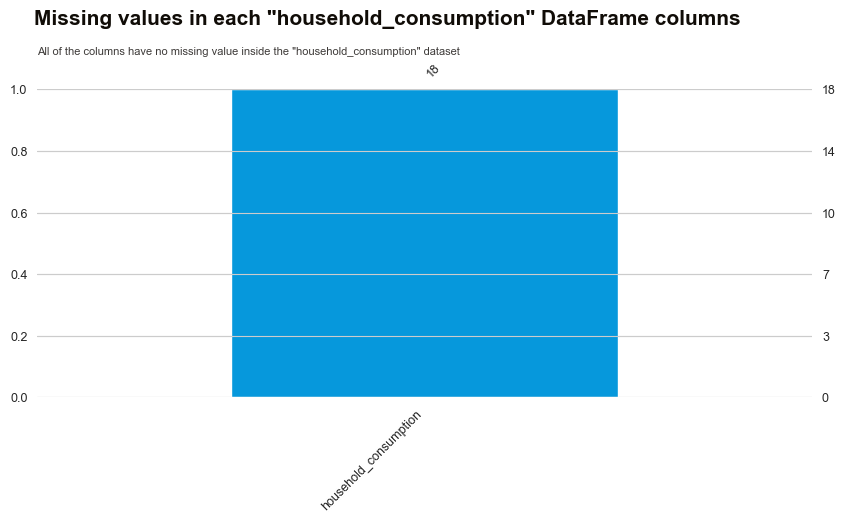

In [49]:
# Plot missing values for the Household Consumption Dataset
plot_missing_values(household_consumption, suptitle='Missing values in each "household_consumption" DataFrame columns', title='All of the columns have no missing value inside the "household_consumption" dataset')

## Data Preprocessing
Data pre-processing will be performed in this section to ensure high-quality data.

### Outlier Handling

* In this section, outliers data points will be handled by capping them using the Interquartile Range (IQR) method.
* 'outlier_handling' function iterates through each specified column and calculates the first (Q1) and third (Q3) quartiles, and the Interquartile Range (IQR). It then identifies outliers as those values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. These outliers are then capped to the lower and upper whiskers respectively, mitigating their impact on the dataset.



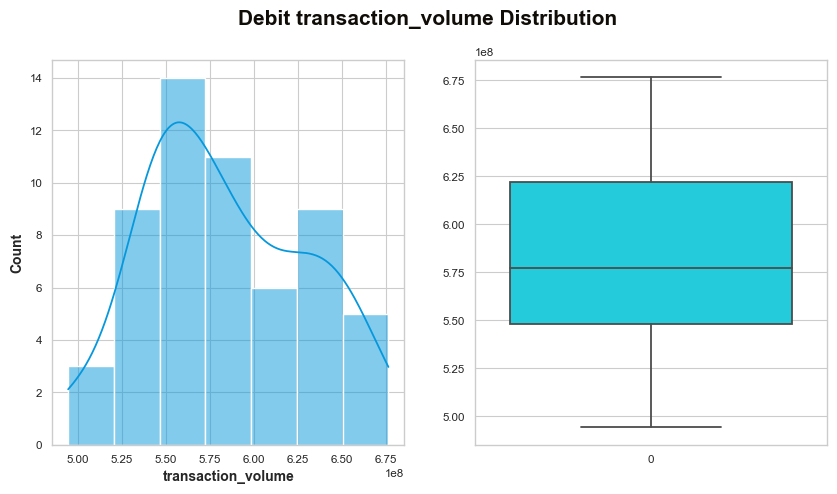

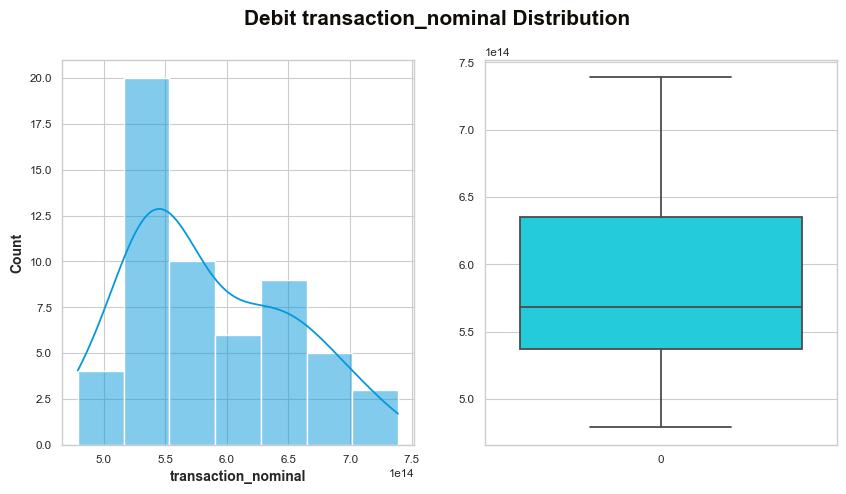

In [50]:
# Outlier handling for Debit Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(debit, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for Debit Dataset
plot_distribution(debit, 'Debit')

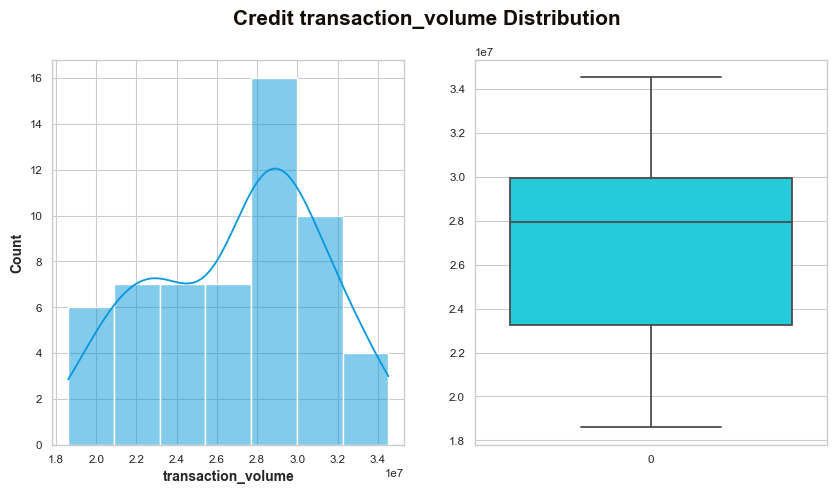

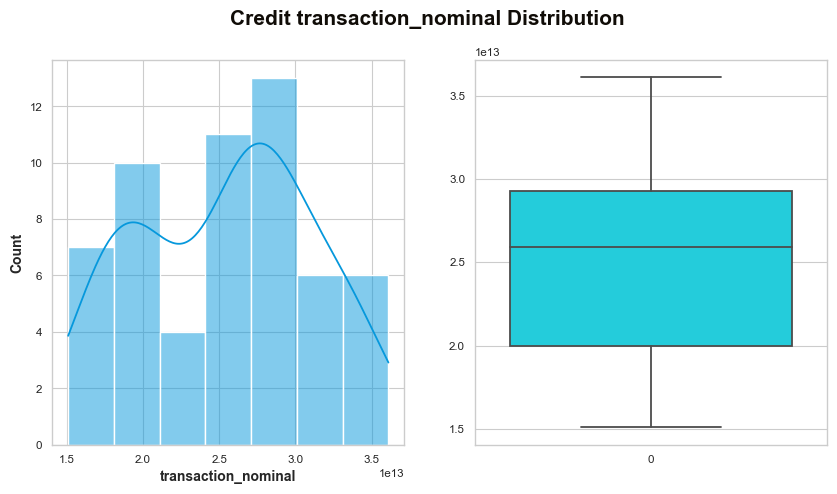

In [51]:
# Outlier handling for Credit Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(credit, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for Credit Dataset
plot_distribution(credit, 'Credit')

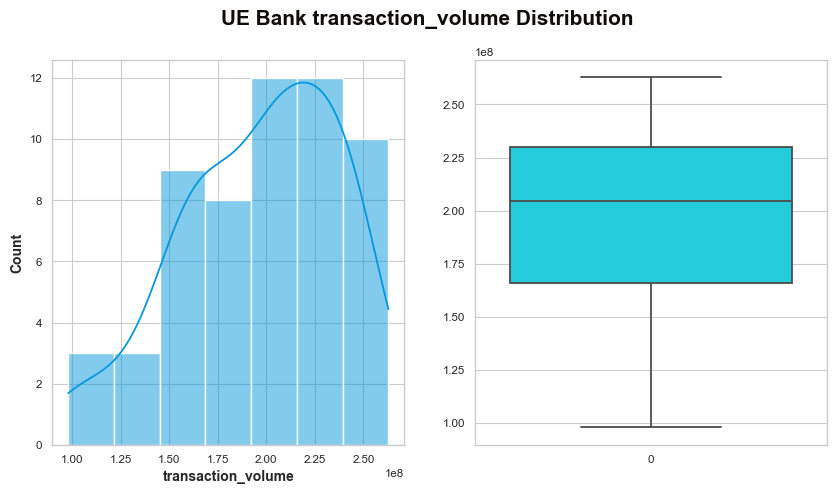

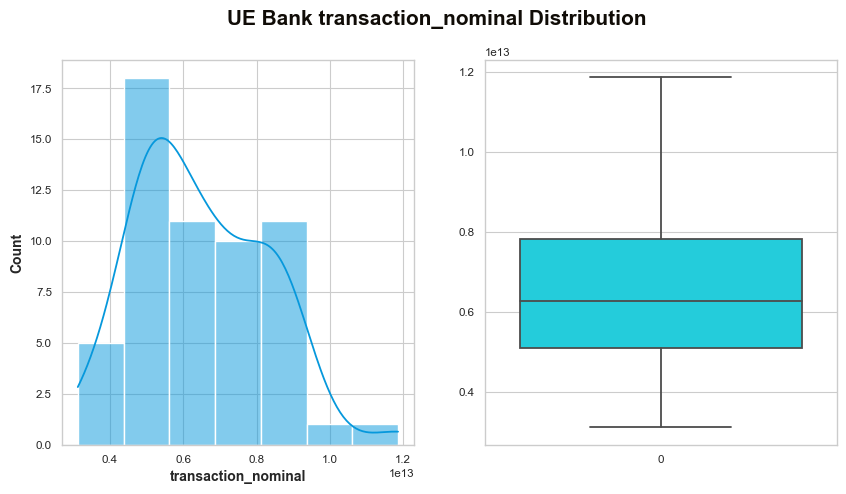

In [52]:
# Outlier handling for UE Bank Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(ue_bank, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for UE Bank Dataset
plot_distribution(ue_bank, 'UE Bank')

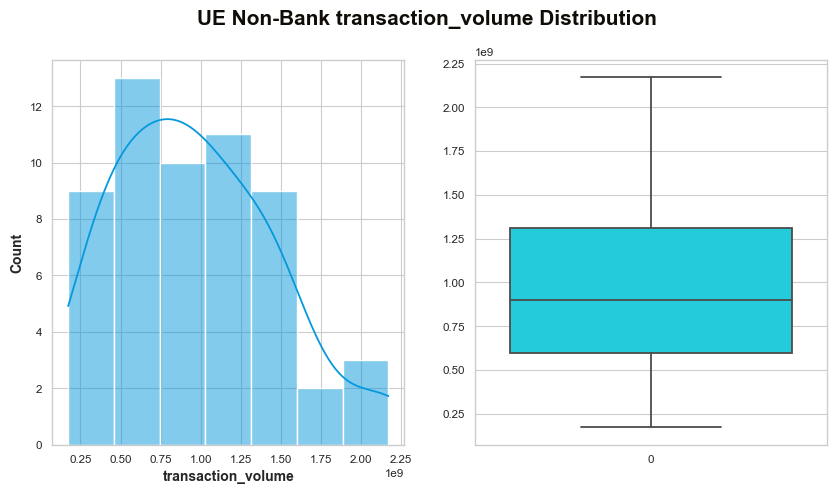

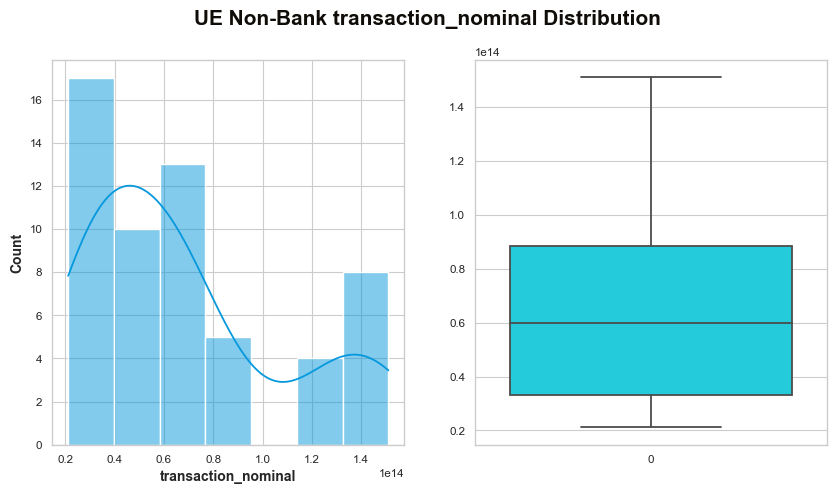

In [53]:
# Outlier handling for UE Non-Bank Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(ue_nonbank, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for UE Non-Bank Dataset
plot_distribution(ue_nonbank, 'UE Non-Bank')

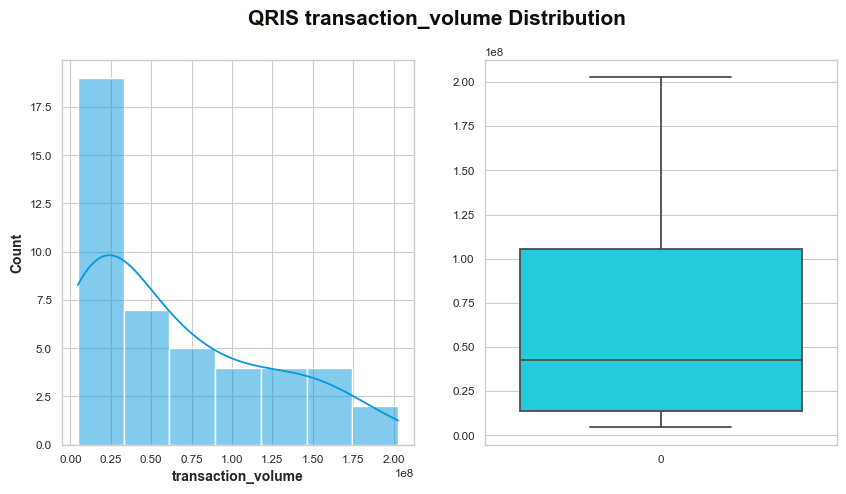

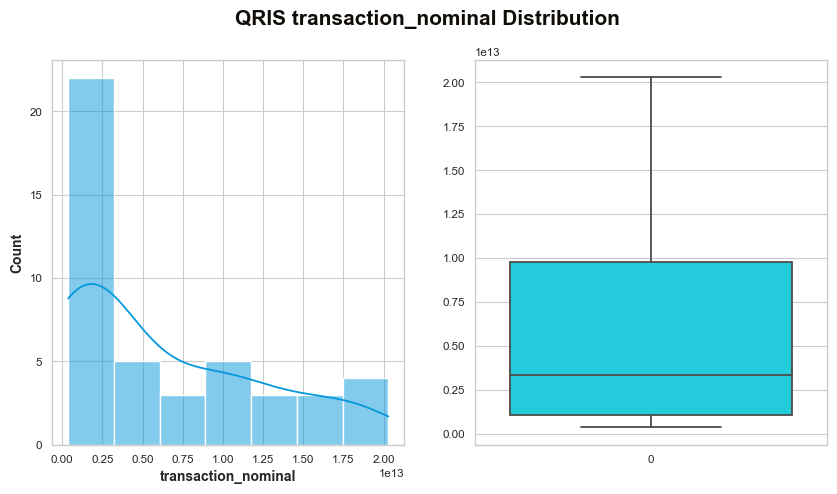

In [54]:
# Outlier handling for QRIS Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(qris, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for QRIS Dataset
plot_distribution(qris, 'QRIS')

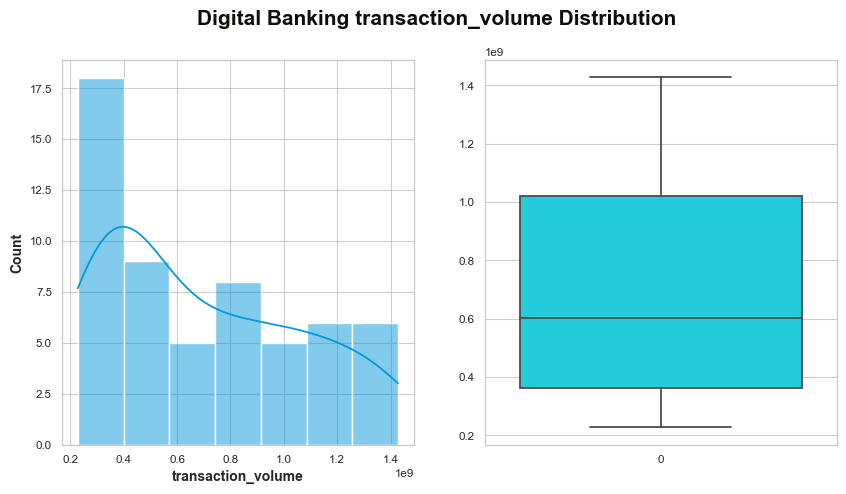

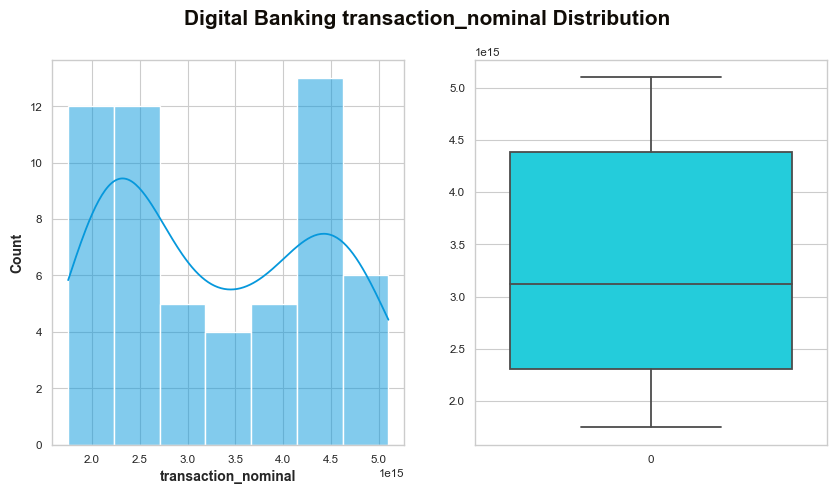

In [55]:
# Outlier handling for Digital Banking Dataset 'transaction_volume' & 'transaction_nominal' columns
outlier_handling(digital_banking, ['transaction_volume', 'transaction_nominal'])

# Show current continuous distribution for Digital Banking Dataset
plot_distribution(digital_banking, 'Digital Banking')

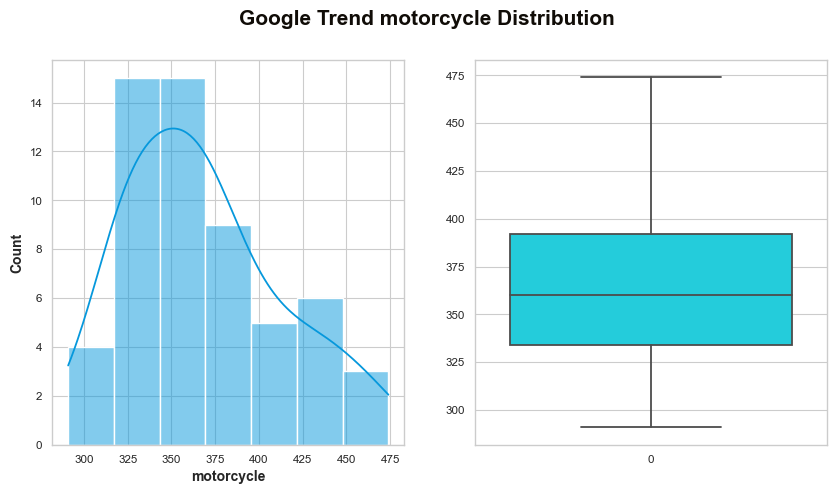

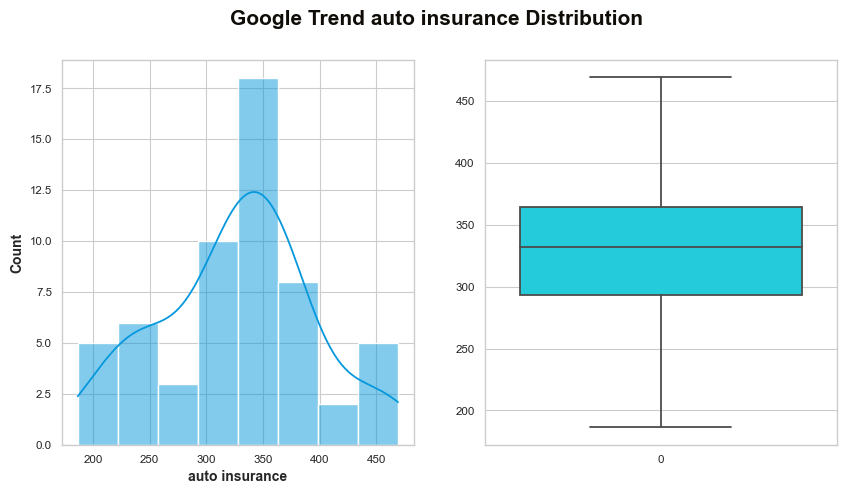

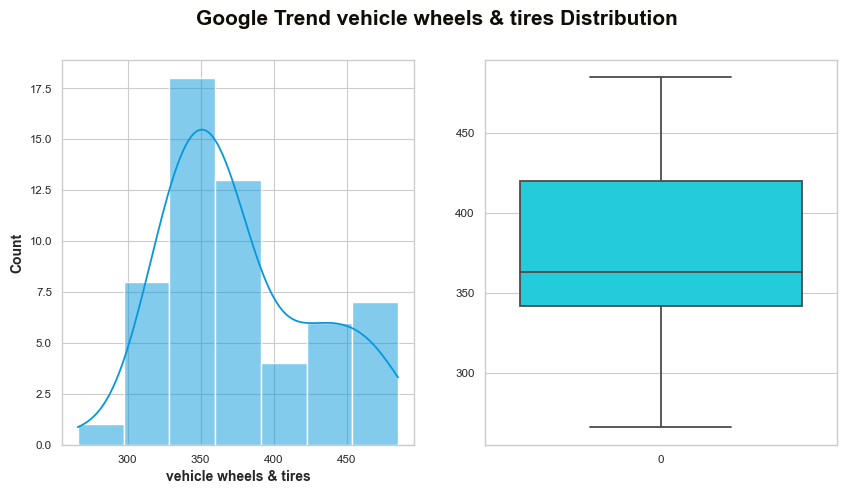

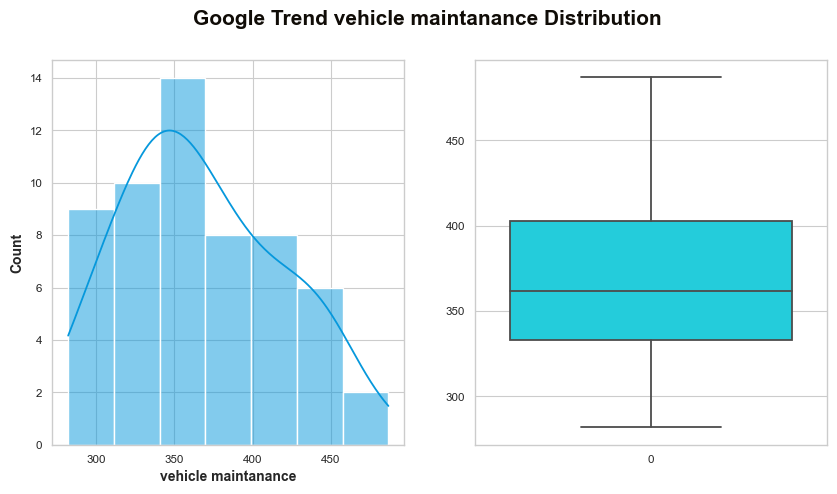

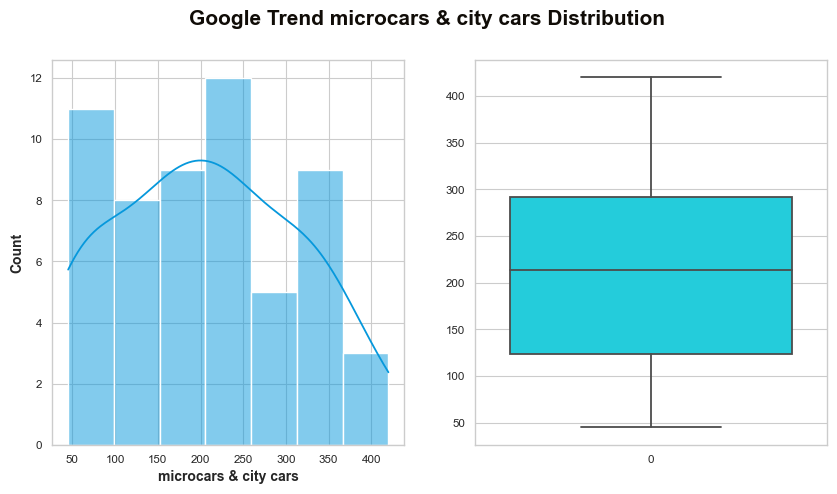

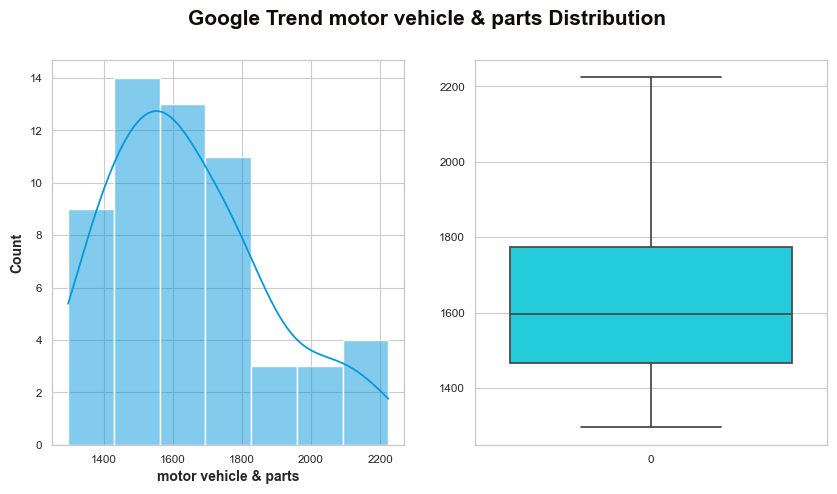

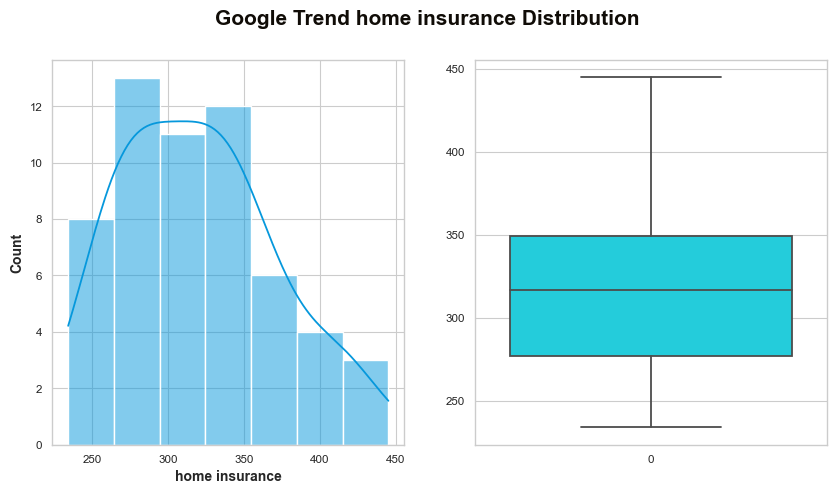

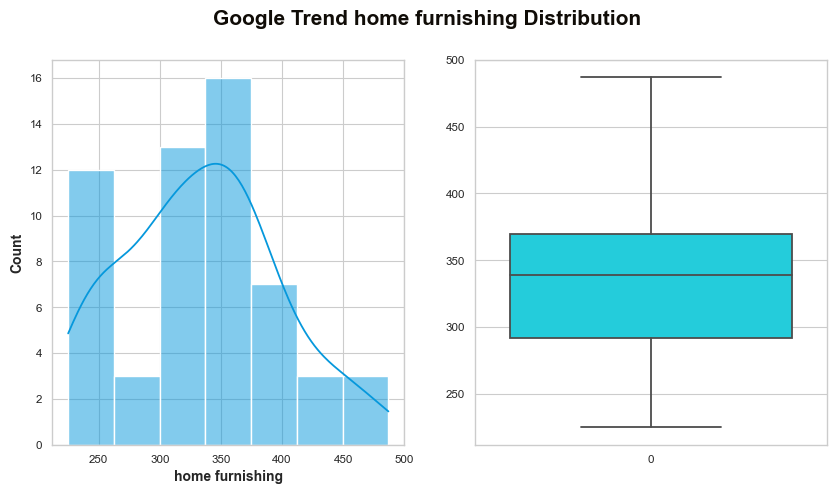

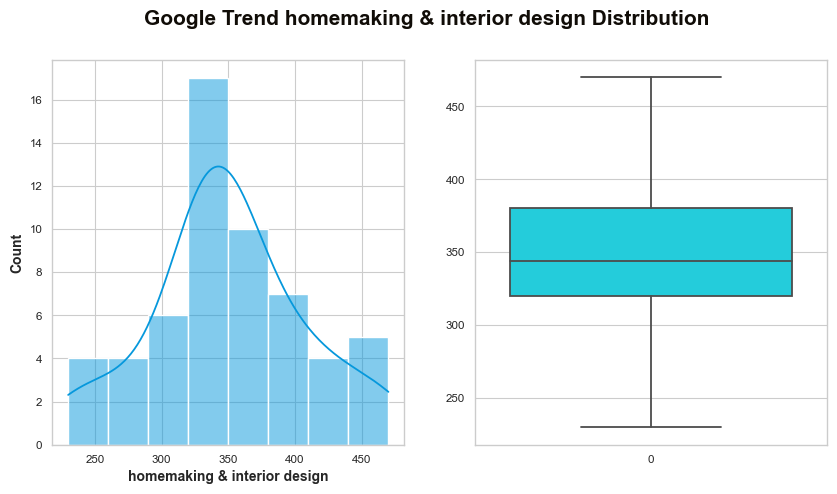

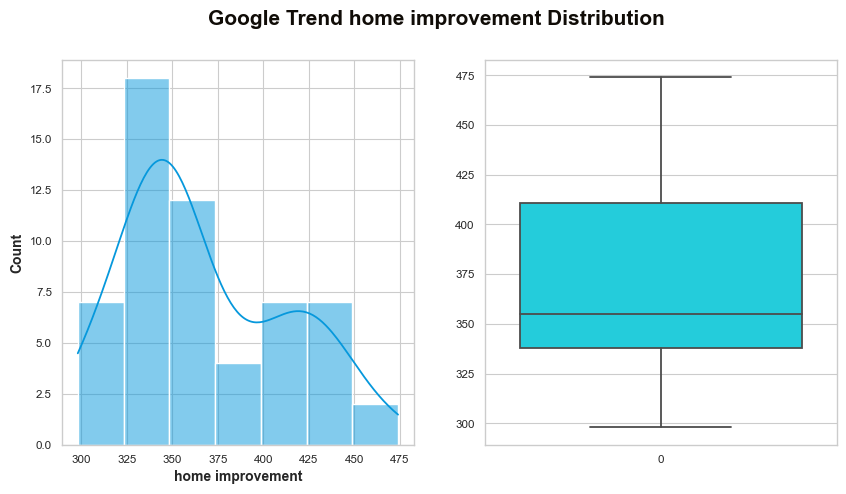

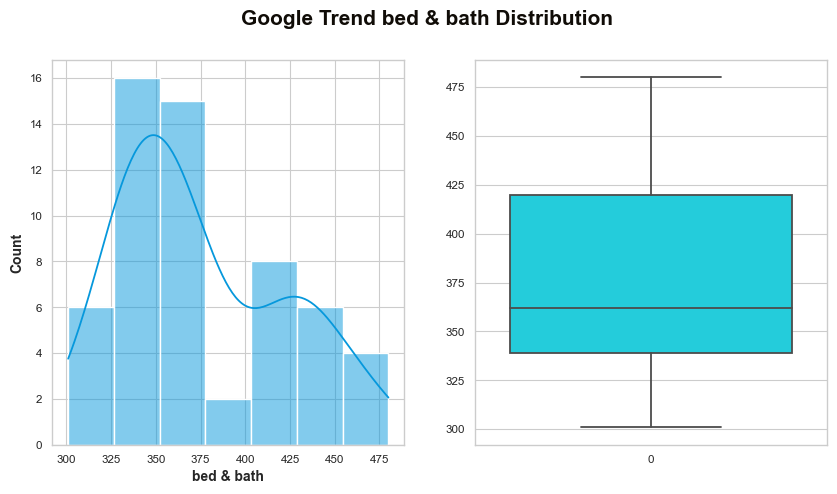

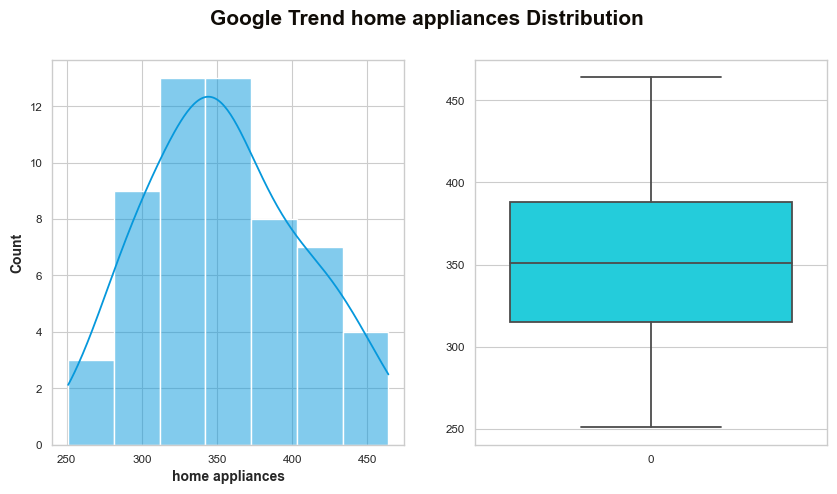

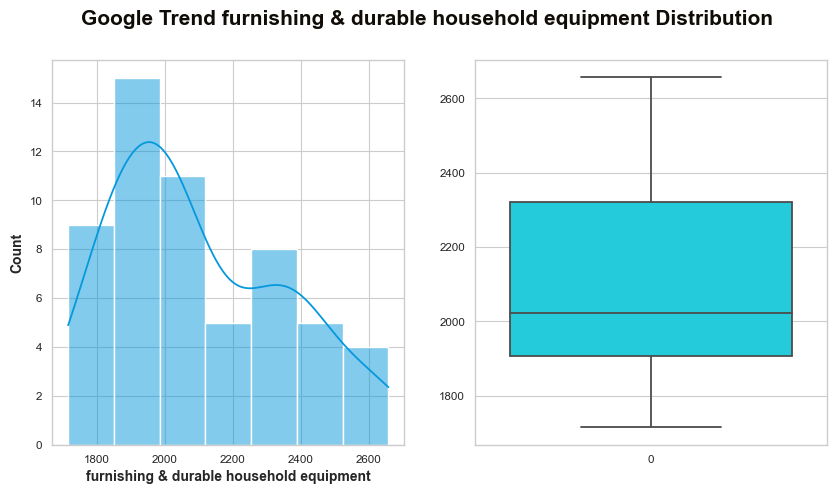

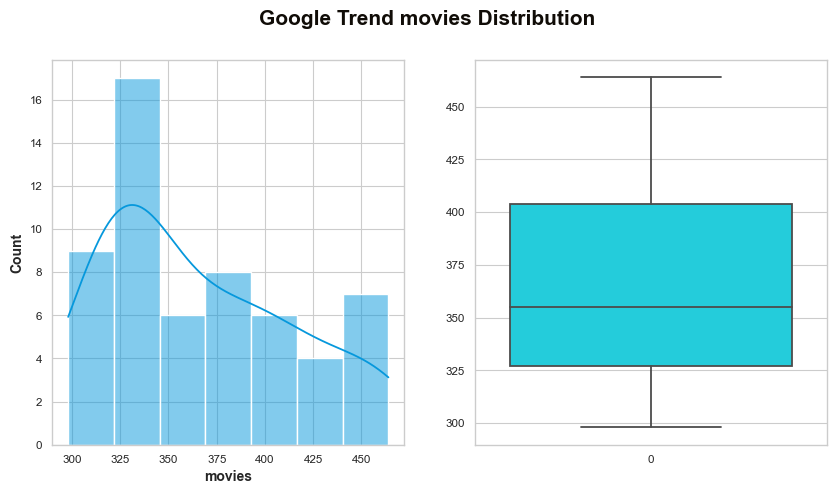

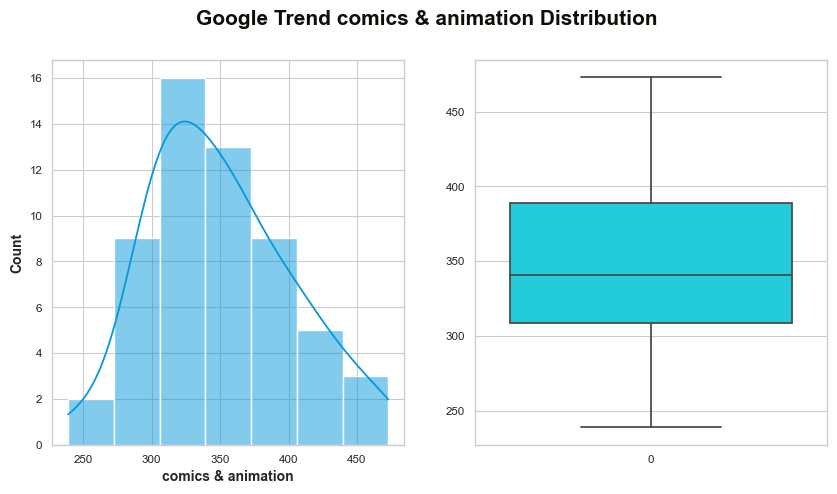

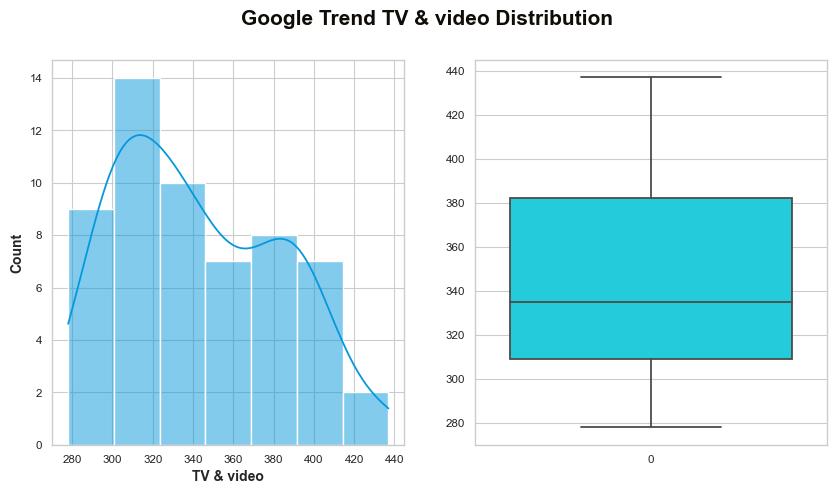

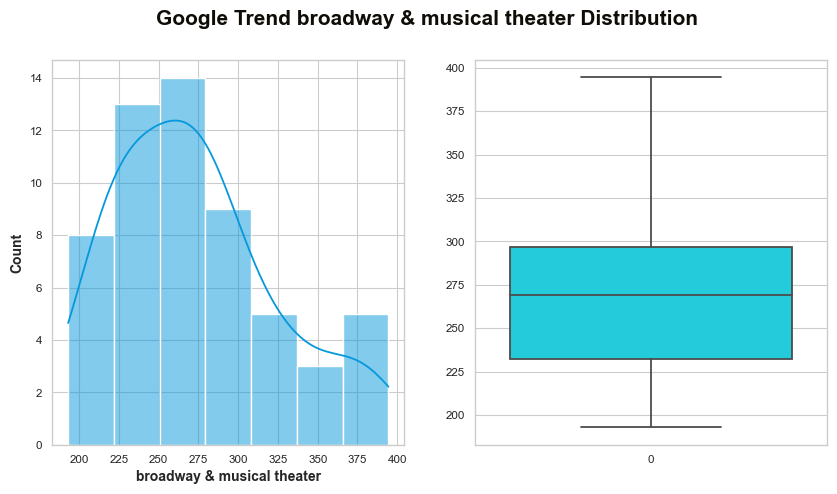

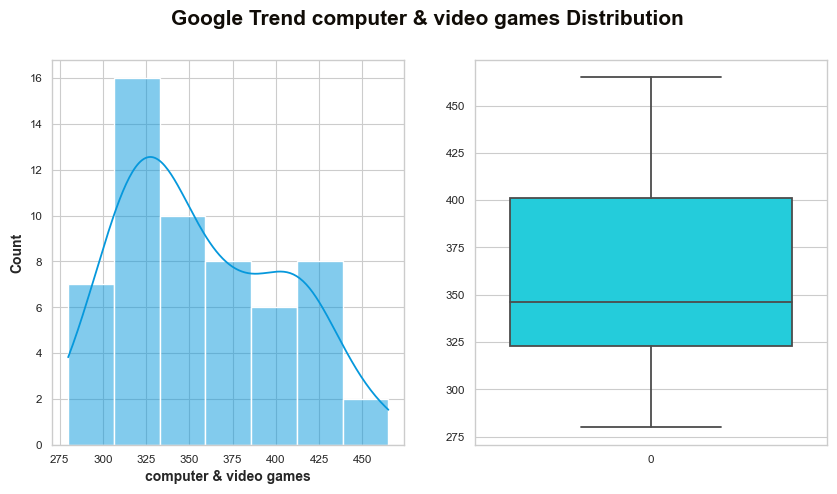

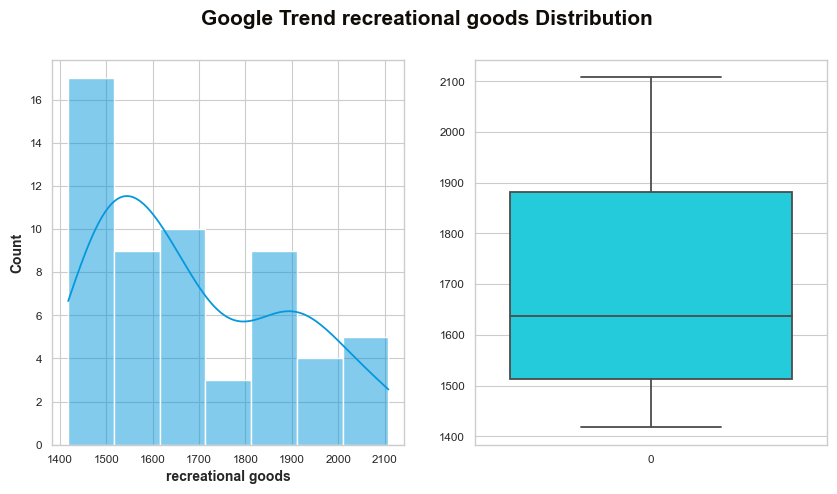

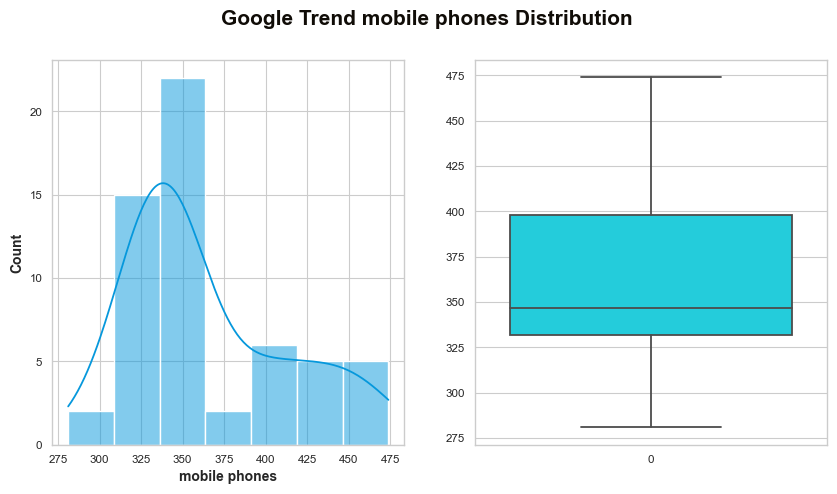

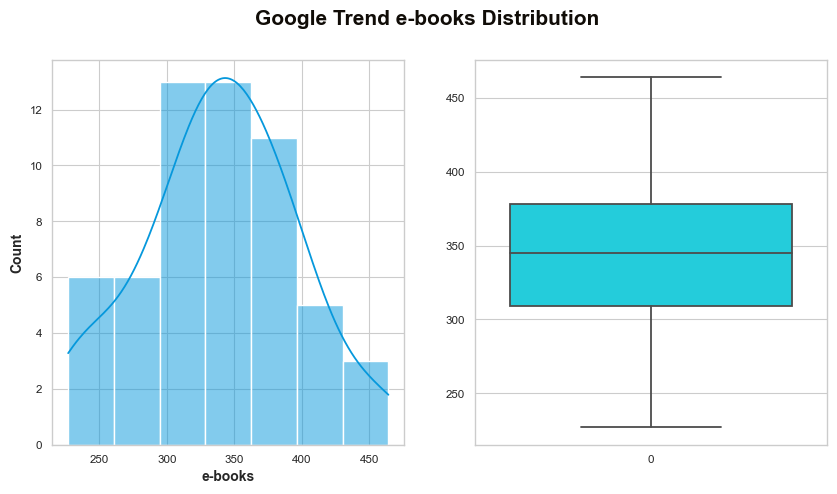

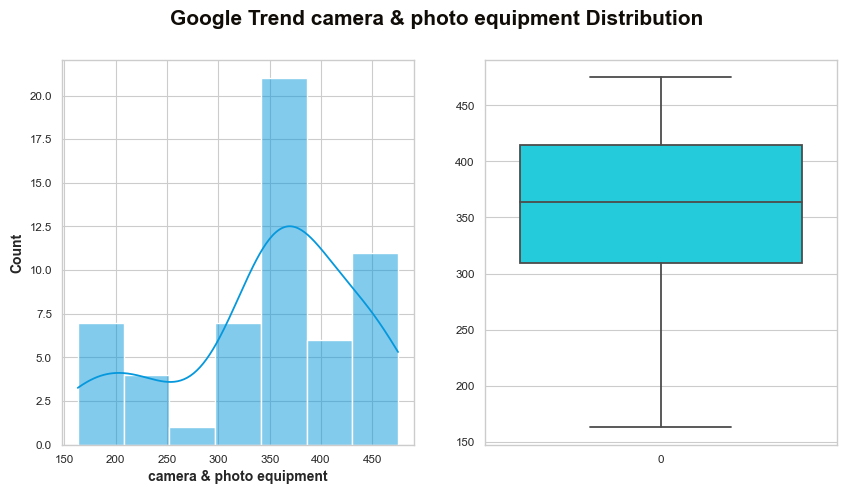

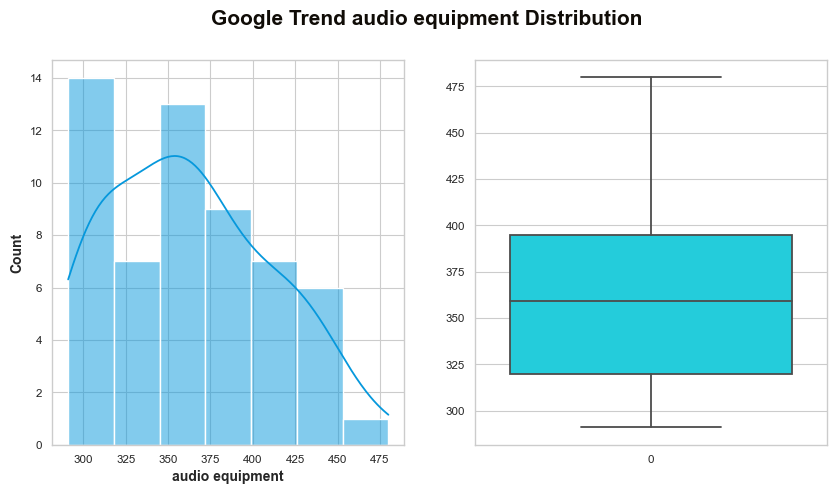

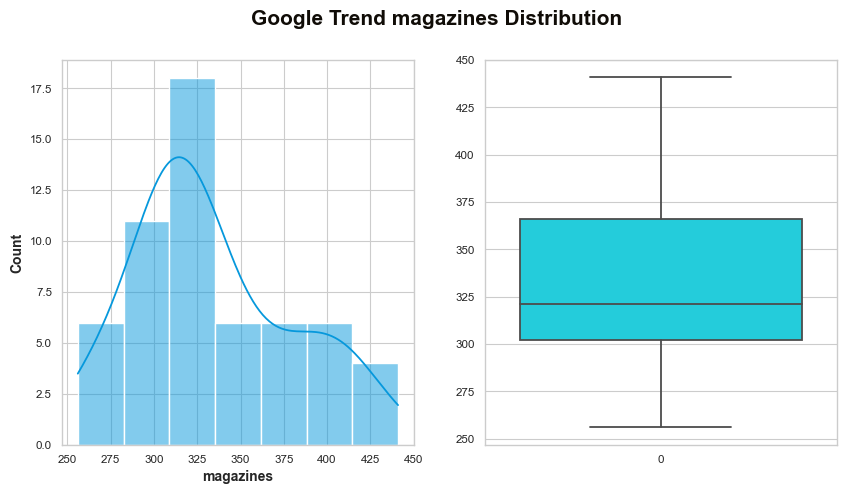

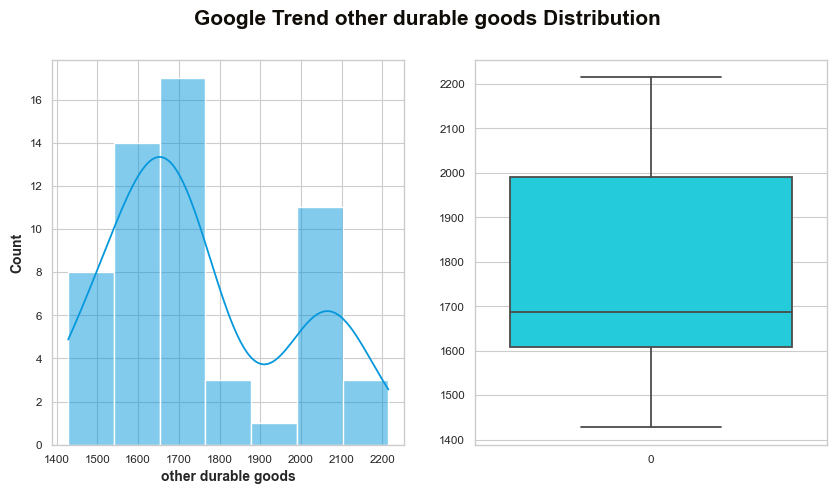

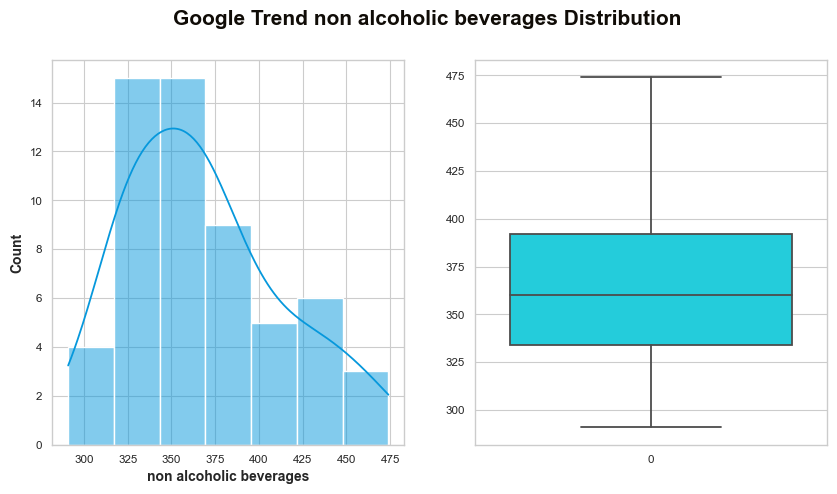

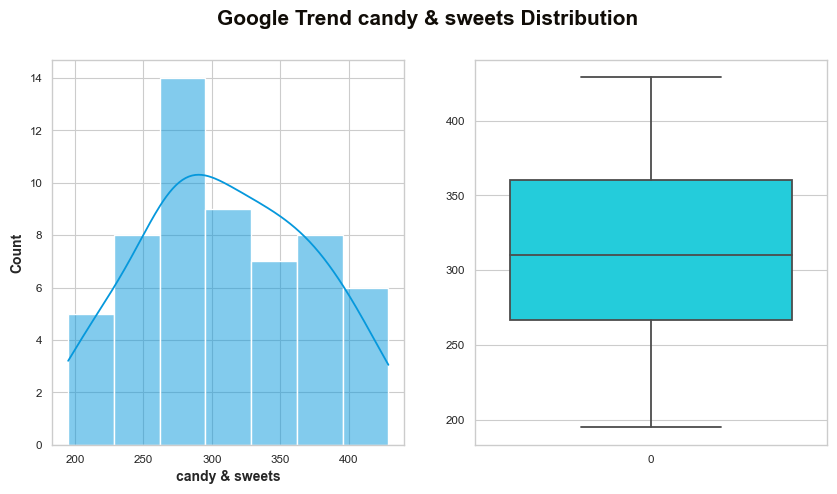

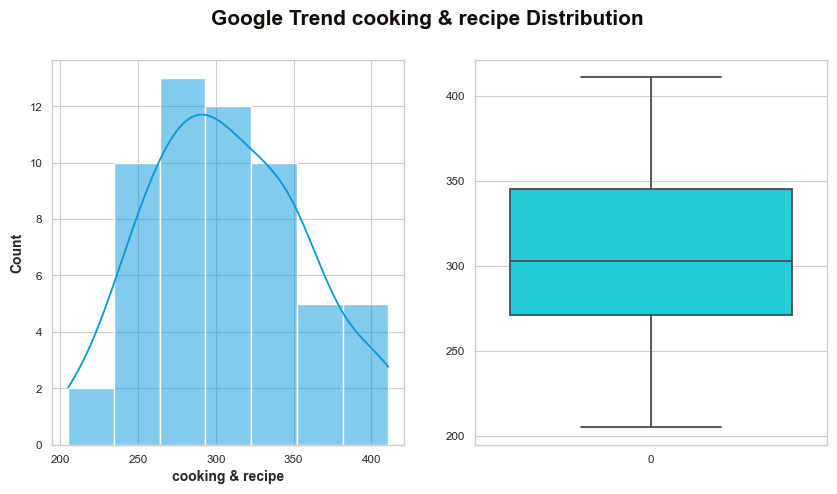

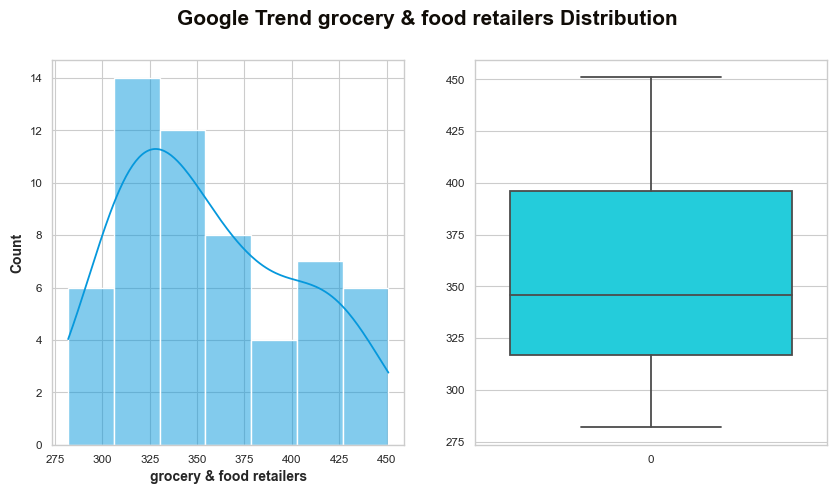

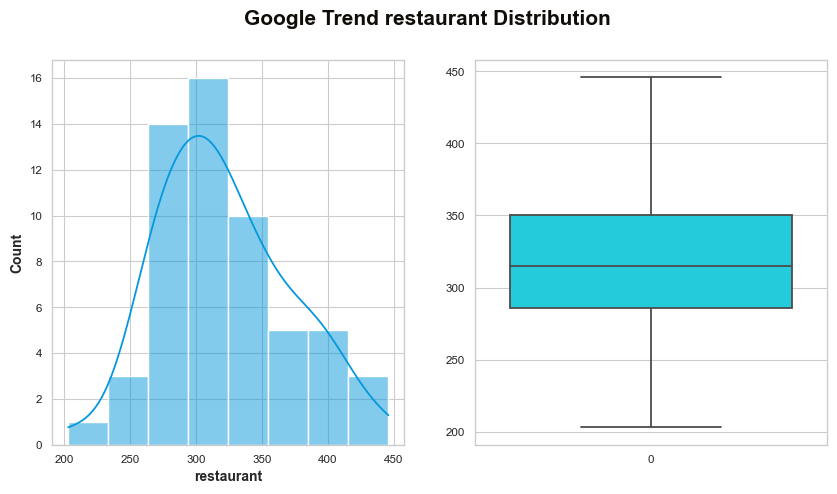

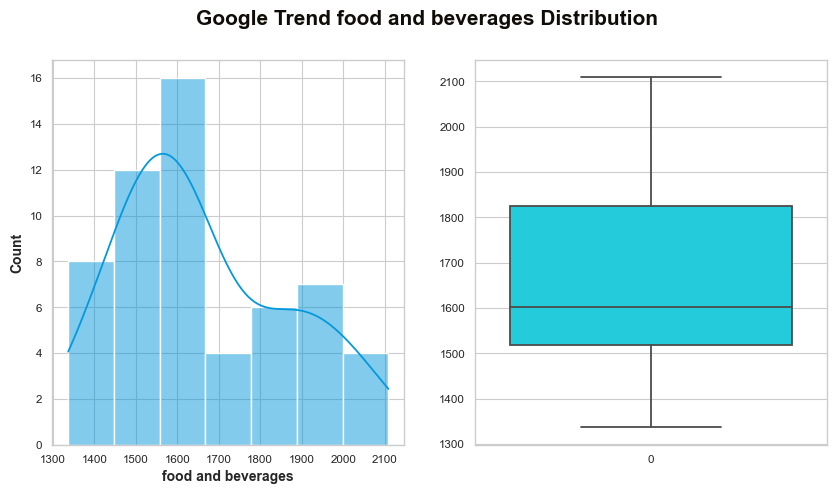

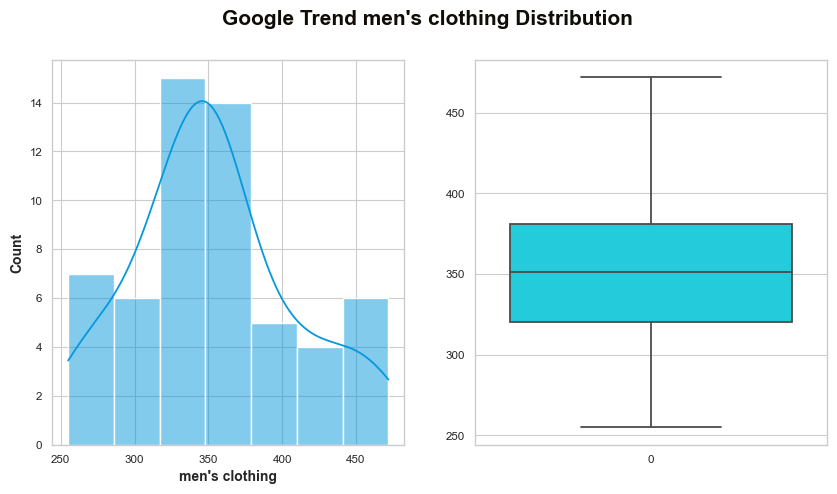

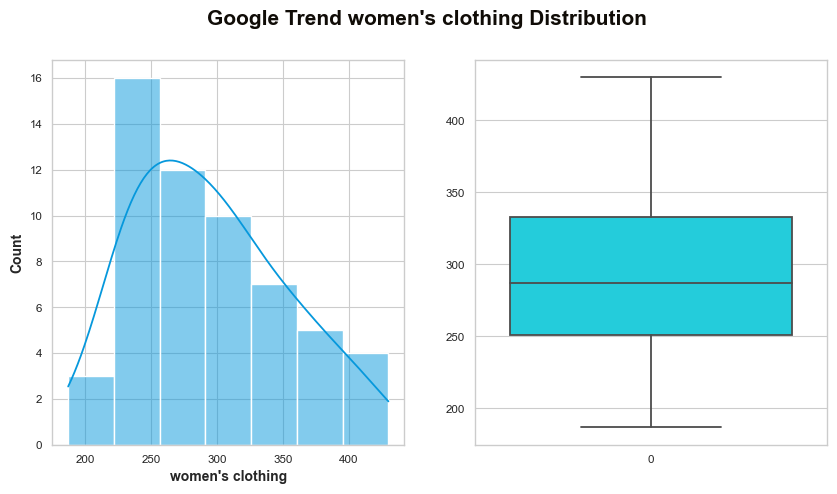

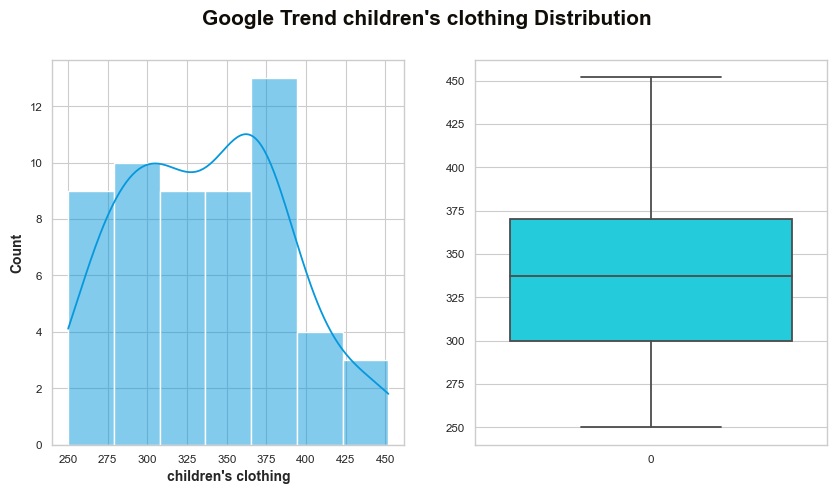

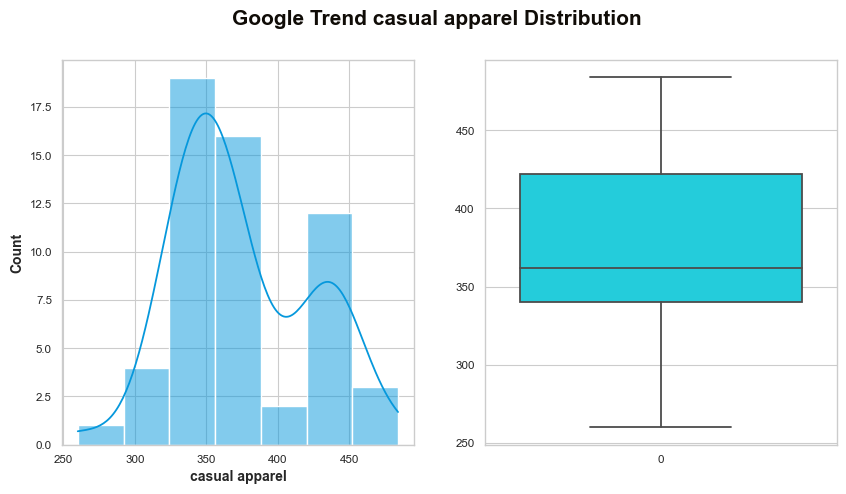

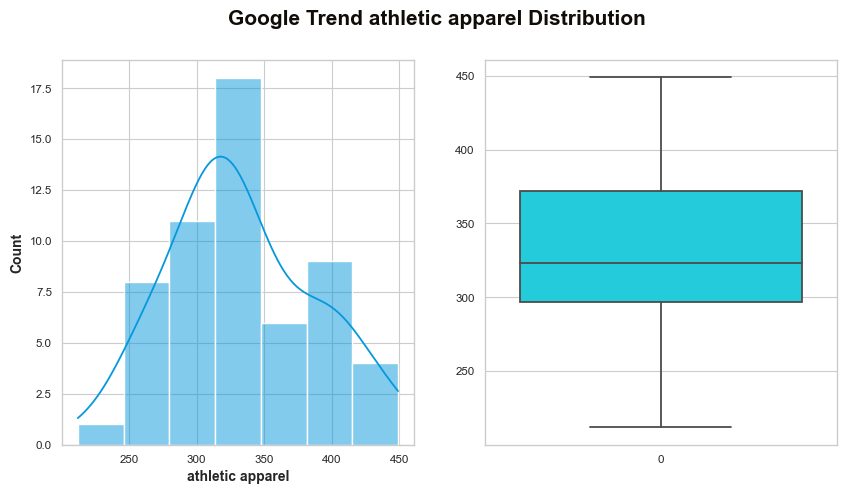

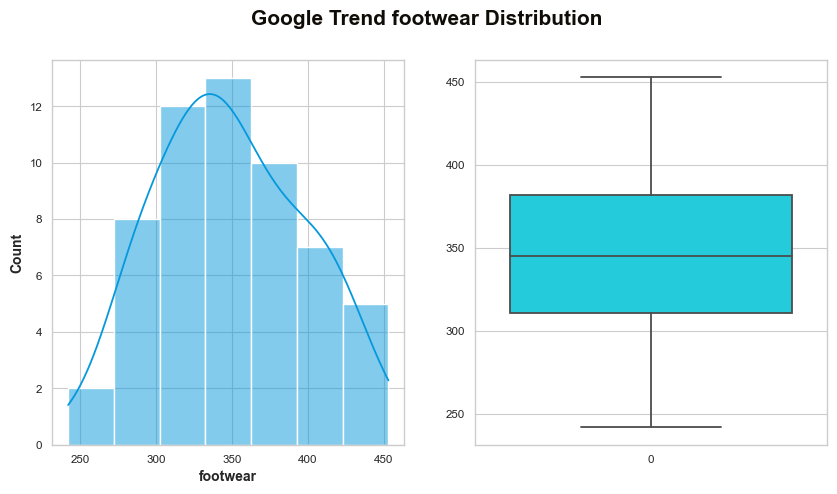

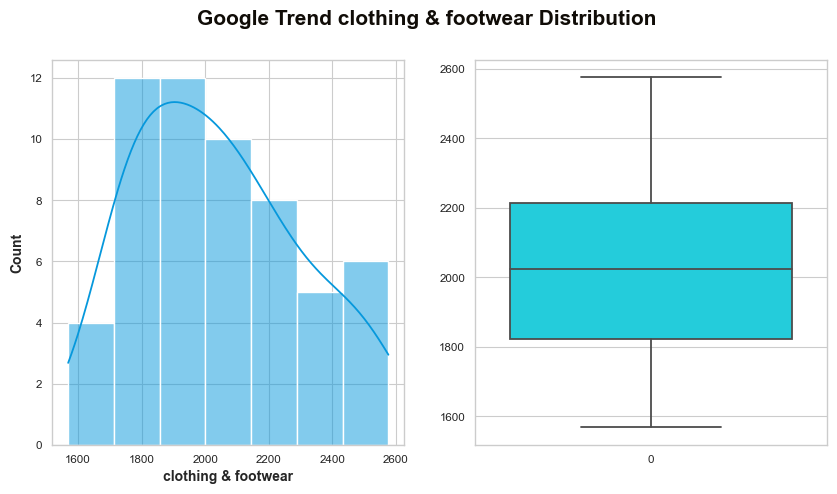

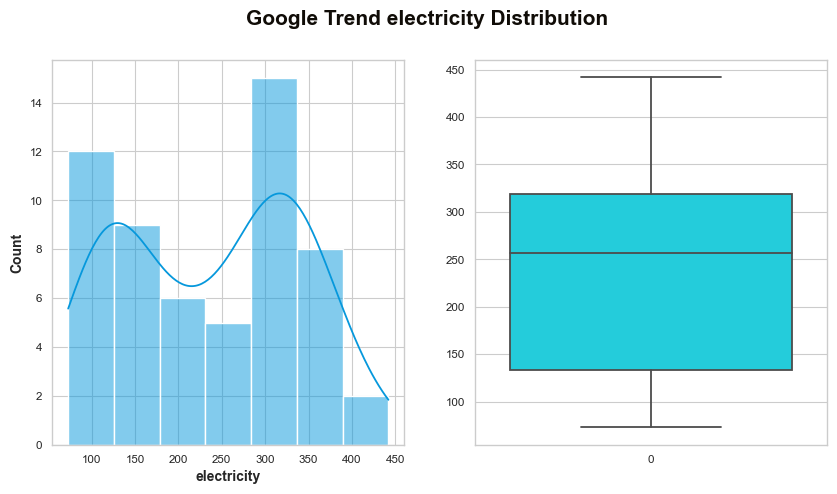

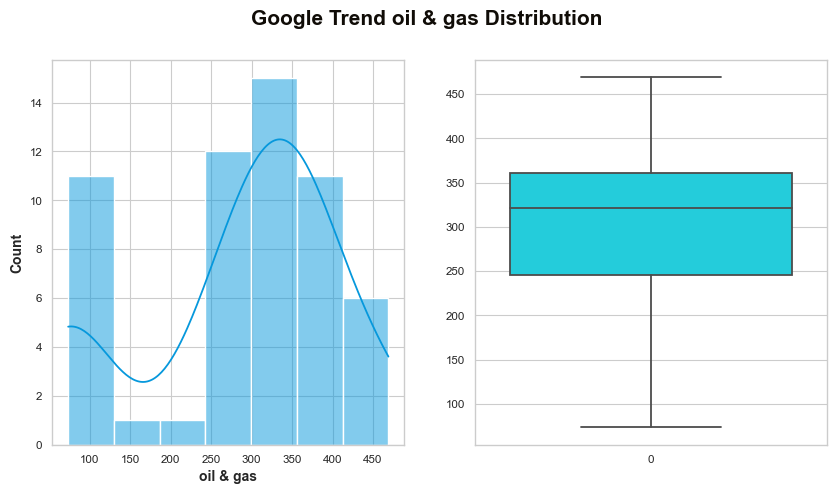

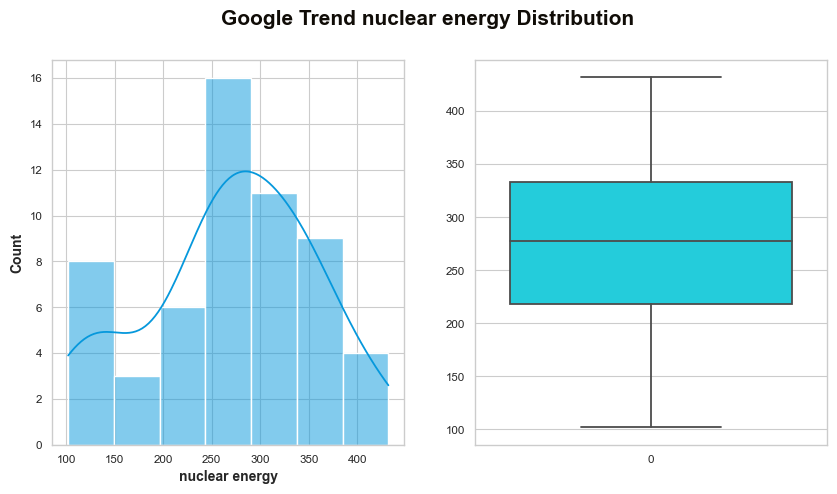

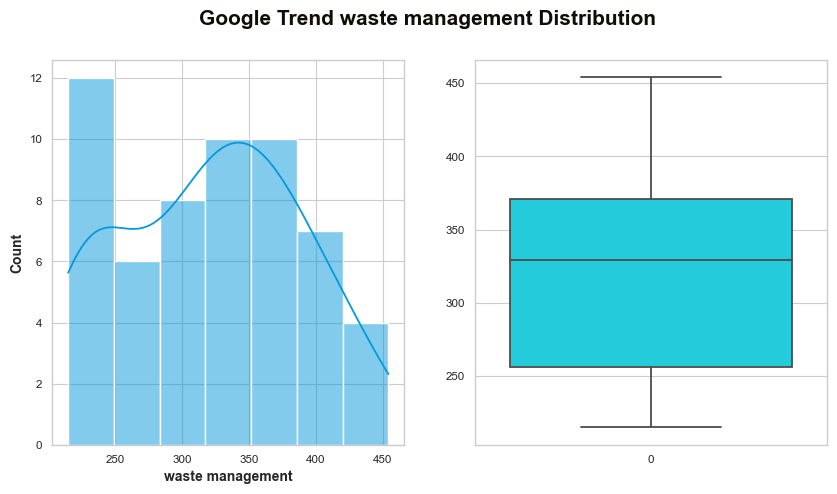

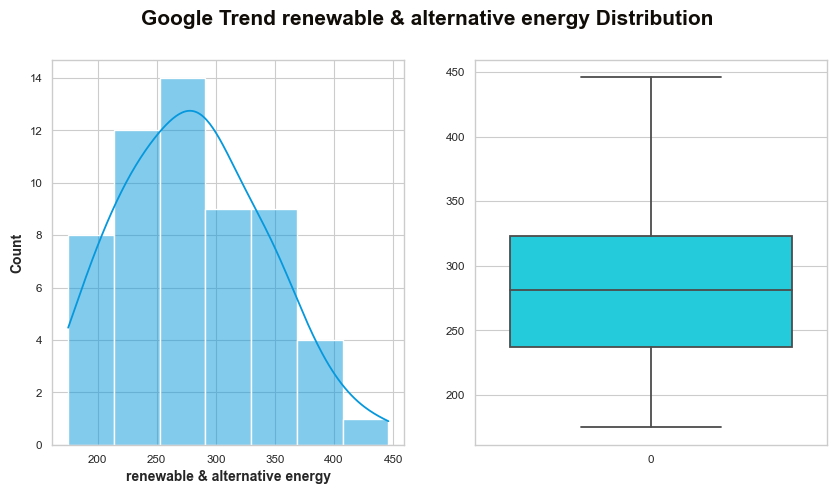

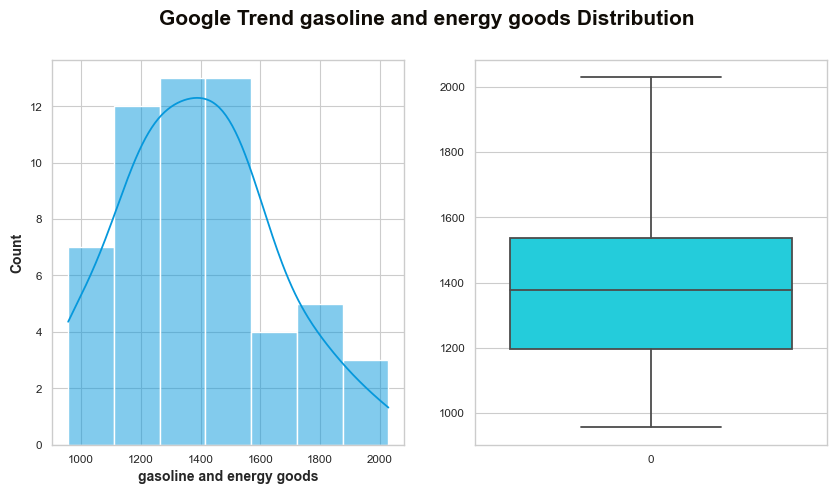

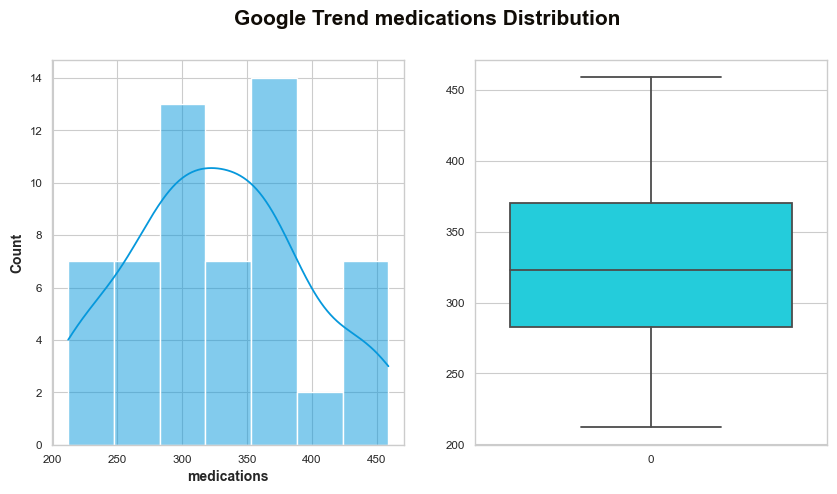

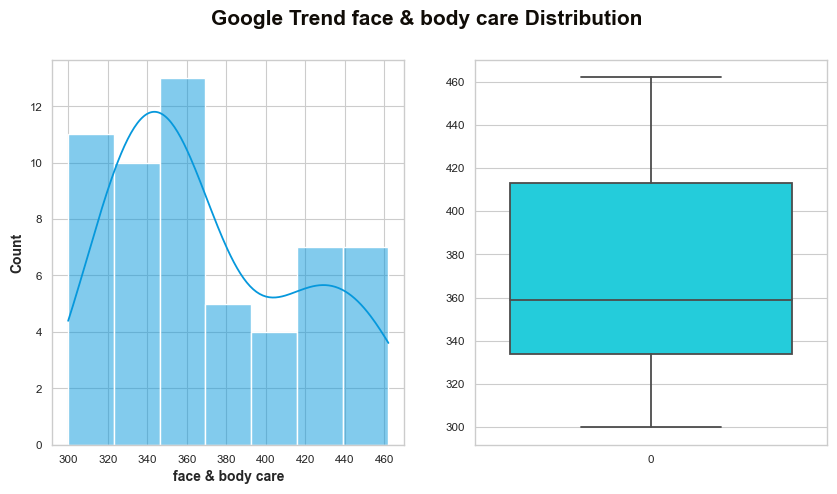

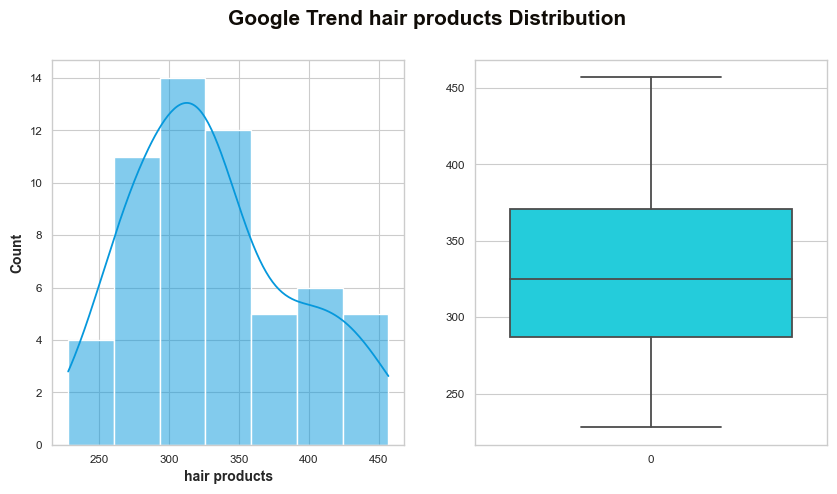

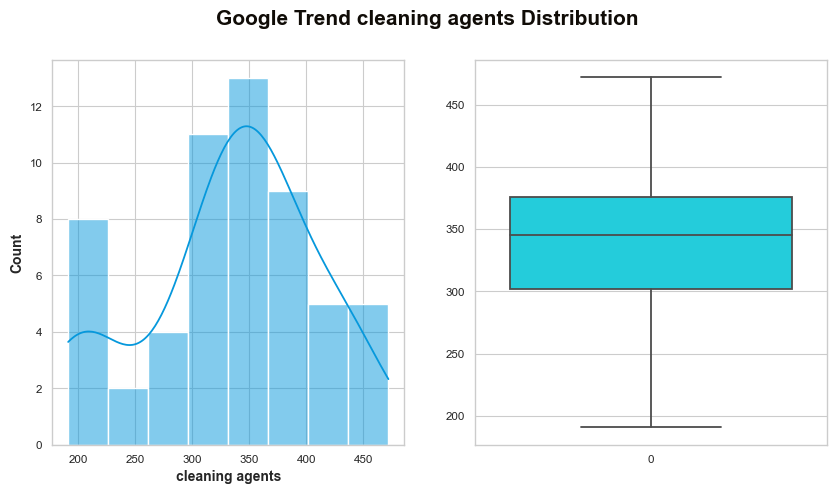

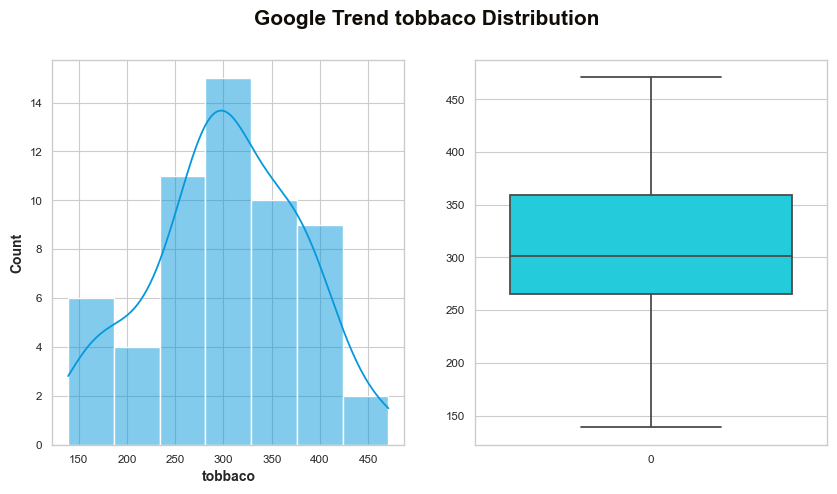

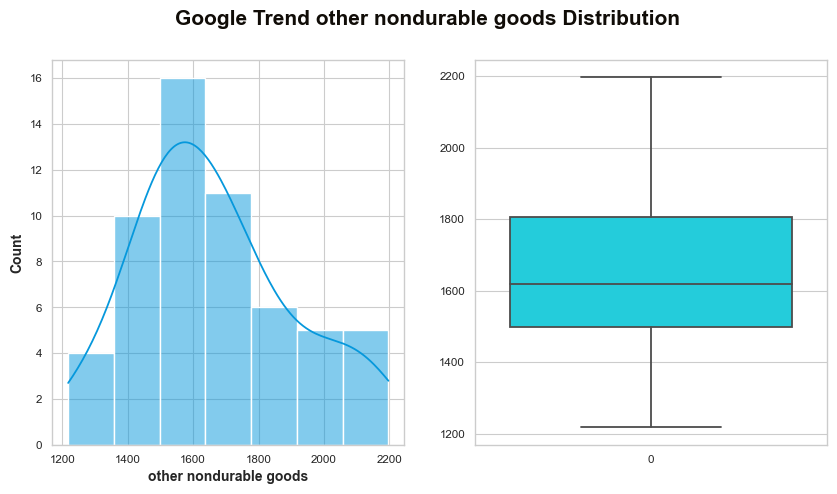

In [56]:
# Outlier handling for google trends dataset columns
outlier_handling(google_trends, google_trends.columns)

# Show current continuous distribution for google trends dataset
plot_distribution(google_trends, 'Google Trend')

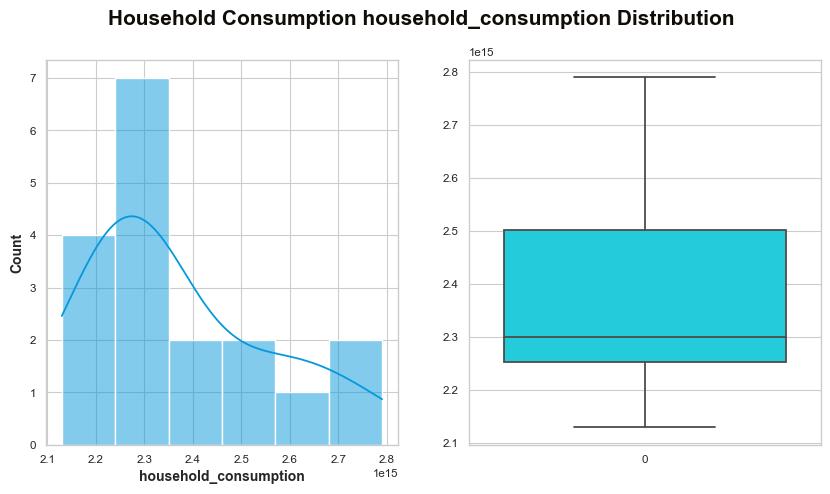

In [57]:
# Outlier handling for household consumption dataset columns
outlier_handling(household_consumption, household_consumption.columns)

# Show current continuous distribution for household consumption dataset
plot_distribution(household_consumption, 'Household Consumption')

### Combine Electronic Transactions Data into One Dataframe

In [58]:
# Create new dataframe electronic_transaction_nom
electronic_transaction_nom = pd.DataFrame()

# Add 'transaction_nominal' column from debit, credit, ue_bank, ue_nonbank, qris, and digital_banking to electronic_transaction_nom
transactionTypes = ['debit', 'credit', 'ue_bank', 'ue_nonbank', 'qris', 'digital_banking']

for transactionType in transactionTypes:
    electronic_transaction_nom[f'{transactionType} nominal'] = eval(transactionType)['transaction_nominal']

# Show electronic_transaction_nom
electronic_transaction_nom


debit nominal  credit nominal  ue_bank nominal  \
date                                                         
2019-01-01   5.480000e+14    2.800000e+13     4.940000e+12   
2019-02-01   5.310000e+14    2.580000e+13     4.960000e+12   
2019-03-01   5.590000e+14    2.810000e+13     5.140000e+12   
2019-04-01   5.420000e+14    2.780000e+13     4.990000e+12   
2019-05-01   6.210000e+14    3.050000e+13     5.110000e+12   
2019-06-01   4.810000e+14    2.590000e+13     5.240000e+12   
2019-07-01   6.120000e+14    2.990000e+13     5.630000e+12   
2019-08-01   5.310000e+14    2.820000e+13     6.360000e+12   
2019-09-01   5.190000e+14    2.770000e+13     5.980000e+12   
2019-10-01   5.390000e+14    2.930000e+13     6.550000e+12   
2019-11-01   5.230000e+14    2.870000e+13     6.560000e+12   
2019-12-01   5.590000e+14    3.280000e+13     7.310000e+12   
2020-01-01   5.190000e+14    2.860000e+13     6.400000e+12   
2020-02-01   5.170000e+14    2.590000e+13     6.460000e+12   
2020-03-01   5.250000e+14    2.420000e+13     6.200000e+12   
2020-04-01   4.790000e+14    1.600000e+13     3.490000e+12   
2020-05-01   5.770000e+14    1.510000e+13     3.120000e+12   
2020-06-01   4.840000e+14    1.710000e+13     4.090000e+12   
2020-07-01   5.700000e+14    1.810000e+13     5.000000e+12   
2020-08-01   5.450000e+14    1.820000e+13     5.150000e+12   
2020-09-01   5.370000e+14    1.750000e+13     4.640000e+12   
2020-10-01   5.680000e+14    1.720000e+13     5.090000e+12   
2020-11-01   5.530000e+14    1.990000e+13     5.330000e+12   
2020-12-01   6.020000e+14    2.120000e+13     5.670000e+12   
2021-01-01   5.350000e+14    1.820000e+13     4.900000e+12   
2021-02-01   4.900000e+14    1.720000e+13     4.590000e+12   
2021-03-01   5.630000e+14    2.140000e+13     5.160000e+12   
2021-04-01   5.650000e+14    2.000000e+13     5.370000e+12   
2021-05-01   5.790000e+14    1.970000e+13     5.040000e+12   
2021-06-01   5.470000e+14    1.980000e+13     5.350000e+12   
2021-07-01   5.310000e+14    1.710000e+13     4.000000e+12   
2021-08-01   5.170000e+14    1.970000e+13     4.000000e+12   
2021-09-01   5.380000e+14    2.050000e+13     5.580000e+12   
2021-10-01   5.390000e+14    2.140000e+13     6.280000e+12   
2021-11-01   5.460000e+14    2.350000e+13     6.130000e+12   
2021-12-01   6.060000e+14    2.590000e+13     6.910000e+12   
2022-01-01   6.290000e+14    2.470000e+13     8.520000e+12   
2022-02-01   5.770000e+14    2.020000e+13     6.970000e+12   
2022-03-01   6.780000e+14    2.630000e+13     7.080000e+12   
2022-04-01   7.390000e+14    2.560000e+13     9.240000e+12   
2022-05-01   6.050000e+14    2.560000e+13     7.810000e+12   
2022-06-01   6.310000e+14    2.660000e+13     7.030000e+12   
2022-07-01   7.130000e+14    2.640000e+13     7.790000e+12   
2022-08-01   6.940000e+14    2.840000e+13     1.186000e+13   
2022-09-01   6.580000e+14    2.780000e+13     9.560000e+12   
2022-10-01   6.610000e+14    2.830000e+13     8.810000e+12   
2022-11-01   6.350000e+14    2.980000e+13     7.810000e+12   
2022-12-01   7.010000e+14    3.370000e+13     8.530000e+12   
2023-01-01   6.430000e+14    3.200000e+13     8.060000e+12   
2023-02-01   5.900000e+14    3.120000e+13     7.270000e+12   
2023-03-01   6.710000e+14    3.440000e+13     8.370000e+12   
2023-04-01   7.080000e+14    3.080000e+13     8.790000e+12   
2023-05-01   6.500000e+14    3.300000e+13     8.540000e+12   
2023-06-01   6.600000e+14    3.370000e+13     8.480000e+12   
2023-07-01   6.720000e+14    3.610000e+13     9.070000e+12   
2023-08-01   6.450000e+14    3.440000e+13     8.640000e+12   
2023-09-01   6.210000e+14    3.340000e+13     8.480000e+12   

            ue_nonbank nominal  qris nominal  digital_banking nominal  
date                                                                   
2019-01-01        4.870000e+13           NaN             2.180000e+15  
2019-02-01        4.650000e+13           NaN             1.920000e+15  
2019-03-01        2.430000e+13           NaN             2.010000

### Interpolate Quarterly Household Consumption Data from Quarterly to Monthly

* Given that the current household consumption data is in quarterly frequence, we need to convert it to monthly frequencey for our analysis.
* 'interpolate_quart_to_mont' function takes a dataframe with a time series column in a quarterly frequency and interpolates it to a monthly frequency using cubic spline interpolation. The function generates a range of monthly dates based on the original data's date range and then applies cubic spline interpolation to estimate the values for these new monthly dates.

In [59]:
# Use interpolate_quart_to_month function to interpolate the quarterly data to monthly data using cubic spline interpolation
household_consumption = interpolate_quart_to_month(df=household_consumption, column='household_consumption')

# Convert monthlyHouseholdConsumption['date'] to datetime format and set it as index
household_consumption['date'] = pd.to_datetime(household_consumption['date'])
household_consumption.set_index('date', inplace=True)

# Show monthlyHouseholdConsumption DataFrame
household_consumption

household_consumption
date                             
2019-01-01           2.150000e+15
2019-02-01           2.155448e+15
2019-03-01           2.176347e+15
2019-04-01           2.210000e+15
2019-05-01           2.245986e+15
2019-06-01           2.279118e+15
2019-07-01           2.300000e+15
2019-08-01           2.305476e+15
2019-09-01           2.302019e+15
2019-10-01           2.300000e+15
2019-11-01           2.304767e+15
2019-12-01           2.303837e+15
2020-01-01           2.280000e+15
2020-02-01           2.224206e+15
2020-03-01           2.165930e+15
2020-04-01           2.130000e+15
2020-05-01           2.143209e+15
2020-06-01           2.187143e+15
2020-07-01           2.230000e+15
2020-08-01           2.251460e+15
2020-09-01           2.254274e+15
2020-10-01           2.250000e+15
2020-11-01           2.247797e+15
2020-12-01           2.250617e+15
2021-01-01           2.260000e+15
2021-02-01           2.275808e+15
2021-03-01           2.290473e+15
2021-04-01           2.300000e+15
2021-05-01           2.298491e+15
2021-06-01           2.294555e+15
2021-07-01           2.300000e+15
2021-08-01           2.322951e+15
2021-09-01           2.354310e+15
2021-10-01           2.380000e+15
2021-11-01           2.393199e+15
2021-12-01           2.401844e+15
2022-01-01           2.420000e+15
2022-02-01           2.456202e+15
2022-03-01           2.495117e+15
2022-04-01           2.530000e+15
2022-05-01           2.545282e+15
2022-06-01           2.550914e+15
2022-07-01           2.560000e+15
2022-08-01           2.583044e+15
2022-09-01           2.613476e+15
2022-10-01           2.640000e+15
2022-11-01           2.657083e+15
2022-12-01           2.667785e+15
2023-01-01           2.680000e+15
2023-02-01           2.700690e+15
2023-03-01           2.732798e+15
2023-04-01           2.790000e+15

### Combine Household Consumption with Google Trends Data

In [60]:
# Create new consumNowcast DataFrame by joining household_consumption and googleTrend data on the index
consumNowcast = household_consumption.join(google_trends)

# Show consumNowcast DataFrame
consumNowcast

household_consumption  motorcycle  auto insurance  \
date                                                            
2019-01-01           2.150000e+15         324           208.0   
2019-02-01           2.155448e+15         329           262.0   
2019-03-01           2.176347e+15         409           362.0   
2019-04-01           2.210000e+15         320           265.0   
2019-05-01           2.245986e+15         345           331.0   
2019-06-01           2.279118e+15         415           363.0   
2019-07-01           2.300000e+15         377           368.0   
2019-08-01           2.305476e+15         351           314.0   
2019-09-01           2.302019e+15         462           405.0   
2019-10-01           2.300000e+15         386           266.0   
2019-11-01           2.304767e+15         381           247.0   
2019-12-01           2.303837e+15         443           337.0   
2020-01-01           2.280000e+15         299           378.0   
2020-02-01           2.224206e+15         291           359.0   
2020-03-01           2.165930e+15         354           408.0   
2020-04-01           2.130000e+15         360           293.0   
2020-05-01           2.143209e+15         368           305.0   
2020-06-01           2.187143e+15         324           334.0   
2020-07-01           2.230000e+15         325           343.0   
2020-08-01           2.251460e+15         406           443.0   
2020-09-01           2.254274e+15         318           348.0   
2020-10-01           2.250000e+15         334           295.0   
2020-11-01           2.247797e+15         391           369.0   
2020-12-01           2.250617e+15         308           243.0   
2021-01-01           2.260000e+15         375           237.0   
2021-02-01           2.275808e+15         326           186.5   
2021-03-01           2.290473e+15         347           203.0   
2021-04-01           2.300000e+15         352           213.0   
2021-05-01           2.298491e+15         392           240.0   
2021-06-01           2.294555e+15         339           238.0   
2021-07-01           2.300000e+15         336           247.0   
2021-08-01           2.322951e+15         407           362.0   
2021-09-01           2.354310e+15         326           321.0   
2021-10-01           2.380000e+15         399           316.0   
2021-11-01           2.393199e+15         313           316.0   
2021-12-01           2.401844e+15         320           220.0   
2022-01-01           2.420000e+15         430           451.0   
2022-02-01           2.456202e+15         329           301.0   
2022-03-01           2.495117e+15         358           332.0   
2022-04-01           2.530000e+15         362           302.0   
2022-05-01           2.545282e+15         441           386.0   
2022-06-01           2.550914e+15         374           362.0   
2022-07-01           2.560000e+15         466           442.0   
2022-08-01           2.583044e+15         376           329.0   
2022-09-01           2.613476e+15         380           329.0   
2022-10-01           2.640000e+15         474           371.0   
2022-11-01           2.657083e+15         360           298.0   
2022-12-01           2.667785e+15         369           354.0   
2023-01-01           2.680000e+15         434           459.0   
2023-02-01           2.700690e+15         338           344.0   
2023-03-01           2.732798e+15         367           339.0   
2023-04-01           2.790000e+15         422           387.0   

            vehicle wheels & tires  vehicle maintanance  \
date                                                      
2019-01-01                     353                  296   
2019-02-01                     353                  286   
2019-03-01                     440                  403   
2019-04-01                     323                  339   
2019-05-01                     374                  354   
2019-06-01                     466                  444   
2019-07-01                   

### Pearson Correlation Test on Google Trends Data

In [61]:
# Show Pearson Correlation Coefficient for consumNowcast DataFrame
pearson_corr_test(consumNowcast, 'household_consumption')

household_consumption
household_consumption                                  1.000000
microcars & city cars                                  0.795239
electricity                                            0.761968
motor vehicle & parts                                  0.553506
food and beverages                                     0.426298
cooking & recipe                                       0.417966
cleaning agents                                        0.373687
motorcycle                                             0.366430
non alcoholic beverages                                0.366430
restaurant                                             0.361307
men's clothing                                         0.357768
auto insurance                                         0.331457
candy & sweets                                         0.321527
footwear                                               0.296322
tobbaco                                                0.288632
home improvement                                       0.244222
grocery & food retailers                               0.238966
homemaking & interior design                           0.216704
other nondurable goods                                 0.188633
casual apparel                                         0.184289
home appliances                                        0.181054
e-books                                                0.174219
comics & animation                                     0.169153
furnishing & durable household equipment               0.160780
vehicle wheels & tires                                 0.156867
bed & bath                                             0.149430
nuclear energy                                         0.141709
athletic apparel                                       0.130672
clothing & footwear                                    0.124084
face & body care                                       0.113575
broadway & musical theater                             0.110735
movies                                                 0.103218
recreational goods                                     0.102317
mobile phones                                          0.076117
audio equipment                                        0.070486
home furnishing                                        0.066161
gasoline and energy goods                              0.066102
computer & video games                                 0.054302
waste management                                      -0.008382
medications                                           -0.013084
vehicle maintanance                                   -0.050517
TV & video                                            -0.050638
home insurance                                        -0.057133
women's clothing                                      -0.099166
other durable goods                                   -0.151530
renewable & alternative energy                        -0.152445
magazines                                             -0.155973
hair products                                         -0.159529
children's clothing                                   -0.236164
oil & gas                                             -0.463136
camera & photo equipment                              -0.475647

In [62]:
# Extract features name that have correlation coefficient value more than our threshold
google_trends_pearsoned = pearson_corr_features_name(df= consumNowcast, target = 'household_consumption', threshold = 0.2)

# Show google_trends_pearsoned list
google_trends_pearsoned

['microcars & city cars',
 'electricity',
 'motor vehicle & parts',
 'food and beverages',
 'cooking & recipe',
 'cleaning agents',
 'motorcycle',
 'non alcoholic beverages',
 'restaurant',
 "men's clothing",
 'auto insurance',
 'candy & sweets',
 'footwear',
 'tobbaco',
 'home improvement',
 'grocery & food retailers',
 'homemaking & interior design']

In [63]:
# Save columns inside google_trends_pearsoned list to google_trends_breakdown DataFrame
google_trends_breakdown = google_trends[google_trends_pearsoned]

# Show google_trends_breakdown DataFrame
google_trends_breakdown

microcars & city cars  electricity  motor vehicle & parts  \
date                                                                    
2019-01-01                  115.0          113                 1296.0   
2019-02-01                  113.0          118                 1343.0   
2019-03-01                  140.0          147                 1754.0   
2019-04-01                  123.0          114                 1370.0   
2019-05-01                  119.0          106                 1523.0   
2019-06-01                  169.0          132                 1857.0   
2019-07-01                  138.0          125                 1580.0   
2019-08-01                  125.0          202                 1433.0   
2019-09-01                  156.0          191                 1818.0   
2019-10-01                  355.0          133                 1620.0   
2019-11-01                  289.0          133                 1587.0   
2019-12-01                  218.0          152                 1890.0   
2020-01-01                   59.0           73                 1418.0   
2020-02-01                   49.0           77                 1366.0   
2020-03-01                   68.0          173                 1653.0   
2020-04-01                   59.0          203                 1358.0   
2020-05-01                   64.0          138                 1558.0   
2020-06-01                  152.0          103                 1495.0   
2020-07-01                   54.0           92                 1433.0   
2020-08-01                   56.0          146                 1763.0   
2020-09-01                   45.0          114                 1380.0   
2020-10-01                   46.0          109                 1346.0   
2020-11-01                   55.0          146                 1631.0   
2020-12-01                   55.0          100                 1303.0   
2021-01-01                  236.0          370                 1769.0   
2021-02-01                  185.0          292                 1442.0   
2021-03-01                  183.0          284                 1466.0   
2021-04-01                  168.0          257                 1453.0   
2021-05-01                  220.0          282                 1773.0   
2021-06-01                  179.0          222                 1498.0   
2021-07-01                  222.0          229                 1531.0   
2021-08-01                  213.0          337                 1925.0   
2021-09-01                  161.0          263                 1525.0   
2021-10-01                  217.0          319                 1795.0   
2021-11-01                  193.0          237                 1503.0   
2021-12-01                  186.0          213                 1439.0   
2022-01-01                  351.0          346                 2055.0   
2022-02-01                  239.0          317                 1537.0   
2022-03-01                  245.0          310                 1610.0   
2022-04-01                  233.0          277                 1588.0   
2022-05-01                  365.0          359                 2039.0   
2022-06-01                  326.0          294                 1785.0   
2022-07-01                  341.0          367                 2108.0   
2022-08-01                  252.0          318                 1585.0   
2022-09-01                  249.0          389                 1595.0   
2022-10-01                  303.0          442                 1969.0   
2022-11-01                  249.0          336                 1577.0   
2022-12-01                  280.0          294                 1722.0   
2023-01-01                  420.0          387                 2224.0   
2023-02-01                  325.0          318                 1689.0   
2023-03-01                  329.0          315                 1719.0   
2023-04-01                  393.0          345                 2097.0   
2023-05-01                  323.0          326                 1722.0 

In [64]:
# Sum columns inside google_trends that have the same name as the columns inside google_trends_pearsoned list and name it 'google_trends'
google_trends['google_trends'] = google_trends[google_trends_pearsoned].sum(axis=1)

# Drop columns inside google_trends other than google_trends['google_trends']
google_trends = google_trends[['google_trends']]

# Show google_trends DataFrame
google_trends

google_trends
date                     
2019-01-01         6521.0
2019-02-01         6937.0
2019-03-01         8687.0
2019-04-01         6617.0
2019-05-01         7584.0
2019-06-01         9021.0
2019-07-01         7852.0
2019-08-01         7371.0
2019-09-01         9113.0
2019-10-01         7655.0
2019-11-01         7491.0
2019-12-01         9268.0
2020-01-01         6619.0
2020-02-01         6516.0
2020-03-01         7881.0
2020-04-01         6893.0
2020-05-01         8032.0
2020-06-01         7007.0
2020-07-01         6854.0
2020-08-01         8706.0
2020-09-01         6834.0
2020-10-01         6965.0
2020-11-01         8377.0
2020-12-01         6830.0
2021-01-01         8994.0
2021-02-01         7503.5
2021-03-01         7489.0
2021-04-01         7621.0
2021-05-01         9153.0
2021-06-01         7599.0
2021-07-01         7668.0
2021-08-01         9646.0
2021-09-01         7759.0
2021-10-01         9386.0
2021-11-01         7658.0
2021-12-01         7476.0
2022-01-01         9797.0
2022-02-01         7551.0
2022-03-01         7742.0
2022-04-01         8037.0
2022-05-01         9876.0
2022-06-01         8600.0
2022-07-01        10541.0
2022-08-01         8126.0
2022-09-01         8131.0
2022-10-01        10121.0
2022-11-01         7936.0
2022-12-01         8435.0
2023-01-01        10787.0
2023-02-01         8497.0
2023-03-01         8430.0
2023-04-01        10177.0
2023-05-01         8322.0
2023-06-01         8531.0
2023-07-01        10375.0
2023-08-01         7902.0
2023-09-01         7898.0

### Combine Household Consumption with Electronic Payment Transaction Data

In [65]:
# Combine household_consumption and electronic_transaction_nom data
consumNowcast_2 = household_consumption.join(electronic_transaction_nom)

# Show consumNowcast DataFrame
consumNowcast_2

household_consumption  debit nominal  credit nominal  \
date                                                               
2019-01-01           2.150000e+15   5.480000e+14    2.800000e+13   
2019-02-01           2.155448e+15   5.310000e+14    2.580000e+13   
2019-03-01           2.176347e+15   5.590000e+14    2.810000e+13   
2019-04-01           2.210000e+15   5.420000e+14    2.780000e+13   
2019-05-01           2.245986e+15   6.210000e+14    3.050000e+13   
2019-06-01           2.279118e+15   4.810000e+14    2.590000e+13   
2019-07-01           2.300000e+15   6.120000e+14    2.990000e+13   
2019-08-01           2.305476e+15   5.310000e+14    2.820000e+13   
2019-09-01           2.302019e+15   5.190000e+14    2.770000e+13   
2019-10-01           2.300000e+15   5.390000e+14    2.930000e+13   
2019-11-01           2.304767e+15   5.230000e+14    2.870000e+13   
2019-12-01           2.303837e+15   5.590000e+14    3.280000e+13   
2020-01-01           2.280000e+15   5.190000e+14    2.860000e+13   
2020-02-01           2.224206e+15   5.170000e+14    2.590000e+13   
2020-03-01           2.165930e+15   5.250000e+14    2.420000e+13   
2020-04-01           2.130000e+15   4.790000e+14    1.600000e+13   
2020-05-01           2.143209e+15   5.770000e+14    1.510000e+13   
2020-06-01           2.187143e+15   4.840000e+14    1.710000e+13   
2020-07-01           2.230000e+15   5.700000e+14    1.810000e+13   
2020-08-01           2.251460e+15   5.450000e+14    1.820000e+13   
2020-09-01           2.254274e+15   5.370000e+14    1.750000e+13   
2020-10-01           2.250000e+15   5.680000e+14    1.720000e+13   
2020-11-01           2.247797e+15   5.530000e+14    1.990000e+13   
2020-12-01           2.250617e+15   6.020000e+14    2.120000e+13   
2021-01-01           2.260000e+15   5.350000e+14    1.820000e+13   
2021-02-01           2.275808e+15   4.900000e+14    1.720000e+13   
2021-03-01           2.290473e+15   5.630000e+14    2.140000e+13   
2021-04-01           2.300000e+15   5.650000e+14    2.000000e+13   
2021-05-01           2.298491e+15   5.790000e+14    1.970000e+13   
2021-06-01           2.294555e+15   5.470000e+14    1.980000e+13   
2021-07-01           2.300000e+15   5.310000e+14    1.710000e+13   
2021-08-01           2.322951e+15   5.170000e+14    1.970000e+13   
2021-09-01           2.354310e+15   5.380000e+14    2.050000e+13   
2021-10-01           2.380000e+15   5.390000e+14    2.140000e+13   
2021-11-01           2.393199e+15   5.460000e+14    2.350000e+13   
2021-12-01           2.401844e+15   6.060000e+14    2.590000e+13   
2022-01-01           2.420000e+15   6.290000e+14    2.470000e+13   
2022-02-01           2.456202e+15   5.770000e+14    2.020000e+13   
2022-03-01           2.495117e+15   6.780000e+14    2.630000e+13   
2022-04-01           2.530000e+15   7.390000e+14    2.560000e+13   
2022-05-01           2.545282e+15   6.050000e+14    2.560000e+13   
2022-06-01           2.550914e+15   6.310000e+14    2.660000e+13   
2022-07-01           2.560000e+15   7.130000e+14    2.640000e+13   
2022-08-01           2.583044e+15   6.940000e+14    2.840000e+13   
2022-09-01           2.613476e+15   6.580000e+14    2.780000e+13   
2022-10-01           2.640000e+15   6.610000e+14    2.830000e+13   
2022-11-01           2.657083e+15   6.350000e+14    2.980000e+13   
2022-12-01           2.667785e+15   7.010000e+14    3.370000e+13   
2023-01-01           2.680000e+15   6.430000e+14    3.200000e+13   
2023-02-01           2.700690e+15   5.900000e+14    3.120000e+13   
2023-03-01           2.732798e+15   6.710000e+14    3.440000e+13   
2023-04-01           2.790000e+15   7.080000e+14    3.080000e+13   

            ue_bank nominal  ue_nonbank nominal  qris nominal  \
date                                                            
2019-01-01     4.940000e+12        4.870000e+13           NaN   
2019-02-01     4.960000e+12        4.650000e+13           NaN   
2019-03-01     5.140000e+12        2.430000e+13           NaN   
2019-04-01    

### Pearson Correlation Test on Electronic Payment Transaction Data

In [66]:
# Conduct Pearson Correlation Test in consumNowcast
pearson_corr_test(consumNowcast_2, 'household_consumption')

household_consumption
household_consumption                 1.000000
qris nominal                          0.968956
ue_nonbank nominal                    0.914249
digital_banking nominal               0.898480
ue_bank nominal                       0.813381
debit nominal                         0.778465
credit nominal                        0.562034

In [67]:
# Extract features name that have correlation coefficient value more than our threshold
electronic_transaction_nom_pearsoned = pearson_corr_features_name(consumNowcast_2, 'household_consumption', 0.2)

# Show electronic_transaction_nom_pearsoned list
electronic_transaction_nom_pearsoned

['qris nominal',
 'ue_nonbank nominal',
 'digital_banking nominal',
 'ue_bank nominal',
 'debit nominal',
 'credit nominal']

In [68]:
# Save columns inside electronic_transaction_nom_pearsoned list to electronic_transaction_nom_breakdown DataFrame
electronic_transaction_nom_breakdown = electronic_transaction_nom[electronic_transaction_nom_pearsoned]

# Show electronic_transaction_nom_breakdown DataFrame
electronic_transaction_nom_breakdown

qris nominal  ue_nonbank nominal  digital_banking nominal  \
date                                                                    
2019-01-01           NaN        4.870000e+13             2.180000e+15   
2019-02-01           NaN        4.650000e+13             1.920000e+15   
2019-03-01           NaN        2.430000e+13             2.010000e+15   
2019-04-01           NaN        2.310000e+13             2.130000e+15   
2019-05-01           NaN        5.970000e+13             2.390000e+15   
2019-06-01           NaN        2.120000e+13             1.750000e+15   
2019-07-01           NaN        2.370000e+13             2.310000e+15   
2019-08-01           NaN        2.530000e+13             2.910000e+15   
2019-09-01           NaN        2.820000e+13             2.110000e+15   
2019-10-01           NaN        3.330000e+13             2.310000e+15   
2019-11-01           NaN        3.240000e+13             2.190000e+15   
2019-12-01           NaN        3.330000e+13             2.440000e+15   
2020-01-01  3.650000e+11        3.070000e+13             2.230000e+15   
2020-02-01  6.040000e+11        2.970000e+13             2.070000e+15   
2020-03-01  5.810000e+11        3.050000e+13             2.390000e+15   
2020-04-01  3.970000e+11        3.320000e+13             2.130000e+15   
2020-05-01  4.340000e+11        3.320000e+13             1.870000e+15   
2020-06-01  4.500000e+11        3.170000e+13             2.140000e+15   
2020-07-01  7.190000e+11        3.460000e+13             2.230000e+15   
2020-08-01  8.090000e+11        3.660000e+13             2.140000e+15   
2020-09-01  8.380000e+11        4.090000e+13             2.340000e+15   
2020-10-01  9.260000e+11        4.460000e+13             2.390000e+15   
2020-11-01  8.840000e+11        4.640000e+13             2.640000e+15   
2020-12-01  1.200000e+12        5.230000e+13             2.770000e+15   
2021-01-01  1.040000e+12        4.960000e+13             2.650000e+15   
2021-02-01  1.110000e+12        4.450000e+13             2.550000e+15   
2021-03-01  1.270000e+12        5.110000e+13             3.030000e+15   
2021-04-01  1.580000e+12        5.610000e+13             3.110000e+15   
2021-05-01  1.870000e+12        6.600000e+13             3.120000e+15   
2021-06-01  2.140000e+12        5.960000e+13             3.450000e+15   
2021-07-01  2.560000e+12        6.370000e+13             3.410000e+15   
2021-08-01  2.130000e+12        6.250000e+13             3.470000e+15   
2021-09-01  2.920000e+12        6.600000e+13             3.900000e+15   
2021-10-01  3.020000e+12        6.100000e+13             3.750000e+15   
2021-11-01  3.360000e+12        6.340000e+13             4.010000e+15   
2021-12-01  4.730000e+12        6.810000e+13             4.380000e+15   
2022-01-01  4.470000e+12        6.380000e+13             3.830000e+15   
2022-02-01  4.520000e+12        6.130000e+13             3.380000e+15   
2022-03-01  5.810000e+12        7.100000e+13             4.500000e+15   
2022-04-01  7.520000e+12        7.930000e+13             4.320000e+15   
2022-05-01  7.170000e+12        7.330000e+13             3.770000e+15   
2022-06-01  9.570000e+12        7.820000e+13             4.300000e+15   
2022-07-01  9.760000e+12        8.900000e+13             4.360000e+15   
2022-08-01  9.670000e+12        8.840000e+13             4.560000e+15   
2022-09-01  1.090000e+13        8.900000e+13             4.510000e+15   
2022-10-01  8.730000e+12        1.220000e+14             4.430000e+15   
2022-11-01  9.670000e+12        1.250000e+14             4.560000e+15   
2022-12-01  1.220000e+13        1.340000e+14             5.020000e+15   
2023-01-01  1.270000e+13        1.270000e+14             4.550000e+15   
2023-02-01  1.230000e+13        1.190000e+14             4.260000e+15   
2023-03-01  1.530000e+13        1.350000e+14             4.840000e+15   
2023-04-01  1.790000e+13        1.440000e+14             4.470000e+15   
2023-05-01  1.510000e+13        1.440000e+14             5.010000e+15 

In [69]:
# Sum columns inside electronic_transaction_nom that have the same name as the columns inside electronic_transaction_nom_pearsoned list and name it 'electronic_transac_nom'
electronic_transaction_nom['electronic_transac_nom'] = electronic_transaction_nom[electronic_transaction_nom_pearsoned].sum(axis=1)

# Drop columns inside electronic_transaction_nom other than electronic_transaction_nom['electronic_transac_nom']
electronic_transaction_nom = electronic_transaction_nom[['electronic_transac_nom']]

# Show electronic_transaction_nom DataFrame
electronic_transaction_nom

electronic_transac_nom
date                              
2019-01-01            2.809640e+15
2019-02-01            2.528260e+15
2019-03-01            2.626540e+15
2019-04-01            2.727890e+15
2019-05-01            3.106310e+15
2019-06-01            2.283340e+15
2019-07-01            2.981230e+15
2019-08-01            3.500860e+15
2019-09-01            2.690880e+15
2019-10-01            2.918150e+15
2019-11-01            2.780660e+15
2019-12-01            3.072410e+15
2020-01-01            2.815065e+15
2020-02-01            2.649664e+15
2020-03-01            2.976481e+15
2020-04-01            2.662087e+15
2020-05-01            2.498854e+15
2020-06-01            2.677340e+15
2020-07-01            2.858419e+15
2020-08-01            2.745759e+15
2020-09-01            2.940878e+15
2020-10-01            3.025816e+15
2020-11-01            3.265514e+15
2020-12-01            3.452370e+15
2021-01-01            3.258740e+15
2021-02-01            3.107400e+15
2021-03-01            3.671930e+15
2021-04-01            3.758050e+15
2021-05-01            3.791610e+15
2021-06-01            4.083890e+15
2021-07-01            4.028360e+15
2021-08-01            4.075330e+15
2021-09-01            4.533000e+15
2021-10-01            4.380700e+15
2021-11-01            4.652390e+15
2021-12-01            5.091640e+15
2022-01-01            4.560490e+15
2022-02-01            4.049990e+15
2022-03-01            5.288190e+15
2022-04-01            5.180660e+15
2022-05-01            4.488880e+15
2022-06-01            5.052400e+15
2022-07-01            5.205950e+15
2022-08-01            5.392330e+15
2022-09-01            5.305260e+15
2022-10-01            5.258840e+15
2022-11-01            5.367280e+15
2022-12-01            5.909430e+15
2023-01-01            5.372760e+15
2023-02-01            5.019770e+15
2023-03-01            5.704070e+15
2023-04-01            5.379490e+15
2023-05-01            5.860640e+15
2023-06-01            5.464180e+15
2023-07-01            5.926170e+15
2023-08-01            5.955640e+15
2023-09-01            5.673180e+15

### Pearson Correlation Test on Overall Features

* We calculate the Pearson correlation coefficients for a target variable with other variables in a DataFrame.

In [70]:
# Combine consumNowcast and consumNowcast_2 to create nowcastData on the index and household_consumption column
nowcastData = pd.merge(consumNowcast, consumNowcast_2, on=['date', 'household_consumption'], how='outer')

# Show Pearson Correlation Coefficient for nowcastData DataFrame
pearson_corr_test(nowcastData, 'household_consumption')

household_consumption
household_consumption                                  1.000000
qris nominal                                           0.968956
ue_nonbank nominal                                     0.914249
digital_banking nominal                                0.898480
ue_bank nominal                                        0.813381
microcars & city cars                                  0.795239
debit nominal                                          0.778465
electricity                                            0.761968
credit nominal                                         0.562034
motor vehicle & parts                                  0.553506
food and beverages                                     0.426298
cooking & recipe                                       0.417966
cleaning agents                                        0.373687
non alcoholic beverages                                0.366430
motorcycle                                             0.366430
restaurant                                             0.361307
men's clothing                                         0.357768
auto insurance                                         0.331457
candy & sweets                                         0.321527
footwear                                               0.296322
tobbaco                                                0.288632
home improvement                                       0.244222
grocery & food retailers                               0.238966
homemaking & interior design                           0.216704
other nondurable goods                                 0.188633
casual apparel                                         0.184289
home appliances                                        0.181054
e-books                                                0.174219
comics & animation                                     0.169153
furnishing & durable household equipment               0.160780
vehicle wheels & tires                                 0.156867
bed & bath                                             0.149430
nuclear energy                                         0.141709
athletic apparel                                       0.130672
clothing & footwear                                    0.124084
face & body care                                       0.113575
broadway & musical theater                             0.110735
movies                                                 0.103218
recreational goods                                     0.102317
mobile phones                                          0.076117
audio equipment                                        0.070486
home furnishing                                        0.066161
gasoline and energy goods                              0.066102
computer & video games                                 0.054302
waste management                                      -0.008382
medications                                           -0.013084
vehicle maintanance                                   -0.050517
TV & video                                            -0.050638
home insurance                                        -0.057133
women's clothing                                      -0.099166
other durable goods                                   -0.151530
renewable & alternative energy                        -0.152445
magazines                                             -0.155973
hair products                                         -0.159529
children's clothing                                   -0.236164
oil & gas                                             -0.463136
camera & photo equipment                              -0.475647

In [71]:
# Combine household_consumption, electronic_transaction_nom and google_trends to create overall pearson test on the index
overallPearsonTestData = pd.merge(household_consumption, electronic_transaction_nom, on=['date'], how='inner')
overallPearsonTestData = pd.merge(overallPearsonTestData, google_trends, on=['date'], how='inner')

# Show Pearson Correlation Coefficient for overallPearsonTestData DataFrame
pearson_corr_test(overallPearsonTestData, 'household_consumption')


household_consumption
household_consumption                1.000000
electronic_transac_nom               0.908667
google_trends                        0.554870

### Create Pearson Test Covariates Breakdown DataFrame

In [72]:
# Merge google_trends_breakdown & electronic_transaction_nom_breakdown into one DataFrame
household_consumption_breakdown = pd.merge(google_trends_breakdown, electronic_transaction_nom_breakdown, on='date', how='outer')

# Show household_consumption_breakdown DataFrame
household_consumption_breakdown

microcars & city cars  electricity  motor vehicle & parts  \
date                                                                    
2019-01-01                  115.0          113                 1296.0   
2019-02-01                  113.0          118                 1343.0   
2019-03-01                  140.0          147                 1754.0   
2019-04-01                  123.0          114                 1370.0   
2019-05-01                  119.0          106                 1523.0   
2019-06-01                  169.0          132                 1857.0   
2019-07-01                  138.0          125                 1580.0   
2019-08-01                  125.0          202                 1433.0   
2019-09-01                  156.0          191                 1818.0   
2019-10-01                  355.0          133                 1620.0   
2019-11-01                  289.0          133                 1587.0   
2019-12-01                  218.0          152                 1890.0   
2020-01-01                   59.0           73                 1418.0   
2020-02-01                   49.0           77                 1366.0   
2020-03-01                   68.0          173                 1653.0   
2020-04-01                   59.0          203                 1358.0   
2020-05-01                   64.0          138                 1558.0   
2020-06-01                  152.0          103                 1495.0   
2020-07-01                   54.0           92                 1433.0   
2020-08-01                   56.0          146                 1763.0   
2020-09-01                   45.0          114                 1380.0   
2020-10-01                   46.0          109                 1346.0   
2020-11-01                   55.0          146                 1631.0   
2020-12-01                   55.0          100                 1303.0   
2021-01-01                  236.0          370                 1769.0   
2021-02-01                  185.0          292                 1442.0   
2021-03-01                  183.0          284                 1466.0   
2021-04-01                  168.0          257                 1453.0   
2021-05-01                  220.0          282                 1773.0   
2021-06-01                  179.0          222                 1498.0   
2021-07-01                  222.0          229                 1531.0   
2021-08-01                  213.0          337                 1925.0   
2021-09-01                  161.0          263                 1525.0   
2021-10-01                  217.0          319                 1795.0   
2021-11-01                  193.0          237                 1503.0   
2021-12-01                  186.0          213                 1439.0   
2022-01-01                  351.0          346                 2055.0   
2022-02-01                  239.0          317                 1537.0   
2022-03-01                  245.0          310                 1610.0   
2022-04-01                  233.0          277                 1588.0   
2022-05-01                  365.0          359                 2039.0   
2022-06-01                  326.0          294                 1785.0   
2022-07-01                  341.0          367                 2108.0   
2022-08-01                  252.0          318                 1585.0   
2022-09-01                  249.0          389                 1595.0   
2022-10-01                  303.0          442                 1969.0   
2022-11-01                  249.0          336                 1577.0   
2022-12-01                  280.0          294                 1722.0   
2023-01-01                  420.0          387                 2224.0   
2023-02-01                  325.0          318                 1689.0   
2023-03-01                  329.0          315                 1719.0   
2023-04-01                  393.0          345                 2097.0   
2023-05-01                  323.0          326                 1722.0 

In [73]:
# Remove rows before 2020-01-01 for electronic_transaction_nom, google_trends, household_consumption, household_consumption_breakdown DataFrame
nowcast_df = [electronic_transaction_nom, google_trends, household_consumption, household_consumption_breakdown]

for df in nowcast_df:
    df.drop(df[df.index < '2020-01-01'].index, inplace=True)

## Save the pre-processed DataFrame

Save the dataframe using %store magic function so that it can be used in another notebook

In [74]:
# Store DataFrame columns to be used in another notebook
%store debit
%store credit
%store ue_bank
%store ue_nonbank
%store qris
%store digital_banking

%store google_trends
%store household_consumption
%store electronic_transaction_nom

%store debit_breakdown
%store credit_breakdown
%store ue_bank_breakdown
%store ue_nonbank_breakdown
%store digital_banking_breakdown
%store household_consumption_breakdown

Stored 'debit' (DataFrame)
Stored 'credit' (DataFrame)
Stored 'ue_bank' (DataFrame)
Stored 'ue_nonbank' (DataFrame)
Stored 'qris' (DataFrame)
Stored 'digital_banking' (DataFrame)
Stored 'google_trends' (DataFrame)
Stored 'household_consumption' (DataFrame)
Stored 'electronic_transaction_nom' (DataFrame)
Stored 'debit_breakdown' (DataFrame)
Stored 'credit_breakdown' (DataFrame)
Stored 'ue_bank_breakdown' (DataFrame)
Stored 'ue_nonbank_breakdown' (DataFrame)
Stored 'digital_banking_breakdown' (DataFrame)
Stored 'household_consumption_breakdown' (DataFrame)
